In [1]:
import numpy as np
import pandas as pd

from scipy.spatial import Voronoi, voronoi_plot_2d
from scipy.spatial.distance import euclidean

from sympy.geometry import Line, Segment, Point, Polygon, convex_hull
from sympy.plotting import plot

from math import ceil, fabs, sqrt

import matplotlib.pyplot as plt
import matplotlib
import matplotlib.pyplot as pp

from pprint import pprint


#############
def show(items):
    display(pd.DataFrame(items).head())


Polygon(Point2D(0, 5/2), Point2D(5, 0), Point2D(10, 5/2), Point2D(10, 15/2), Point2D(5, 10), Point2D(0, 15/2))


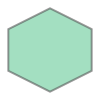

In [2]:
### construct map boundary

### parameters

x_size   = 10
y_size   = 10

num_pts  = 300

####################################
def square_boundary(x_size, y_size):
    ### corners
    top_left      = Point(      0,      0 )
    top_right     = Point( x_size,      0 )
    bottom_left   = Point(      0, y_size )
    bottom_right  = Point( x_size, y_size )

    corners       = [top_left, top_right, bottom_left, bottom_right]
    
    ### polygon
    map_boundary  = convex_hull(corners)
    
    return map_boundary, corners

####################################
def hex_boundary(x, y, h = 4):
    ### corners
    T  = Point( x/2, y )
    B  = Point( x/2, 0 ) 
    
    LB = Point(   0, (1/h)*y )
    LT = Point(   0, ((h-1)/h)*y )
    
    RB = Point(   x, (1/h)*y )
    RT = Point(   x, ((h-1)/h)*y )
    
    corners = [T, B, LT, RT, LB, RB]

    ### polygon
    map_boundary  = convex_hull(*corners)
    
    return map_boundary, corners

####################################


# map_boundary, corners = square_boundary(x_size, y_size)
map_boundary, corners = hex_boundary(x_size, y_size, 4)

print(map_boundary)
display(map_boundary)

#plot(map_boundary)

In [3]:
### generate sites -- 9square
points = pd.DataFrame([
    [0.1, 0.5], 
    [0.5, 1.5], 
    [0.5, 2.5], 
    
    [1.5, 0.5], 
    [1.5, 1.5], 
    [1.5, 2.5], 
    
    [2.5, 0.5], 
    [2.5, 1.5], 
    [2.5, 2.5]]
)

display(points)

,0,1
0,0.1,0.5
1,0.5,1.5
2,0.5,2.5
3,1.5,0.5
4,1.5,1.5
5,1.5,2.5
6,2.5,0.5
7,2.5,1.5
8,2.5,2.5


In [4]:
### generate sites -- random points
tile_area  = 1
total_area = x_size * y_size
num_tiles  = total_area / tile_area

coords = np.random.random( (total_area, 2) )
points = pd.DataFrame(np.array([(x * x_size, y * y_size) for (x,y) in coords]))

#display(points) 
display(points.head())

,0,1
0,1.207373,8.817615
1,9.583990,7.085809
2,9.374863,2.125933
3,4.913045,4.731055
4,8.802865,4.088287


In [5]:
### generate sites -- sunflower spirals

indices  = np.arange(0, num_pts, dtype=float) + 0.5
print('indices')
show(indices)

r        = np.sqrt(indices/num_pts)
theta    = np.pi * (1 + 5**0.5) * indices

### raw 2d data
raw      = pd.DataFrame(
    [(r[i]*np.cos(theta[i]), r[i]*np.sin(theta[i]) ) 
        for i in range(num_pts)], 
    columns = ['x','y']
)

print('\nraw')
display(raw.head())

### calculate scale and offset
x_radius = ceil(abs(min(raw.x)))
y_radius = ceil(abs(min(raw.y)))

x_scale  =  x_size/(2*x_radius)
y_scale  =  y_size/(2*y_radius)

################
print('\nxs')
print(raw.x.head())
print(min(raw.x), max(raw.x))
print('x_radius:', x_radius)
print('x_scale: ', x_scale)

print('\nys')
print(raw.y.head())
print(min(raw.y), max(raw.y))
print('y_radius:', y_radius)
print('y_scale: ', y_scale)

### rescale and offset
coords = (raw + (x_radius, y_radius)) * (x_scale, y_scale)

print('\ncoords')
print(min(coords.x), max(coords.x))
print(min(coords.y), max(coords.y))
display(coords)


indices


,0
0,0.5
1,1.5
2,2.5
3,3.5
4,4.5



raw


,x,y
0,0.014794,-0.038050
1,-0.063412,0.031287
2,0.087649,0.025515
3,-0.056078,-0.092314
4,-0.023820,0.120136



xs
0    0.014794
1   -0.063412
2    0.087649
3   -0.056078
4   -0.023820
Name: x, dtype: float64
-0.9884212563962875 0.9919088232517964
x_radius: 1
x_scale:  5.0

ys
0   -0.038050
1    0.031287
2    0.025515
3   -0.092314
4    0.120136
Name: y, dtype: float64
-0.9939819699956602 0.9753206014613974
y_radius: 1
y_scale:  5.0

coords
0.05789371801856236 9.959544116258982
0.03009015002169879 9.876603007306988


,x,y
0,5.073969,4.809750
1,4.682939,5.156437
2,5.438244,5.127575
3,4.719611,4.538428
4,4.880898,5.600679
5,5.545667,4.599275
6,4.268324,4.920521
7,5.521862,5.593851
8,5.017391,4.158554
9,4.385550,5.643520


In [6]:
### filter out-of-bounds sites

# points = coords

### filter inside map boundary
%timeit 
points   = pd.DataFrame(
    [(coord.x, coord.y) for coord in coords.itertuples() 
         if map_boundary.encloses_point(Point(coord.x, coord.y))],
    columns = ('x', 'y')
)

print('\npoints')
display(points.head())
print('len points:', len(points))


points


,x,y
0,5.073969,4.809750
1,4.682939,5.156437
2,5.438244,5.127575
3,4.719611,4.538428
4,4.880898,5.600679


len points: 275


In [7]:

map_mid = Point(x_size/2, y_size/2)
vor_mid = Point(
    x_size * x_clipscale/2, 
    y_size * y_clipscale/2
)

################
def vortform(q):
    ''' transform voronoi coords to map boundary coords
    '''
    
    x = q.x - (vor_mid.x - map_mid.x)
    y = q.y - (vor_mid.y - map_mid.y)
    
    return Point(x,y)

print('vortform')
q = Point( 
    x_size * x_clipscale/2, 
    y_size * y_clipscale/2
)
print(map_mid)
print(vor_mid)
print(q)
print(vortform(q))
print(vortform(Point(15,25)))

NameError: name 'x_clipscale' is not defined

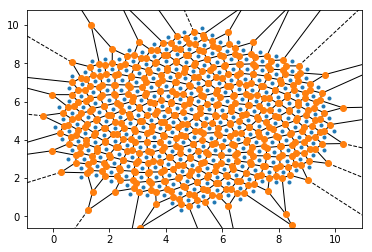

points


,0,1
0,5.073969,4.809750
1,4.682939,5.156437
2,5.438244,5.127575
3,4.719611,4.538428
4,4.880898,5.600679


vertices


,0,1
0,-23.113124,66.613806
1,0.658526,8.060816
2,3.406667,2.313677
3,10.286585,3.802410
4,5.369628,4.838551




regions


,0,1,2,3,4,5,6
0,28.0,25.0,-1.0,3.0,27.0,NaN,NaN
1,48.0,46.0,43.0,44.0,45.0,47.0,NaN
2,46.0,6.0,34.0,35.0,43.0,NaN,NaN
3,48.0,32.0,5.0,-1.0,6.0,46.0,NaN
4,50.0,44.0,43.0,35.0,33.0,49.0,NaN




point_region


,0
0,84
1,125
2,124
3,195
4,122




ridge_dict


0                        1         2         3   ...   270     271          \
   1    2    3    5    8    3    9    1    5    11  ...   250 263 251 264 267   
0  214    4  214    4  281  214  345  216    4  338 ...     1  -1  32   5  -1   
1  216  216  281  282  282  215  349  347  147  445 ...   173   1  48  32   6   

       272  273       274  
  273  254  243  257  236  
0  -1   53  375    3   -1  
1   5  290  376  376  369  

[2 rows x 804 columns]



ridge_points


,0,1
0,268,257
1,268,273
2,268,261
3,268,248
4,268,230




ridge_vertices


,0,1
0,3,27
1,-1,3
2,-1,25
3,25,28
4,27,28


In [8]:
### construct Voronoi object

vor = Voronoi(points)

voronoi_plot_2d( vor )
matplotlib.pyplot.show()

#############
print('points')
show(vor.points)

print('vertices')
show(vor.vertices)

print('\n')
print('regions')
show(vor.regions)

print('\n')
print('point_region')
show(vor.point_region)

print('\n')
print('ridge_dict')
show(vor.ridge_dict)

print('\n')
print('ridge_points')
show(vor.ridge_points)

print('\n')
print('ridge_vertices')
show(vor.ridge_vertices)



In [9]:
### calculate missing ridge vertices and out-of-bounds cutoff vertices

sites            = list()
site_vertices    = dict()
site_adjs        = dict()

adj_ridges       = dict()

##################
m0 = 20; m1 = 50; m2 = 50; m3 = 10

print(f'{f"points : vertices  ":>{m0}} |'
      f'{f"  adjacency line":<{m1}} |'
      f'{f"  ridge line":<{m2}} |'
      f'{f"  missing":<{m3}} |'
     )

######################################################
def find_vertex(i, i0, vor, adj_line, map_boundary) -> (Point, None):
    ''' Deference a Voronoi ridge vertex ID into a vertex point,
            and clip it inside the map boundary.
    '''
    v = Point( *vor.vertices[i], evaluate=False)
    if v.x < 0 or v.y < 0:
        return None
    
    ### cut off infinite vertices
    if i < 0:
        v0 =Point(*vor.vertices[i0], evaluate=False)
        
        ### don't materialize an infinite vertex if the other vertex is out of bounds
        if not map_boundary.encloses_point(v0):
            v = None
        
        else:
            ridge_line = adj_line.perpendicular_line(v0)       
            v          = min( ridge_line.intersection(map_boundary), 
                                key = lambda p: v0.distance(p)
                            )
            
    ### finite vertex
    else:
        v = Point(*vor.vertices[i], evaluate=False)
        
        ### cut off out-of-bounds vertices
        if not map_boundary.encloses_point(v):
            v0         = Point(*vor.vertices[i0])
            ridge_line = Line(v, v0)
            points     = ridge_line.intersection(map_boundary)
            if len(points) > 0:
                v      = min( points, key = lambda p: v.distance(p))
            else:
                v      = None
    ###
    return v

######################################################
for (pi1, pi2), (vi1, vi2)  in vor.ridge_dict.items():
        
    ### dereference points
    p1         = Point( *vor.points[pi1], evaluate=False )
    p2         = Point( *vor.points[pi2], evaluate=False )
    adj_line   = Line(p1, p2)   

    if -1 in (vi1, vi2):
        continue

    v1 = find_vertex(vi1, vi2, vor, adj_line, map_boundary)
    if v1 is None:
        continue
    
    v2 = find_vertex(vi2, vi1, vor, adj_line, map_boundary) 
    if v2 is None:
        continue

    missing = True if any([vi1 < 0, vi2 < 0]) else False
    ps      = (p1, p2)
    vs      = (v1, v2)
       
    # initialize new sites
    if p1 not in sites:
        sites.append(p1)
        site_vertices[p1] = set()
    if p2 not in sites:
        sites.append(p2)
        site_vertices[p2] = set()
        
    site_vertices[p1].update(vs)
    site_vertices[p2].update(vs)    
    
    print(f'{f"  [{pi1} {pi2}] : [{vi1} {vi2}]":<{m0}} |'
          f'{f"  {ps}":<{m1}} |'
          f'{f"  {vs}":<{m2}} |'
          f'{f"  {missing}":<{m3}} |'
         )

print(len(sites))


 points : vertices   |  adjacency line                                   |  ridge line                                       |  missing  |
  [268 248] : [25 28] |  (Point2D(9.62651049747543, 3.45498631610711), Point2D(9.20774292489016, 3.19632796457611)) |  (Point2D(9.76456456107813, 2.76315566237374), Point2D(9.30387991221845, 3.50900357715545)) |  False    |
  [268 230] : [27 28] |  (Point2D(9.62651049747543, 3.45498631610711), Point2D(9.22252252949949, 3.82584633833448)) |  (Point2D(9.55827683060483, 3.78612509999041), Point2D(9.30387991221845, 3.50900357715545)) |  False    |
  [235 260] : [43 46] |  (Point2D(9.23820994126606, 6.28940935848687), Point2D(9.40447590699241, 6.74897836409052)) |  (Point2D(9.12165049212357, 6.59143993239188), Point2D(9.54320699843728, 6.43892638431566)) |  False    |
  [235 214] : [43 44] |  (Point2D(9.23820994126606, 6.28940935848687), Point2D(8.84461702817556, 6.75895420823355)) |  (Point2D(9.12165049212357, 6.59143993239188), Point2D(8.94978793958849

In [10]:
### add map boundary vertices to corner tiles

### corner_distances[corner][distance] = site
corner_distances = dict()

for corner in corners:
    corner_distances[corner] = dict()

### distances from each site to each corner
for site in sites:
    for corner, distances in corner_distances.items():
        d = site.distance(corner).evalf()
        distances[d] = site
        print('D', site, corner, d)

### insert each corner into the site with minimum distance
def add_corner(site, corner):
    print(corner, site)
    site_vertices[site].add(corner)

for corner, distances in corner_distances.items():
    add_corner(distances[min(distances.keys())], corner)
    


D Point2D(9.62651049747543, 3.45498631610711) Point2D(5, 10) 8.01509847135988
D Point2D(9.62651049747543, 3.45498631610711) Point2D(5, 0) 5.77421248550291
D Point2D(9.62651049747543, 3.45498631610711) Point2D(0, 15/2) 10.4418312599316
D Point2D(9.62651049747543, 3.45498631610711) Point2D(10, 15/2) 4.06221985020220
D Point2D(9.62651049747543, 3.45498631610711) Point2D(0, 5/2) 9.67376365340587
D Point2D(9.62651049747543, 3.45498631610711) Point2D(10, 5/2) 1.02542346006315
D Point2D(9.20774292489016, 3.19632796457611) Point2D(5, 10) 7.99969084949989
D Point2D(9.20774292489016, 3.19632796457611) Point2D(5, 0) 5.28409055364255
D Point2D(9.20774292489016, 3.19632796457611) Point2D(0, 15/2) 10.1638635744167
D Point2D(9.20774292489016, 3.19632796457611) Point2D(10, 15/2) 4.37598723279116
D Point2D(9.20774292489016, 3.19632796457611) Point2D(0, 5/2) 9.23403500129361
D Point2D(9.20774292489016, 3.19632796457611) Point2D(10, 5/2) 1.05477196934328
D Point2D(9.22252252949949, 3.82584633833448) Poin

In [11]:
### all tile vertices have now been computed

print("sites")
display(sites)

print('\n\nsite_vertices')
pprint(site_vertices)

sites


[Point2D(9.62651049747543, 3.45498631610711),
 Point2D(9.20774292489016, 3.19632796457611),
 Point2D(9.22252252949949, 3.82584633833448),
 Point2D(9.23820994126606, 6.28940935848687),
 Point2D(9.40447590699241, 6.74897836409052),
 Point2D(8.84461702817556, 6.75895420823355),
 Point2D(8.64795775297628, 6.31684125815032),
 Point2D(9.00543765037035, 5.86494849306898),
 Point2D(9.77415894653968, 6.18984859814536),
 Point2D(9.56308009176612, 5.74384143211286),
 Point2D(9.01978517218830, 7.71716650872223),
 Point2D(8.96767191487676, 7.22843283704749),
 Point2D(8.39618772229393, 7.14264064997842),
 Point2D(8.23349897334687, 6.68408760343144),
 Point2D(8.37320273394541, 5.91095370301488),
 Point2D(7.98177835208180, 6.25193098547392),
 Point2D(0.209018105769337, 5.71051095873836),
 Point2D(0.675526826261592, 5.41705127936126),
 Point2D(0.578001783054506, 6.03485833297649),
 Point2D(1.05864792369317, 5.71232750702085),
 Point2D(1.22340454429116, 5.17027457410314),
 Point2D(0.864689004398722, 4.8



site_vertices
{Point2D(7.29456066668857, 7.12759441942123): {Point2D(7.61213781442755, 7.25843565955756),
                                               Point2D(7.02330674694674, 6.94849969756102),
                                               Point2D(7.08072001424244, 7.41357762508729),
                                               Point2D(7.57801848606664, 7.32708980072148),
                                               Point2D(7.09867163060970, 7.42636494374012),
                                               Point2D(7.45971962685374, 6.82721701938831),
                                               Point2D(7.37595950159276, 6.79415414529816)},
 Point2D(6.13522897081555, 4.49708663719509): {Point2D(6.27308796518171, 4.21168219470224),
                                               Point2D(6.44714659937083, 4.37178376287489),
                                               Point2D(5.89515068592832, 4.25848847905448),
                                               Point2D(5.855558

{Point2D(9.30387991221845, 3.50900357715545), Point2D(9.76456456107813, 2.76315566237374), Point2D(9.55827683060483, 3.78612509999041)}
------------
Point2D(9.62651049747543, 3.45498631610711)
3 {Point2D(9.30387991221845, 3.50900357715545), Point2D(9.76456456107813, 2.76315566237374), Point2D(9.55827683060483, 3.78612509999041)}
Triangle(Point2D(9.30387991221845, 3.50900357715545), Point2D(9.76456456107813, 2.76315566237374), Point2D(9.55827683060483, 3.78612509999041))


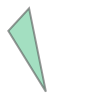

[Segment2D(Point2D(9.30387991221845, 3.50900357715545), Point2D(9.76456456107813, 2.76315566237374)), Segment2D(Point2D(9.55827683060483, 3.78612509999041), Point2D(9.76456456107813, 2.76315566237374)), Segment2D(Point2D(9.30387991221845, 3.50900357715545), Point2D(9.55827683060483, 3.78612509999041))] 

{Point2D(9.30387991221845, 3.50900357715545), Point2D(8.90170038741016, 3.29429342780907), Point2D(9.76456456107813, 2.76315566237374), Point2D(9.11524917590935, 3.51343218133292), Point2D(9.07488539562968, 2.88937080906263)}
------------
Point2D(9.20774292489016, 3.19632796457611)
5 {Point2D(9.30387991221845, 3.50900357715545), Point2D(8.90170038741016, 3.29429342780907), Point2D(9.76456456107813, 2.76315566237374), Point2D(9.11524917590935, 3.51343218133292), Point2D(9.07488539562968, 2.88937080906263)}
Polygon(Point2D(8.90170038741016, 3.29429342780907), Point2D(9.07488539562968, 2.88937080906263), Point2D(9.76456456107813, 2.76315566237374), Point2D(9.30387991221845, 3.509003577155

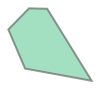

[Segment2D(Point2D(8.90170038741016, 3.29429342780907), Point2D(9.07488539562968, 2.88937080906263)), Segment2D(Point2D(9.07488539562968, 2.88937080906263), Point2D(9.76456456107813, 2.76315566237374)), Segment2D(Point2D(9.30387991221845, 3.50900357715545), Point2D(9.76456456107813, 2.76315566237374)), Segment2D(Point2D(9.11524917590935, 3.51343218133292), Point2D(9.30387991221845, 3.50900357715545)), Segment2D(Point2D(8.90170038741016, 3.29429342780907), Point2D(9.11524917590935, 3.51343218133292))] 

{Point2D(9.55827683060483, 3.78612509999041), Point2D(9.30387991221845, 3.50900357715545), Point2D(9.28946293538318, 4.14174427230958), Point2D(8.90974999157240, 3.89774550720891), Point2D(9.05598191465998, 4.10928703668194), Point2D(9.11524917590935, 3.51343218133292)}
------------
Point2D(9.22252252949949, 3.82584633833448)
6 {Point2D(9.55827683060483, 3.78612509999041), Point2D(9.30387991221845, 3.50900357715545), Point2D(9.28946293538318, 4.14174427230958), Point2D(8.90974999157240, 

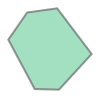

[Segment2D(Point2D(8.90974999157240, 3.89774550720891), Point2D(9.11524917590935, 3.51343218133292)), Segment2D(Point2D(9.11524917590935, 3.51343218133292), Point2D(9.30387991221845, 3.50900357715545)), Segment2D(Point2D(9.30387991221845, 3.50900357715545), Point2D(9.55827683060483, 3.78612509999041)), Segment2D(Point2D(9.28946293538318, 4.14174427230958), Point2D(9.55827683060483, 3.78612509999041)), Segment2D(Point2D(9.05598191465998, 4.10928703668194), Point2D(9.28946293538318, 4.14174427230958)), Segment2D(Point2D(8.90974999157240, 3.89774550720891), Point2D(9.05598191465998, 4.10928703668194))] 

{Point2D(8.93728625069215, 6.17837842527236), Point2D(9.47273224643454, 6.05955128610211), Point2D(9.12165049212357, 6.59143993239188), Point2D(8.94978793958849, 6.44737726672757), Point2D(9.31990948679618, 5.96854968845776), Point2D(9.54320699843728, 6.43892638431566)}
------------
Point2D(9.23820994126606, 6.28940935848687)
6 {Point2D(8.93728625069215, 6.17837842527236), Point2D(9.47273

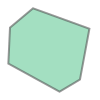

[Segment2D(Point2D(8.93728625069215, 6.17837842527236), Point2D(9.31990948679618, 5.96854968845776)), Segment2D(Point2D(9.31990948679618, 5.96854968845776), Point2D(9.47273224643454, 6.05955128610211)), Segment2D(Point2D(9.47273224643454, 6.05955128610211), Point2D(9.54320699843728, 6.43892638431566)), Segment2D(Point2D(9.12165049212357, 6.59143993239188), Point2D(9.54320699843728, 6.43892638431566)), Segment2D(Point2D(8.94978793958849, 6.44737726672757), Point2D(9.12165049212357, 6.59143993239188)), Segment2D(Point2D(8.93728625069215, 6.17837842527236), Point2D(8.94978793958849, 6.44737726672757))] 

{Point2D(10, 15/2), Point2D(9.64160776269167, 7.40371686068749), Point2D(9.12778290654095, 6.93559994641474), Point2D(9.12165049212357, 6.59143993239188), Point2D(0, 3.57281147779447), Point2D(9.54320699843728, 6.43892638431566)}
------------
Point2D(9.40447590699241, 6.74897836409052)
6 {Point2D(10, 15/2), Point2D(9.64160776269167, 7.40371686068749), Point2D(9.12778290654095, 6.935599946

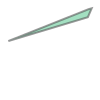

[Segment2D(Point2D(0, 3.57281147779447), Point2D(9.54320699843728, 6.43892638431566)), Segment2D(Point2D(9.54320699843728, 6.43892638431566), Point2D(10, 15/2)), Segment2D(Point2D(9.64160776269167, 7.40371686068749), Point2D(10, 15/2)), Segment2D(Point2D(0, 3.57281147779447), Point2D(9.64160776269167, 7.40371686068749))] 

{Point2D(9.12778290654095, 6.93559994641474), Point2D(9.12165049212357, 6.59143993239188), Point2D(8.94978793958849, 6.44737726672757), Point2D(8.52467593900986, 6.83891821034695), Point2D(8.70272544846209, 7.04701161488096), Point2D(8.55090624378854, 6.62480655300275)}
------------
Point2D(8.84461702817556, 6.75895420823355)
6 {Point2D(9.12778290654095, 6.93559994641474), Point2D(9.12165049212357, 6.59143993239188), Point2D(8.94978793958849, 6.44737726672757), Point2D(8.52467593900986, 6.83891821034695), Point2D(8.70272544846209, 7.04701161488096), Point2D(8.55090624378854, 6.62480655300275)}
Polygon(Point2D(8.52467593900986, 6.83891821034695), Point2D(8.55090624378

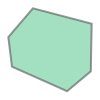

[Segment2D(Point2D(8.52467593900986, 6.83891821034695), Point2D(8.55090624378854, 6.62480655300275)), Segment2D(Point2D(8.55090624378854, 6.62480655300275), Point2D(8.94978793958849, 6.44737726672757)), Segment2D(Point2D(8.94978793958849, 6.44737726672757), Point2D(9.12165049212357, 6.59143993239188)), Segment2D(Point2D(9.12165049212357, 6.59143993239188), Point2D(9.12778290654095, 6.93559994641474)), Segment2D(Point2D(8.70272544846209, 7.04701161488096), Point2D(9.12778290654095, 6.93559994641474)), Segment2D(Point2D(8.52467593900986, 6.83891821034695), Point2D(8.70272544846209, 7.04701161488096))] 

{Point2D(8.93728625069215, 6.17837842527236), Point2D(8.69659868741688, 5.98797713524909), Point2D(8.30836875468951, 6.35108894345263), Point2D(8.94978793958849, 6.44737726672757), Point2D(8.55090624378854, 6.62480655300275), Point2D(8.31883276593181, 6.24369594612075)}
------------
Point2D(8.64795775297628, 6.31684125815032)
6 {Point2D(8.93728625069215, 6.17837842527236), Point2D(8.69659

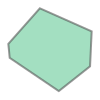

[Segment2D(Point2D(8.30836875468951, 6.35108894345263), Point2D(8.31883276593181, 6.24369594612075)), Segment2D(Point2D(8.31883276593181, 6.24369594612075), Point2D(8.69659868741688, 5.98797713524909)), Segment2D(Point2D(8.69659868741688, 5.98797713524909), Point2D(8.93728625069215, 6.17837842527236)), Segment2D(Point2D(8.93728625069215, 6.17837842527236), Point2D(8.94978793958849, 6.44737726672757)), Segment2D(Point2D(8.55090624378854, 6.62480655300275), Point2D(8.94978793958849, 6.44737726672757)), Segment2D(Point2D(8.30836875468951, 6.35108894345263), Point2D(8.55090624378854, 6.62480655300275))] 

{Point2D(9.25265689354389, 5.65888235778919), Point2D(8.93728625069215, 6.17837842527236), Point2D(8.68365806772316, 5.81013832916239), Point2D(9.02933404176359, 5.53682869816001), Point2D(8.69659868741688, 5.98797713524909), Point2D(9.31990948679618, 5.96854968845776)}
------------
Point2D(9.00543765037035, 5.86494849306898)
6 {Point2D(9.25265689354389, 5.65888235778919), Point2D(8.93728

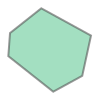

[Segment2D(Point2D(8.68365806772316, 5.81013832916239), Point2D(9.02933404176359, 5.53682869816001)), Segment2D(Point2D(9.02933404176359, 5.53682869816001), Point2D(9.25265689354389, 5.65888235778919)), Segment2D(Point2D(9.25265689354389, 5.65888235778919), Point2D(9.31990948679618, 5.96854968845776)), Segment2D(Point2D(8.93728625069215, 6.17837842527236), Point2D(9.31990948679618, 5.96854968845776)), Segment2D(Point2D(8.69659868741688, 5.98797713524909), Point2D(8.93728625069215, 6.17837842527236)), Segment2D(Point2D(8.68365806772316, 5.81013832916239), Point2D(8.69659868741688, 5.98797713524909))] 

{Point2D(9.47273224643454, 6.05955128610211), Point2D(9.54320699843728, 6.43892638431566)}
{Point2D(9.25265689354389, 5.65888235778919), Point2D(9.47273224643454, 6.05955128610211), Point2D(9.62025048502702, 5.41296253968986), Point2D(9.31990948679618, 5.96854968845776)}
------------
Point2D(9.56308009176612, 5.74384143211286)
4 {Point2D(9.25265689354389, 5.65888235778919), Point2D(9.4727

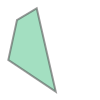

[Segment2D(Point2D(9.25265689354389, 5.65888235778919), Point2D(9.62025048502702, 5.41296253968986)), Segment2D(Point2D(9.47273224643454, 6.05955128610211), Point2D(9.62025048502702, 5.41296253968986)), Segment2D(Point2D(9.31990948679618, 5.96854968845776), Point2D(9.47273224643454, 6.05955128610211)), Segment2D(Point2D(9.25265689354389, 5.65888235778919), Point2D(9.31990948679618, 5.96854968845776))] 

{Point2D(8.78011692530016, 7.49557689874600), Point2D(9.64160776269167, 7.40371686068749), Point2D(0, 3.57281147779447), Point2D(8.71433261771528, 7.85999622781573)}
------------
Point2D(9.0197851721883, 7.71716650872223)
4 {Point2D(8.78011692530016, 7.49557689874600), Point2D(9.64160776269167, 7.40371686068749), Point2D(0, 3.57281147779447), Point2D(8.71433261771528, 7.85999622781573)}
Triangle(Point2D(0, 3.57281147779447), Point2D(9.64160776269167, 7.40371686068749), Point2D(8.71433261771528, 7.85999622781573))


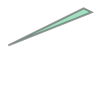

[Segment2D(Point2D(0, 3.57281147779447), Point2D(9.64160776269167, 7.40371686068749)), Segment2D(Point2D(8.71433261771528, 7.85999622781573), Point2D(9.64160776269167, 7.40371686068749)), Segment2D(Point2D(0, 3.57281147779447), Point2D(8.71433261771528, 7.85999622781573))] 

{Point2D(9.64160776269167, 7.40371686068749), Point2D(8.78011692530016, 7.49557689874600), Point2D(9.12778290654095, 6.93559994641474), Point2D(8.65828883438023, 7.34301552138169), Point2D(8.70272544846209, 7.04701161488096)}
------------
Point2D(8.96767191487676, 7.22843283704749)
5 {Point2D(9.64160776269167, 7.40371686068749), Point2D(8.78011692530016, 7.49557689874600), Point2D(9.12778290654095, 6.93559994641474), Point2D(8.65828883438023, 7.34301552138169), Point2D(8.70272544846209, 7.04701161488096)}
Polygon(Point2D(8.65828883438023, 7.34301552138169), Point2D(8.70272544846209, 7.04701161488096), Point2D(9.12778290654095, 6.93559994641474), Point2D(9.64160776269167, 7.40371686068749), Point2D(8.78011692530016,

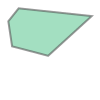

[Segment2D(Point2D(8.65828883438023, 7.34301552138169), Point2D(8.70272544846209, 7.04701161488096)), Segment2D(Point2D(8.70272544846209, 7.04701161488096), Point2D(9.12778290654095, 6.93559994641474)), Segment2D(Point2D(9.12778290654095, 6.93559994641474), Point2D(9.64160776269167, 7.40371686068749)), Segment2D(Point2D(8.78011692530016, 7.49557689874600), Point2D(9.64160776269167, 7.40371686068749)), Segment2D(Point2D(8.65828883438023, 7.34301552138169), Point2D(8.78011692530016, 7.49557689874600))] 

{Point2D(8.22894569662154, 7.41678269429984), Point2D(8.52467593900986, 6.83891821034695), Point2D(8.65828883438023, 7.34301552138169), Point2D(8.70272544846209, 7.04701161488096), Point2D(8.06121890248817, 7.13446980068400), Point2D(8.10518367134016, 6.98774869513833)}
------------
Point2D(8.39618772229393, 7.14264064997842)
6 {Point2D(8.22894569662154, 7.41678269429984), Point2D(8.52467593900986, 6.83891821034695), Point2D(8.65828883438023, 7.34301552138169), Point2D(8.70272544846209, 

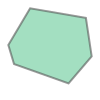

[Segment2D(Point2D(8.06121890248817, 7.13446980068400), Point2D(8.10518367134016, 6.98774869513833)), Segment2D(Point2D(8.10518367134016, 6.98774869513833), Point2D(8.52467593900986, 6.83891821034695)), Segment2D(Point2D(8.52467593900986, 6.83891821034695), Point2D(8.70272544846209, 7.04701161488096)), Segment2D(Point2D(8.65828883438023, 7.34301552138169), Point2D(8.70272544846209, 7.04701161488096)), Segment2D(Point2D(8.22894569662154, 7.41678269429984), Point2D(8.65828883438023, 7.34301552138169)), Segment2D(Point2D(8.06121890248817, 7.13446980068400), Point2D(8.22894569662154, 7.41678269429984))] 

{Point2D(7.88202199522164, 6.61455023115043), Point2D(8.30836875468951, 6.35108894345263), Point2D(8.52467593900986, 6.83891821034695), Point2D(8.55090624378854, 6.62480655300275), Point2D(8.10518367134016, 6.98774869513833), Point2D(7.88696000773389, 6.59654919370068)}
------------
Point2D(8.23349897334687, 6.68408760343144)
6 {Point2D(7.88202199522164, 6.61455023115043), Point2D(8.30836

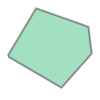

[Segment2D(Point2D(7.88202199522164, 6.61455023115043), Point2D(7.88696000773389, 6.59654919370068)), Segment2D(Point2D(7.88696000773389, 6.59654919370068), Point2D(8.30836875468951, 6.35108894345263)), Segment2D(Point2D(8.30836875468951, 6.35108894345263), Point2D(8.55090624378854, 6.62480655300275)), Segment2D(Point2D(8.52467593900986, 6.83891821034695), Point2D(8.55090624378854, 6.62480655300275)), Segment2D(Point2D(8.10518367134016, 6.98774869513833), Point2D(8.52467593900986, 6.83891821034695)), Segment2D(Point2D(7.88202199522164, 6.61455023115043), Point2D(8.10518367134016, 6.98774869513833))] 

{Point2D(8.68365806772316, 5.81013832916239), Point2D(8.02185935799000, 5.90278574883357), Point2D(8.69659868741688, 5.98797713524909), Point2D(8.36229078761664, 5.56050324190048), Point2D(8.31883276593181, 6.24369594612075)}
------------
Point2D(8.37320273394541, 5.91095370301488)
5 {Point2D(8.68365806772316, 5.81013832916239), Point2D(8.02185935799000, 5.90278574883357), Point2D(8.69659

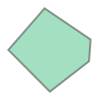

[Segment2D(Point2D(8.02185935799000, 5.90278574883357), Point2D(8.36229078761664, 5.56050324190048)), Segment2D(Point2D(8.36229078761664, 5.56050324190048), Point2D(8.68365806772316, 5.81013832916239)), Segment2D(Point2D(8.68365806772316, 5.81013832916239), Point2D(8.69659868741688, 5.98797713524909)), Segment2D(Point2D(8.31883276593181, 6.24369594612075), Point2D(8.69659868741688, 5.98797713524909)), Segment2D(Point2D(8.02185935799000, 5.90278574883357), Point2D(8.31883276593181, 6.24369594612075))] 

{Point2D(8.02185935799000, 5.90278574883357), Point2D(7.97391346155168, 5.90073166847212), Point2D(8.30836875468951, 6.35108894345263), Point2D(8.31883276593181, 6.24369594612075), Point2D(7.88696000773389, 6.59654919370068), Point2D(7.65793982468672, 6.18434668365630)}
------------
Point2D(7.9817783520818, 6.25193098547392)
6 {Point2D(8.02185935799000, 5.90278574883357), Point2D(7.97391346155168, 5.90073166847212), Point2D(8.30836875468951, 6.35108894345263), Point2D(8.31883276593181, 6

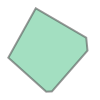

[Segment2D(Point2D(7.65793982468672, 6.18434668365630), Point2D(7.97391346155168, 5.90073166847212)), Segment2D(Point2D(7.97391346155168, 5.90073166847212), Point2D(8.02185935799000, 5.90278574883357)), Segment2D(Point2D(8.02185935799000, 5.90278574883357), Point2D(8.31883276593181, 6.24369594612075)), Segment2D(Point2D(8.30836875468951, 6.35108894345263), Point2D(8.31883276593181, 6.24369594612075)), Segment2D(Point2D(7.88696000773389, 6.59654919370068), Point2D(8.30836875468951, 6.35108894345263)), Segment2D(Point2D(7.65793982468672, 6.18434668365630), Point2D(7.88696000773389, 6.59654919370068))] 

{Point2D(0.339067795040711, 5.39971810668828), Point2D(0.535195842238845, 5.71150010190225)}
{Point2D(0.996127861056968, 5.39725927857678), Point2D(0.535195842238845, 5.71150010190225), Point2D(0.661928130270684, 5.09500273514042), Point2D(0.730212380071347, 5.74228478810310), Point2D(0.894605546677009, 5.17186598680155), Point2D(0.339067795040711, 5.39971810668828)}
------------
Point2D(

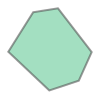

[Segment2D(Point2D(0.339067795040711, 5.39971810668828), Point2D(0.661928130270684, 5.09500273514042)), Segment2D(Point2D(0.661928130270684, 5.09500273514042), Point2D(0.894605546677009, 5.17186598680155)), Segment2D(Point2D(0.894605546677009, 5.17186598680155), Point2D(0.996127861056968, 5.39725927857678)), Segment2D(Point2D(0.730212380071347, 5.74228478810310), Point2D(0.996127861056968, 5.39725927857678)), Segment2D(Point2D(0.535195842238845, 5.71150010190225), Point2D(0.730212380071347, 5.74228478810310)), Segment2D(Point2D(0.339067795040711, 5.39971810668828), Point2D(0.535195842238845, 5.71150010190225))] 

{Point2D(0.895747927959064, 5.98897135517772), Point2D(0.658543573661467, 6.35849973829833), Point2D(0.730212380071347, 5.74228478810310), Point2D(0.535195842238845, 5.71150010190225)}
------------
Point2D(0.578001783054506, 6.03485833297649)
4 {Point2D(0.895747927959064, 5.98897135517772), Point2D(0.658543573661467, 6.35849973829833), Point2D(0.730212380071347, 5.742284788103

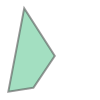

[Segment2D(Point2D(0.535195842238845, 5.71150010190225), Point2D(0.730212380071347, 5.74228478810310)), Segment2D(Point2D(0.730212380071347, 5.74228478810310), Point2D(0.895747927959064, 5.98897135517772)), Segment2D(Point2D(0.658543573661467, 6.35849973829833), Point2D(0.895747927959064, 5.98897135517772)), Segment2D(Point2D(0.535195842238845, 5.71150010190225), Point2D(0.658543573661467, 6.35849973829833))] 

{Point2D(0.996127861056968, 5.39725927857678), Point2D(1.31295372759057, 5.49355828540464), Point2D(0.730212380071347, 5.74228478810310), Point2D(1.16999542718935, 6.02289409729205), Point2D(0.895747927959064, 5.98897135517772), Point2D(1.37798698343782, 5.62860656768946)}
------------
Point2D(1.05864792369317, 5.71232750702085)
6 {Point2D(0.996127861056968, 5.39725927857678), Point2D(1.31295372759057, 5.49355828540464), Point2D(0.730212380071347, 5.74228478810310), Point2D(1.16999542718935, 6.02289409729205), Point2D(0.895747927959064, 5.98897135517772), Point2D(1.3779869834378

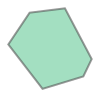

[Segment2D(Point2D(0.730212380071347, 5.74228478810310), Point2D(0.996127861056968, 5.39725927857678)), Segment2D(Point2D(0.996127861056968, 5.39725927857678), Point2D(1.31295372759057, 5.49355828540464)), Segment2D(Point2D(1.31295372759057, 5.49355828540464), Point2D(1.37798698343782, 5.62860656768946)), Segment2D(Point2D(1.16999542718935, 6.02289409729205), Point2D(1.37798698343782, 5.62860656768946)), Segment2D(Point2D(0.895747927959064, 5.98897135517772), Point2D(1.16999542718935, 6.02289409729205)), Segment2D(Point2D(0.730212380071347, 5.74228478810310), Point2D(0.895747927959064, 5.98897135517772))] 

{Point2D(0.996127861056968, 5.39725927857678), Point2D(1.31295372759057, 5.49355828540464), Point2D(1.55985858758704, 5.09684768672255), Point2D(1.53990405716223, 5.02710041803102), Point2D(0.894605546677009, 5.17186598680155), Point2D(1.18979810809271, 4.84689764079371)}
------------
Point2D(1.22340454429116, 5.17027457410314)
6 {Point2D(0.996127861056968, 5.39725927857678), Point2

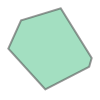

[Segment2D(Point2D(0.894605546677009, 5.17186598680155), Point2D(1.18979810809271, 4.84689764079371)), Segment2D(Point2D(1.18979810809271, 4.84689764079371), Point2D(1.53990405716223, 5.02710041803102)), Segment2D(Point2D(1.53990405716223, 5.02710041803102), Point2D(1.55985858758704, 5.09684768672255)), Segment2D(Point2D(1.31295372759057, 5.49355828540464), Point2D(1.55985858758704, 5.09684768672255)), Segment2D(Point2D(0.996127861056968, 5.39725927857678), Point2D(1.31295372759057, 5.49355828540464)), Segment2D(Point2D(0.894605546677009, 5.17186598680155), Point2D(0.996127861056968, 5.39725927857678))] 

{Point2D(0.536623651595150, 4.79464880133266), Point2D(0.661928130270684, 5.09500273514042), Point2D(0.879870674725248, 4.52404314264791), Point2D(0.894605546677009, 5.17186598680155), Point2D(1.14190833355610, 4.66278853153087), Point2D(1.18979810809271, 4.84689764079371)}
------------
Point2D(0.864689004398722, 4.84442696358568)
6 {Point2D(0.536623651595150, 4.79464880133266), Point

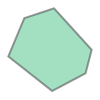

[Segment2D(Point2D(0.536623651595150, 4.79464880133266), Point2D(0.879870674725248, 4.52404314264791)), Segment2D(Point2D(0.879870674725248, 4.52404314264791), Point2D(1.14190833355610, 4.66278853153087)), Segment2D(Point2D(1.14190833355610, 4.66278853153087), Point2D(1.18979810809271, 4.84689764079371)), Segment2D(Point2D(0.894605546677009, 5.17186598680155), Point2D(1.18979810809271, 4.84689764079371)), Segment2D(Point2D(0.661928130270684, 5.09500273514042), Point2D(0.894605546677009, 5.17186598680155)), Segment2D(Point2D(0.536623651595150, 4.79464880133266), Point2D(0.661928130270684, 5.09500273514042))] 

{Point2D(0.378021015824725, 4.73542663280903), Point2D(0.339067795040711, 5.39971810668828), Point2D(0.536623651595150, 4.79464880133266), Point2D(0.661928130270684, 5.09500273514042)}
------------
Point2D(0.341203264499517, 5.06281966748857)
4 {Point2D(0.378021015824725, 4.73542663280903), Point2D(0.339067795040711, 5.39971810668828), Point2D(0.536623651595150, 4.79464880133266),

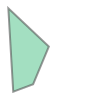

[Segment2D(Point2D(0.339067795040711, 5.39971810668828), Point2D(0.378021015824725, 4.73542663280903)), Segment2D(Point2D(0.378021015824725, 4.73542663280903), Point2D(0.536623651595150, 4.79464880133266)), Segment2D(Point2D(0.536623651595150, 4.79464880133266), Point2D(0.661928130270684, 5.09500273514042)), Segment2D(Point2D(0.339067795040711, 5.39971810668828), Point2D(0.661928130270684, 5.09500273514042))] 

{Point2D(1.12007115824922, 6.59735554729514), Point2D(0.893741656921755, 6.60700571734978), Point2D(1.16999542718935, 6.02289409729205), Point2D(0.895747927959064, 5.98897135517772), Point2D(1.29340021594517, 6.19646331294936), Point2D(0.658543573661467, 6.35849973829833)}
------------
Point2D(0.98633127119017, 6.29696954553326)
6 {Point2D(1.12007115824922, 6.59735554729514), Point2D(0.893741656921755, 6.60700571734978), Point2D(1.16999542718935, 6.02289409729205), Point2D(0.895747927959064, 5.98897135517772), Point2D(1.29340021594517, 6.19646331294936), Point2D(0.65854357366146

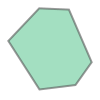

[Segment2D(Point2D(0.658543573661467, 6.35849973829833), Point2D(0.895747927959064, 5.98897135517772)), Segment2D(Point2D(0.895747927959064, 5.98897135517772), Point2D(1.16999542718935, 6.02289409729205)), Segment2D(Point2D(1.16999542718935, 6.02289409729205), Point2D(1.29340021594517, 6.19646331294936)), Segment2D(Point2D(1.12007115824922, 6.59735554729514), Point2D(1.29340021594517, 6.19646331294936)), Segment2D(Point2D(0.893741656921755, 6.60700571734978), Point2D(1.12007115824922, 6.59735554729514)), Segment2D(Point2D(0.658543573661467, 6.35849973829833), Point2D(0.893741656921755, 6.60700571734978))] 

{Point2D(1.20786973474553, 2.27370675144230), Point2D(1.30422110758310, 2.39979799955283), Point2D(1.24954250745900, 2.73126898628206), Point2D(0.810475177802200, 2.81112586485397)}
------------
Point2D(0.997531350799363, 2.52912066013615)
4 {Point2D(1.20786973474553, 2.27370675144230), Point2D(1.30422110758310, 2.39979799955283), Point2D(1.24954250745900, 2.73126898628206), Point2D

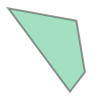

[Segment2D(Point2D(0.810475177802200, 2.81112586485397), Point2D(1.20786973474553, 2.27370675144230)), Segment2D(Point2D(1.20786973474553, 2.27370675144230), Point2D(1.30422110758310, 2.39979799955283)), Segment2D(Point2D(1.24954250745900, 2.73126898628206), Point2D(1.30422110758310, 2.39979799955283)), Segment2D(Point2D(0.810475177802200, 2.81112586485397), Point2D(1.24954250745900, 2.73126898628206))] 

{Point2D(1.39856551092080, 2.91092313281969), Point2D(0.811441804312936, 3.18925524388339), Point2D(1.24954250745900, 2.73126898628206), Point2D(0.952036223673641, 3.31180659743513), Point2D(1.36358417785533, 3.16817334559620), Point2D(0.810475177802200, 2.81112586485397)}
------------
Point2D(1.08484869542155, 3.0092069597961)
6 {Point2D(1.39856551092080, 2.91092313281969), Point2D(0.811441804312936, 3.18925524388339), Point2D(1.24954250745900, 2.73126898628206), Point2D(0.952036223673641, 3.31180659743513), Point2D(1.36358417785533, 3.16817334559620), Point2D(0.810475177802200, 2.81

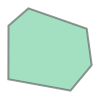

[Segment2D(Point2D(0.810475177802200, 2.81112586485397), Point2D(1.24954250745900, 2.73126898628206)), Segment2D(Point2D(1.24954250745900, 2.73126898628206), Point2D(1.39856551092080, 2.91092313281969)), Segment2D(Point2D(1.36358417785533, 3.16817334559620), Point2D(1.39856551092080, 2.91092313281969)), Segment2D(Point2D(0.952036223673641, 3.31180659743513), Point2D(1.36358417785533, 3.16817334559620)), Segment2D(Point2D(0.811441804312936, 3.18925524388339), Point2D(0.952036223673641, 3.31180659743513)), Segment2D(Point2D(0.810475177802200, 2.81112586485397), Point2D(0.811441804312936, 3.18925524388339))] 

{Point2D(1.39856551092080, 2.91092313281969), Point2D(1.74070928168165, 2.36042727755467), Point2D(1.82201752637418, 2.80112050232739), Point2D(1.24954250745900, 2.73126898628206), Point2D(1.30422110758310, 2.39979799955283), Point2D(1.88319961567893, 2.60587449714229)}
------------
Point2D(1.55312710906642, 2.62077030524293)
6 {Point2D(1.39856551092080, 2.91092313281969), Point2D(1

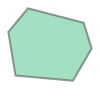

[Segment2D(Point2D(1.24954250745900, 2.73126898628206), Point2D(1.30422110758310, 2.39979799955283)), Segment2D(Point2D(1.30422110758310, 2.39979799955283), Point2D(1.74070928168165, 2.36042727755467)), Segment2D(Point2D(1.74070928168165, 2.36042727755467), Point2D(1.88319961567893, 2.60587449714229)), Segment2D(Point2D(1.82201752637418, 2.80112050232739), Point2D(1.88319961567893, 2.60587449714229)), Segment2D(Point2D(1.39856551092080, 2.91092313281969), Point2D(1.82201752637418, 2.80112050232739)), Segment2D(Point2D(1.24954250745900, 2.73126898628206), Point2D(1.39856551092080, 2.91092313281969))] 

{Point2D(1.20786973474553, 2.27370675144230), Point2D(1.74070928168165, 2.36042727755467), Point2D(1.83491139479991, 2.08584627450887), Point2D(1.30422110758310, 2.39979799955283)}
------------
Point2D(1.50956849506747, 2.13785257029369)
4 {Point2D(1.20786973474553, 2.27370675144230), Point2D(1.74070928168165, 2.36042727755467), Point2D(1.83491139479991, 2.08584627450887), Point2D(1.30422

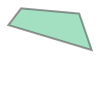

[Segment2D(Point2D(1.20786973474553, 2.27370675144230), Point2D(1.83491139479991, 2.08584627450887)), Segment2D(Point2D(1.74070928168165, 2.36042727755467), Point2D(1.83491139479991, 2.08584627450887)), Segment2D(Point2D(1.30422110758310, 2.39979799955283), Point2D(1.74070928168165, 2.36042727755467)), Segment2D(Point2D(1.20786973474553, 2.27370675144230), Point2D(1.30422110758310, 2.39979799955283))] 

{Point2D(3.68701379638132, 8.69891271205618), Point2D(3.46597700270800, 8.69205200473312), Point2D(3.89654413143874, 9.08152755106984)}
------------
Point2D(3.57731263454213, 9.00220280930805)
3 {Point2D(3.68701379638132, 8.69891271205618), Point2D(3.46597700270800, 8.69205200473312), Point2D(3.89654413143874, 9.08152755106984)}
Triangle(Point2D(3.465977002708, 8.69205200473312), Point2D(3.68701379638132, 8.69891271205618), Point2D(3.89654413143874, 9.08152755106984))


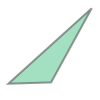

[Segment2D(Point2D(3.46597700270800, 8.69205200473312), Point2D(3.68701379638132, 8.69891271205618)), Segment2D(Point2D(3.68701379638132, 8.69891271205618), Point2D(3.89654413143874, 9.08152755106984)), Segment2D(Point2D(3.46597700270800, 8.69205200473312), Point2D(3.89654413143874, 9.08152755106984))] 

{Point2D(3.62888619603976, 8.03468091472284), Point2D(3.68701379638132, 8.69891271205618), Point2D(3.46597700270800, 8.69205200473312), Point2D(3.93321336754438, 8.43661073235953), Point2D(3.28382966682667, 8.28730087695292), Point2D(3.65671890161843, 8.03964933403804)}
------------
Point2D(3.59633317848515, 8.38940301343935)
6 {Point2D(3.62888619603976, 8.03468091472284), Point2D(3.68701379638132, 8.69891271205618), Point2D(3.46597700270800, 8.69205200473312), Point2D(3.93321336754438, 8.43661073235953), Point2D(3.28382966682667, 8.28730087695292), Point2D(3.65671890161843, 8.03964933403804)}
Polygon(Point2D(3.28382966682667, 8.28730087695292), Point2D(3.62888619603976, 8.034680914722

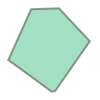

[Segment2D(Point2D(3.28382966682667, 8.28730087695292), Point2D(3.62888619603976, 8.03468091472284)), Segment2D(Point2D(3.62888619603976, 8.03468091472284), Point2D(3.65671890161843, 8.03964933403804)), Segment2D(Point2D(3.65671890161843, 8.03964933403804), Point2D(3.93321336754438, 8.43661073235953)), Segment2D(Point2D(3.68701379638132, 8.69891271205618), Point2D(3.93321336754438, 8.43661073235953)), Segment2D(Point2D(3.46597700270800, 8.69205200473312), Point2D(3.68701379638132, 8.69891271205618)), Segment2D(Point2D(3.28382966682667, 8.28730087695292), Point2D(3.46597700270800, 8.69205200473312))] 

{Point2D(4.04848501707951, 8.43731682210541), Point2D(3.68701379638132, 8.69891271205618), Point2D(4.16801163915913, 9.04403954988305), Point2D(3.93321336754438, 8.43661073235953), Point2D(4.33285030994469, 8.79138706252590), Point2D(3.89654413143874, 9.08152755106984)}
------------
Point2D(4.00164069128183, 8.76982917703563)
6 {Point2D(4.04848501707951, 8.43731682210541), Point2D(3.68701

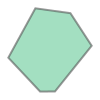

[Segment2D(Point2D(3.68701379638132, 8.69891271205618), Point2D(3.93321336754438, 8.43661073235953)), Segment2D(Point2D(3.93321336754438, 8.43661073235953), Point2D(4.04848501707951, 8.43731682210541)), Segment2D(Point2D(4.04848501707951, 8.43731682210541), Point2D(4.33285030994469, 8.79138706252590)), Segment2D(Point2D(4.16801163915913, 9.04403954988305), Point2D(4.33285030994469, 8.79138706252590)), Segment2D(Point2D(3.89654413143874, 9.08152755106984), Point2D(4.16801163915913, 9.04403954988305)), Segment2D(Point2D(3.68701379638132, 8.69891271205618), Point2D(3.89654413143874, 9.08152755106984))] 

{Point2D(3.46597700270800, 8.69205200473312), Point2D(3.12739220444452, 8.25556018995620), Point2D(2.86600415317980, 8.44516212332526), Point2D(3.28382966682667, 8.28730087695292)}
------------
Point2D(3.15300577873698, 8.58891056078132)
4 {Point2D(3.46597700270800, 8.69205200473312), Point2D(3.12739220444452, 8.25556018995620), Point2D(2.86600415317980, 8.44516212332526), Point2D(3.28382

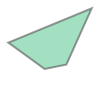

[Segment2D(Point2D(2.86600415317980, 8.44516212332526), Point2D(3.12739220444452, 8.25556018995620)), Segment2D(Point2D(3.12739220444452, 8.25556018995620), Point2D(3.28382966682667, 8.28730087695292)), Segment2D(Point2D(3.28382966682667, 8.28730087695292), Point2D(3.46597700270800, 8.69205200473312)), Segment2D(Point2D(2.86600415317980, 8.44516212332526), Point2D(3.46597700270800, 8.69205200473312))] 

{Point2D(2.96825935780485, 7.82053540644733), Point2D(2.61778216261270, 8.38809875316074), Point2D(2.54308030969903, 7.95649412495611), Point2D(2.86600415317980, 8.44516212332526), Point2D(2.88924714178708, 7.78987227763069), Point2D(3.12739220444452, 8.25556018995620)}
------------
Point2D(2.81846887783005, 8.12771300308558)
6 {Point2D(2.96825935780485, 7.82053540644733), Point2D(2.61778216261270, 8.38809875316074), Point2D(2.54308030969903, 7.95649412495611), Point2D(2.86600415317980, 8.44516212332526), Point2D(2.88924714178708, 7.78987227763069), Point2D(3.12739220444452, 8.255560189

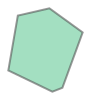

[Segment2D(Point2D(2.54308030969903, 7.95649412495611), Point2D(2.88924714178708, 7.78987227763069)), Segment2D(Point2D(2.88924714178708, 7.78987227763069), Point2D(2.96825935780485, 7.82053540644733)), Segment2D(Point2D(2.96825935780485, 7.82053540644733), Point2D(3.12739220444452, 8.25556018995620)), Segment2D(Point2D(2.86600415317980, 8.44516212332526), Point2D(3.12739220444452, 8.25556018995620)), Segment2D(Point2D(2.61778216261270, 8.38809875316074), Point2D(2.86600415317980, 8.44516212332526)), Segment2D(Point2D(2.54308030969903, 7.95649412495611), Point2D(2.61778216261270, 8.38809875316074))] 

{Point2D(3.62888619603976, 8.03468091472284), Point2D(2.96825935780485, 7.82053540644733), Point2D(3.38179525024245, 7.62877312622757), Point2D(3.28382966682667, 8.28730087695292), Point2D(3.12739220444452, 8.25556018995620)}
------------
Point2D(3.28090328182179, 7.95855366807537)
5 {Point2D(3.62888619603976, 8.03468091472284), Point2D(2.96825935780485, 7.82053540644733), Point2D(3.38179

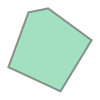

[Segment2D(Point2D(2.96825935780485, 7.82053540644733), Point2D(3.38179525024245, 7.62877312622757)), Segment2D(Point2D(3.38179525024245, 7.62877312622757), Point2D(3.62888619603976, 8.03468091472284)), Segment2D(Point2D(3.28382966682667, 8.28730087695292), Point2D(3.62888619603976, 8.03468091472284)), Segment2D(Point2D(3.12739220444452, 8.25556018995620), Point2D(3.28382966682667, 8.28730087695292)), Segment2D(Point2D(2.96825935780485, 7.82053540644733), Point2D(3.12739220444452, 8.25556018995620))] 

{Point2D(2.09749036517574, 8.00175297628248), Point2D(2.61778216261270, 8.38809875316074), Point2D(2.54308030969903, 7.95649412495611), Point2D(2.35943800559601, 7.88002569648222), Point2D(10, 3.31535020636840)}
------------
Point2D(2.34125625260547, 8.21030865894395)
5 {Point2D(2.09749036517574, 8.00175297628248), Point2D(2.61778216261270, 8.38809875316074), Point2D(2.54308030969903, 7.95649412495611), Point2D(2.35943800559601, 7.88002569648222), Point2D(10, 3.31535020636840)}
Triangle(

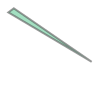

[Segment2D(Point2D(2.09749036517574, 8.00175297628248), Point2D(10, 3.31535020636840)), Segment2D(Point2D(2.61778216261270, 8.38809875316074), Point2D(10, 3.31535020636840)), Segment2D(Point2D(2.09749036517574, 8.00175297628248), Point2D(2.61778216261270, 8.38809875316074))] 

{Point2D(1.87068904055252, 7.45054029751397), Point2D(2.09749036517574, 8.00175297628248), Point2D(1.83675853133760, 7.88492682547466), Point2D(2.31659497547161, 7.43250034830614), Point2D(2.35943800559601, 7.88002569648222), Point2D(2.20417534261633, 7.36138379514115)}
------------
Point2D(2.09526446728271, 7.68095346564793)
6 {Point2D(1.87068904055252, 7.45054029751397), Point2D(2.09749036517574, 8.00175297628248), Point2D(1.83675853133760, 7.88492682547466), Point2D(2.31659497547161, 7.43250034830614), Point2D(2.35943800559601, 7.88002569648222), Point2D(2.20417534261633, 7.36138379514115)}
Polygon(Point2D(1.8367585313376, 7.88492682547466), Point2D(1.87068904055252, 7.45054029751397), Point2D(2.20417534261633

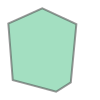

[Segment2D(Point2D(1.83675853133760, 7.88492682547466), Point2D(1.87068904055252, 7.45054029751397)), Segment2D(Point2D(1.87068904055252, 7.45054029751397), Point2D(2.20417534261633, 7.36138379514115)), Segment2D(Point2D(2.20417534261633, 7.36138379514115), Point2D(2.31659497547161, 7.43250034830614)), Segment2D(Point2D(2.31659497547161, 7.43250034830614), Point2D(2.35943800559601, 7.88002569648222)), Segment2D(Point2D(2.09749036517574, 8.00175297628248), Point2D(2.35943800559601, 7.88002569648222)), Segment2D(Point2D(1.83675853133760, 7.88492682547466), Point2D(2.09749036517574, 8.00175297628248))] 

{Point2D(2.75085591132534, 7.31738430938661), Point2D(2.54308030969903, 7.95649412495611), Point2D(2.31659497547161, 7.43250034830614), Point2D(2.88924714178708, 7.78987227763069), Point2D(2.35943800559601, 7.88002569648222)}
------------
Point2D(2.58104381173503, 7.63444825834961)
5 {Point2D(2.75085591132534, 7.31738430938661), Point2D(2.54308030969903, 7.95649412495611), Point2D(2.31659

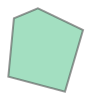

[Segment2D(Point2D(2.31659497547161, 7.43250034830614), Point2D(2.75085591132534, 7.31738430938661)), Segment2D(Point2D(2.75085591132534, 7.31738430938661), Point2D(2.88924714178708, 7.78987227763069)), Segment2D(Point2D(2.54308030969903, 7.95649412495611), Point2D(2.88924714178708, 7.78987227763069)), Segment2D(Point2D(2.35943800559601, 7.88002569648222), Point2D(2.54308030969903, 7.95649412495611)), Segment2D(Point2D(2.31659497547161, 7.43250034830614), Point2D(2.35943800559601, 7.88002569648222))] 

{Point2D(2.61778216261270, 8.38809875316074), Point2D(2.86600415317980, 8.44516212332526), Point2D(10, 3.31535020636840)}
------------
Point2D(2.68461163820891, 8.70998338730544)
3 {Point2D(2.61778216261270, 8.38809875316074), Point2D(2.86600415317980, 8.44516212332526), Point2D(10, 3.31535020636840)}
Triangle(Point2D(2.6177821626127, 8.38809875316074), Point2D(10, 3.3153502063684), Point2D(2.8660041531798, 8.44516212332526))


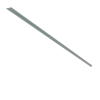

[Segment2D(Point2D(2.61778216261270, 8.38809875316074), Point2D(10, 3.31535020636840)), Segment2D(Point2D(2.86600415317980, 8.44516212332526), Point2D(10, 3.31535020636840)), Segment2D(Point2D(2.61778216261270, 8.38809875316074), Point2D(2.86600415317980, 8.44516212332526))] 

{Point2D(1.83675853133760, 7.88492682547466), Point2D(1.64501133272427, 7.96680409522159), Point2D(2.09749036517574, 8.00175297628248)}
------------
Point2D(1.85659399378835, 8.21361665626842)
3 {Point2D(1.83675853133760, 7.88492682547466), Point2D(1.64501133272427, 7.96680409522159), Point2D(2.09749036517574, 8.00175297628248)}
Triangle(Point2D(1.64501133272427, 7.96680409522159), Point2D(1.8367585313376, 7.88492682547466), Point2D(2.09749036517574, 8.00175297628248))


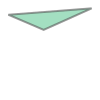

[Segment2D(Point2D(1.64501133272427, 7.96680409522159), Point2D(1.83675853133760, 7.88492682547466)), Segment2D(Point2D(1.83675853133760, 7.88492682547466), Point2D(2.09749036517574, 8.00175297628248)), Segment2D(Point2D(1.64501133272427, 7.96680409522159), Point2D(2.09749036517574, 8.00175297628248))] 

{Point2D(1.87068904055252, 7.45054029751397), Point2D(1.42630169438336, 7.38131341139643), Point2D(1.83675853133760, 7.88492682547466), Point2D(1.32235018273123, 7.81078644082805), Point2D(1.67583100540746, 7.32027393753698), Point2D(1.64501133272427, 7.96680409522159)}
------------
Point2D(1.61305996881332, 7.64328783118269)
6 {Point2D(1.87068904055252, 7.45054029751397), Point2D(1.42630169438336, 7.38131341139643), Point2D(1.83675853133760, 7.88492682547466), Point2D(1.32235018273123, 7.81078644082805), Point2D(1.67583100540746, 7.32027393753698), Point2D(1.64501133272427, 7.96680409522159)}
Polygon(Point2D(1.32235018273123, 7.81078644082805), Point2D(1.42630169438336, 7.381313411396

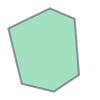

[Segment2D(Point2D(1.32235018273123, 7.81078644082805), Point2D(1.42630169438336, 7.38131341139643)), Segment2D(Point2D(1.42630169438336, 7.38131341139643), Point2D(1.67583100540746, 7.32027393753698)), Segment2D(Point2D(1.67583100540746, 7.32027393753698), Point2D(1.87068904055252, 7.45054029751397)), Segment2D(Point2D(1.83675853133760, 7.88492682547466), Point2D(1.87068904055252, 7.45054029751397)), Segment2D(Point2D(1.64501133272427, 7.96680409522159), Point2D(1.83675853133760, 7.88492682547466)), Segment2D(Point2D(1.32235018273123, 7.81078644082805), Point2D(1.64501133272427, 7.96680409522159))] 

{Point2D(2.75085591132534, 7.31738430938661), Point2D(2.75682793520539, 7.30730845789962), Point2D(2.19199445035895, 6.88663383676338), Point2D(2.31659497547161, 7.43250034830614), Point2D(2.20417534261633, 7.36138379514115), Point2D(2.65421366067359, 6.86098362929099)}
------------
Point2D(2.44628122335504, 7.12607315877832)
6 {Point2D(2.75085591132534, 7.31738430938661), Point2D(2.75682

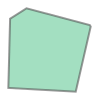

[Segment2D(Point2D(2.19199445035895, 6.88663383676338), Point2D(2.65421366067359, 6.86098362929099)), Segment2D(Point2D(2.65421366067359, 6.86098362929099), Point2D(2.75682793520539, 7.30730845789962)), Segment2D(Point2D(2.75085591132534, 7.31738430938661), Point2D(2.75682793520539, 7.30730845789962)), Segment2D(Point2D(2.31659497547161, 7.43250034830614), Point2D(2.75085591132534, 7.31738430938661)), Segment2D(Point2D(2.20417534261633, 7.36138379514115), Point2D(2.31659497547161, 7.43250034830614)), Segment2D(Point2D(2.19199445035895, 6.88663383676338), Point2D(2.20417534261633, 7.36138379514115))] 

{Point2D(1.87068904055252, 7.45054029751397), Point2D(1.74499722507690, 6.88459134400036), Point2D(2.19199445035895, 6.88663383676338), Point2D(2.20417534261633, 7.36138379514115), Point2D(1.67583100540746, 7.32027393753698), Point2D(2.15403179463928, 6.85236026686842)}
------------
Point2D(1.95032099531505, 7.13879825331512)
6 {Point2D(1.87068904055252, 7.45054029751397), Point2D(1.74499

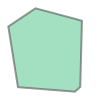

[Segment2D(Point2D(1.67583100540746, 7.32027393753698), Point2D(1.74499722507690, 6.88459134400036)), Segment2D(Point2D(1.74499722507690, 6.88459134400036), Point2D(2.15403179463928, 6.85236026686842)), Segment2D(Point2D(2.15403179463928, 6.85236026686842), Point2D(2.19199445035895, 6.88663383676338)), Segment2D(Point2D(2.19199445035895, 6.88663383676338), Point2D(2.20417534261633, 7.36138379514115)), Segment2D(Point2D(1.87068904055252, 7.45054029751397), Point2D(2.20417534261633, 7.36138379514115)), Segment2D(Point2D(1.67583100540746, 7.32027393753698), Point2D(1.87068904055252, 7.45054029751397))] 

{Point2D(1.16958752202575, 7.19924440751200), Point2D(1.74499722507690, 6.88459134400036), Point2D(1.42630169438336, 7.38131341139643), Point2D(1.30898961392313, 6.78587917968632), Point2D(1.61774578630239, 6.76407425139212), Point2D(1.67583100540746, 7.32027393753698)}
------------
Point2D(1.4710400744601, 7.06271063827837)
6 {Point2D(1.16958752202575, 7.19924440751200), Point2D(1.744997

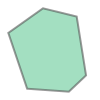

[Segment2D(Point2D(1.16958752202575, 7.19924440751200), Point2D(1.30898961392313, 6.78587917968632)), Segment2D(Point2D(1.30898961392313, 6.78587917968632), Point2D(1.61774578630239, 6.76407425139212)), Segment2D(Point2D(1.61774578630239, 6.76407425139212), Point2D(1.74499722507690, 6.88459134400036)), Segment2D(Point2D(1.67583100540746, 7.32027393753698), Point2D(1.74499722507690, 6.88459134400036)), Segment2D(Point2D(1.42630169438336, 7.38131341139643), Point2D(1.67583100540746, 7.32027393753698)), Segment2D(Point2D(1.16958752202575, 7.19924440751200), Point2D(1.42630169438336, 7.38131341139643))] 

{Point2D(1.16958752202575, 7.19924440751200), Point2D(1.42630169438336, 7.38131341139643), Point2D(0.993278413586012, 7.23560202893112), Point2D(10, 4.54234498620491), Point2D(1.32235018273123, 7.81078644082805)}
------------
Point2D(1.14041471277896, 7.52888672686887)
5 {Point2D(1.16958752202575, 7.19924440751200), Point2D(1.42630169438336, 7.38131341139643), Point2D(0.993278413586012, 7

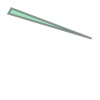

[Segment2D(Point2D(0.993278413586012, 7.23560202893112), Point2D(10, 4.54234498620491)), Segment2D(Point2D(1.32235018273123, 7.81078644082805), Point2D(10, 4.54234498620491)), Segment2D(Point2D(0.993278413586012, 7.23560202893112), Point2D(1.32235018273123, 7.81078644082805))] 

{Point2D(10, 4.54234498620491), Point2D(1.64501133272427, 7.96680409522159), Point2D(1.32235018273123, 7.81078644082805)}
------------
Point2D(1.37159439749753, 8.14266438717139)
3 {Point2D(10, 4.54234498620491), Point2D(1.64501133272427, 7.96680409522159), Point2D(1.32235018273123, 7.81078644082805)}
Triangle(Point2D(1.32235018273123, 7.81078644082805), Point2D(10, 4.54234498620491), Point2D(1.64501133272427, 7.96680409522159))


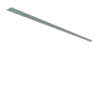

[Segment2D(Point2D(1.32235018273123, 7.81078644082805), Point2D(10, 4.54234498620491)), Segment2D(Point2D(1.64501133272427, 7.96680409522159), Point2D(10, 4.54234498620491)), Segment2D(Point2D(1.32235018273123, 7.81078644082805), Point2D(1.64501133272427, 7.96680409522159))] 

{Point2D(0.952036223673641, 3.31180659743513), Point2D(0.811441804312936, 3.18925524388339), Point2D(0.962032123694745, 3.61982640074183), Point2D(0.560105973768363, 3.80071434908720)}
------------
Point2D(0.670396388336143, 3.48467850522275)
4 {Point2D(0.952036223673641, 3.31180659743513), Point2D(0.811441804312936, 3.18925524388339), Point2D(0.962032123694745, 3.61982640074183), Point2D(0.560105973768363, 3.80071434908720)}
Polygon(Point2D(0.560105973768363, 3.8007143490872), Point2D(0.811441804312936, 3.18925524388339), Point2D(0.952036223673641, 3.31180659743513), Point2D(0.962032123694745, 3.61982640074183))


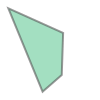

[Segment2D(Point2D(0.560105973768363, 3.80071434908720), Point2D(0.811441804312936, 3.18925524388339)), Segment2D(Point2D(0.811441804312936, 3.18925524388339), Point2D(0.952036223673641, 3.31180659743513)), Segment2D(Point2D(0.952036223673641, 3.31180659743513), Point2D(0.962032123694745, 3.61982640074183)), Segment2D(Point2D(0.560105973768363, 3.80071434908720), Point2D(0.962032123694745, 3.61982640074183))] 

{Point2D(0.811441804312936, 3.18925524388339), Point2D(0, 5/2), Point2D(0.810475177802200, 2.81112586485397)}
------------
Point2D(0.53711796399961, 3.01060714469338)
3 {Point2D(0.811441804312936, 3.18925524388339), Point2D(0, 5/2), Point2D(0.810475177802200, 2.81112586485397)}
Triangle(Point2D(0, 5/2), Point2D(0.8104751778022, 2.81112586485397), Point2D(0.811441804312936, 3.18925524388339))


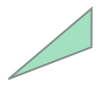

[Segment2D(Point2D(0, 5/2), Point2D(0.810475177802200, 2.81112586485397)), Segment2D(Point2D(0.810475177802200, 2.81112586485397), Point2D(0.811441804312936, 3.18925524388339)), Segment2D(Point2D(0, 5/2), Point2D(0.811441804312936, 3.18925524388339))] 

{Point2D(1.39856551092080, 2.91092313281969), Point2D(1.82201752637418, 2.80112050232739), Point2D(1.57269358065911, 3.40710154367224), Point2D(1.99106912638451, 3.21416794513874), Point2D(2.01659878852328, 3.12510494311878), Point2D(1.36358417785533, 3.16817334559620)}
------------
Point2D(1.67464673728587, 3.08940872725487)
6 {Point2D(1.39856551092080, 2.91092313281969), Point2D(1.82201752637418, 2.80112050232739), Point2D(1.57269358065911, 3.40710154367224), Point2D(1.99106912638451, 3.21416794513874), Point2D(2.01659878852328, 3.12510494311878), Point2D(1.36358417785533, 3.16817334559620)}
Polygon(Point2D(1.36358417785533, 3.1681733455962), Point2D(1.3985655109208, 2.91092313281969), Point2D(1.82201752637418, 2.80112050232739), Poin

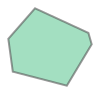

[Segment2D(Point2D(1.36358417785533, 3.16817334559620), Point2D(1.39856551092080, 2.91092313281969)), Segment2D(Point2D(1.39856551092080, 2.91092313281969), Point2D(1.82201752637418, 2.80112050232739)), Segment2D(Point2D(1.82201752637418, 2.80112050232739), Point2D(2.01659878852328, 3.12510494311878)), Segment2D(Point2D(1.99106912638451, 3.21416794513874), Point2D(2.01659878852328, 3.12510494311878)), Segment2D(Point2D(1.57269358065911, 3.40710154367224), Point2D(1.99106912638451, 3.21416794513874)), Segment2D(Point2D(1.36358417785533, 3.16817334559620), Point2D(1.57269358065911, 3.40710154367224))] 

{Point2D(1.57269358065911, 3.40710154367224), Point2D(0.952036223673641, 3.31180659743513), Point2D(1.16714204353871, 3.78620221957206), Point2D(1.36358417785533, 3.16817334559620), Point2D(0.962032123694745, 3.61982640074183), Point2D(1.55460083349911, 3.57207738802356)}
------------
Point2D(1.24429179095467, 3.46605437454816)
6 {Point2D(1.57269358065911, 3.40710154367224), Point2D(0.952

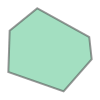

[Segment2D(Point2D(0.952036223673641, 3.31180659743513), Point2D(1.36358417785533, 3.16817334559620)), Segment2D(Point2D(1.36358417785533, 3.16817334559620), Point2D(1.57269358065911, 3.40710154367224)), Segment2D(Point2D(1.55460083349911, 3.57207738802356), Point2D(1.57269358065911, 3.40710154367224)), Segment2D(Point2D(1.16714204353871, 3.78620221957206), Point2D(1.55460083349911, 3.57207738802356)), Segment2D(Point2D(0.962032123694745, 3.61982640074183), Point2D(1.16714204353871, 3.78620221957206)), Segment2D(Point2D(0.952036223673641, 3.31180659743513), Point2D(0.962032123694745, 3.61982640074183))] 

{Point2D(1.53990405716223, 5.02710041803102), Point2D(1.47021838904749, 4.35181712026154), Point2D(1.82412731973132, 4.63024876460029), Point2D(1.14190833355610, 4.66278853153087), Point2D(1.18979810809271, 4.84689764079371)}
------------
Point2D(1.47249728893847, 4.68632614052138)
5 {Point2D(1.53990405716223, 5.02710041803102), Point2D(1.47021838904749, 4.35181712026154), Point2D(1.8

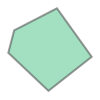

[Segment2D(Point2D(1.14190833355610, 4.66278853153087), Point2D(1.47021838904749, 4.35181712026154)), Segment2D(Point2D(1.47021838904749, 4.35181712026154), Point2D(1.82412731973132, 4.63024876460029)), Segment2D(Point2D(1.53990405716223, 5.02710041803102), Point2D(1.82412731973132, 4.63024876460029)), Segment2D(Point2D(1.18979810809271, 4.84689764079371), Point2D(1.53990405716223, 5.02710041803102)), Segment2D(Point2D(1.14190833355610, 4.66278853153087), Point2D(1.18979810809271, 4.84689764079371))] 

{Point2D(2.05248260234590, 5.27935937235911), Point2D(1.85113082834271, 4.62686829259349), Point2D(1.55985858758704, 5.09684768672255), Point2D(1.53990405716223, 5.02710041803102), Point2D(2.20481395187786, 4.93139069306930), Point2D(1.82412731973132, 4.63024876460029), Point2D(1.96349810637318, 5.31366456702517)}
------------
Point2D(1.88423679576454, 4.98121201272833)
7 {Point2D(2.05248260234590, 5.27935937235911), Point2D(1.85113082834271, 4.62686829259349), Point2D(1.55985858758704, 

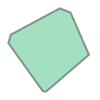

[Segment2D(Point2D(1.53990405716223, 5.02710041803102), Point2D(1.82412731973132, 4.63024876460029)), Segment2D(Point2D(1.82412731973132, 4.63024876460029), Point2D(1.85113082834271, 4.62686829259349)), Segment2D(Point2D(1.85113082834271, 4.62686829259349), Point2D(2.20481395187786, 4.93139069306930)), Segment2D(Point2D(2.05248260234590, 5.27935937235911), Point2D(2.20481395187786, 4.93139069306930)), Segment2D(Point2D(1.96349810637318, 5.31366456702517), Point2D(2.05248260234590, 5.27935937235911)), Segment2D(Point2D(1.55985858758704, 5.09684768672255), Point2D(1.96349810637318, 5.31366456702517)), Segment2D(Point2D(1.53990405716223, 5.02710041803102), Point2D(1.55985858758704, 5.09684768672255))] 

{Point2D(1.18068630181161, 4.01229415338714), Point2D(1.47021838904749, 4.35181712026154), Point2D(1.45983516290551, 4.22977074905960), Point2D(0.879870674725248, 4.52404314264791), Point2D(1.14190833355610, 4.66278853153087), Point2D(0.816865072598903, 4.25251040839243)}
------------
Poin

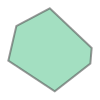

[Segment2D(Point2D(0.816865072598903, 4.25251040839243), Point2D(1.18068630181161, 4.01229415338714)), Segment2D(Point2D(1.18068630181161, 4.01229415338714), Point2D(1.45983516290551, 4.22977074905960)), Segment2D(Point2D(1.45983516290551, 4.22977074905960), Point2D(1.47021838904749, 4.35181712026154)), Segment2D(Point2D(1.14190833355610, 4.66278853153087), Point2D(1.47021838904749, 4.35181712026154)), Segment2D(Point2D(0.879870674725248, 4.52404314264791), Point2D(1.14190833355610, 4.66278853153087)), Segment2D(Point2D(0.816865072598903, 4.25251040839243), Point2D(0.879870674725248, 4.52404314264791))] 

{Point2D(1.83026333210457, 3.92441047833058), Point2D(1.85113082834271, 4.62686829259349), Point2D(2.12999621929894, 4.28164436029702), Point2D(1.47021838904749, 4.35181712026154), Point2D(1.45983516290551, 4.22977074905960), Point2D(1.82412731973132, 4.63024876460029)}
------------
Point2D(1.79586603207927, 4.27529855645016)
6 {Point2D(1.83026333210457, 3.92441047833058), Point2D(1.8

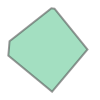

[Segment2D(Point2D(1.45983516290551, 4.22977074905960), Point2D(1.83026333210457, 3.92441047833058)), Segment2D(Point2D(1.83026333210457, 3.92441047833058), Point2D(2.12999621929894, 4.28164436029702)), Segment2D(Point2D(1.85113082834271, 4.62686829259349), Point2D(2.12999621929894, 4.28164436029702)), Segment2D(Point2D(1.82412731973132, 4.63024876460029), Point2D(1.85113082834271, 4.62686829259349)), Segment2D(Point2D(1.47021838904749, 4.35181712026154), Point2D(1.82412731973132, 4.63024876460029)), Segment2D(Point2D(1.45983516290551, 4.22977074905960), Point2D(1.47021838904749, 4.35181712026154))] 

{Point2D(1.74070928168165, 2.36042727755467), Point2D(2.32415230775971, 2.52690154056077), Point2D(2.38788079969992, 2.40239061730454), Point2D(1.88319961567893, 2.60587449714229), Point2D(1.83491139479991, 2.08584627450887), Point2D(2.27052687237184, 2.08379821078951)}
------------
Point2D(2.05980649801468, 2.32662594507428)
6 {Point2D(1.74070928168165, 2.36042727755467), Point2D(2.32415

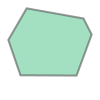

[Segment2D(Point2D(1.74070928168165, 2.36042727755467), Point2D(1.83491139479991, 2.08584627450887)), Segment2D(Point2D(1.83491139479991, 2.08584627450887), Point2D(2.27052687237184, 2.08379821078951)), Segment2D(Point2D(2.27052687237184, 2.08379821078951), Point2D(2.38788079969992, 2.40239061730454)), Segment2D(Point2D(2.32415230775971, 2.52690154056077), Point2D(2.38788079969992, 2.40239061730454)), Segment2D(Point2D(1.88319961567893, 2.60587449714229), Point2D(2.32415230775971, 2.52690154056077)), Segment2D(Point2D(1.74070928168165, 2.36042727755467), Point2D(1.88319961567893, 2.60587449714229))] 

{Point2D(1.82201752637418, 2.80112050232739), Point2D(2.32415230775971, 2.52690154056077), Point2D(2.47907076280242, 2.94801161787755), Point2D(1.88319961567893, 2.60587449714229), Point2D(2.01659878852328, 3.12510494311878)}
------------
Point2D(2.14574519921291, 2.80647250632294)
5 {Point2D(1.82201752637418, 2.80112050232739), Point2D(2.32415230775971, 2.52690154056077), Point2D(2.47907

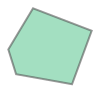

[Segment2D(Point2D(1.82201752637418, 2.80112050232739), Point2D(1.88319961567893, 2.60587449714229)), Segment2D(Point2D(1.88319961567893, 2.60587449714229), Point2D(2.32415230775971, 2.52690154056077)), Segment2D(Point2D(2.32415230775971, 2.52690154056077), Point2D(2.47907076280242, 2.94801161787755)), Segment2D(Point2D(2.01659878852328, 3.12510494311878), Point2D(2.47907076280242, 2.94801161787755)), Segment2D(Point2D(1.82201752637418, 2.80112050232739), Point2D(2.01659878852328, 3.12510494311878))] 

{Point2D(3.33412421224382, 5.31889828106301), Point2D(3.14164734581003, 4.99495672356323), Point2D(3.50385545971668, 4.72325766644601), Point2D(3.60518060601731, 5.35856054554315), Point2D(3.81706085899030, 4.93792095361477)}
------------
Point2D(3.48666864338381, 5.03866357134153)
5 {Point2D(3.33412421224382, 5.31889828106301), Point2D(3.14164734581003, 4.99495672356323), Point2D(3.50385545971668, 4.72325766644601), Point2D(3.60518060601731, 5.35856054554315), Point2D(3.81706085899030, 

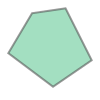

[Segment2D(Point2D(3.14164734581003, 4.99495672356323), Point2D(3.50385545971668, 4.72325766644601)), Segment2D(Point2D(3.50385545971668, 4.72325766644601), Point2D(3.81706085899030, 4.93792095361477)), Segment2D(Point2D(3.60518060601731, 5.35856054554315), Point2D(3.81706085899030, 4.93792095361477)), Segment2D(Point2D(3.33412421224382, 5.31889828106301), Point2D(3.60518060601731, 5.35856054554315)), Segment2D(Point2D(3.14164734581003, 4.99495672356323), Point2D(3.33412421224382, 5.31889828106301))] 

{Point2D(4.08670456781336, 5.53974656448167), Point2D(3.69278136744627, 5.48548662234834), Point2D(4.29933308986537, 5.28649569927640), Point2D(3.92085781197779, 4.91608163995463), Point2D(3.60518060601731, 5.35856054554315), Point2D(3.81706085899030, 4.93792095361477)}
------------
Point2D(3.93277527276065, 5.26337181873205)
6 {Point2D(4.08670456781336, 5.53974656448167), Point2D(3.69278136744627, 5.48548662234834), Point2D(4.29933308986537, 5.28649569927640), Point2D(3.92085781197779, 

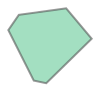

[Segment2D(Point2D(3.60518060601731, 5.35856054554315), Point2D(3.81706085899030, 4.93792095361477)), Segment2D(Point2D(3.81706085899030, 4.93792095361477), Point2D(3.92085781197779, 4.91608163995463)), Segment2D(Point2D(3.92085781197779, 4.91608163995463), Point2D(4.29933308986537, 5.28649569927640)), Segment2D(Point2D(4.08670456781336, 5.53974656448167), Point2D(4.29933308986537, 5.28649569927640)), Segment2D(Point2D(3.69278136744627, 5.48548662234834), Point2D(4.08670456781336, 5.53974656448167)), Segment2D(Point2D(3.60518060601731, 5.35856054554315), Point2D(3.69278136744627, 5.48548662234834))] 

{Point2D(4.09374275001031, 4.66421891040079), Point2D(3.91218656365319, 4.27118187759049), Point2D(3.47917038196160, 4.47002038849395), Point2D(3.92085781197779, 4.91608163995463), Point2D(3.50385545971668, 4.72325766644601), Point2D(3.81706085899030, 4.93792095361477)}
------------
Point2D(3.79181766838882, 4.59343456420575)
6 {Point2D(4.09374275001031, 4.66421891040079), Point2D(3.91218

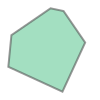

[Segment2D(Point2D(3.47917038196160, 4.47002038849395), Point2D(3.91218656365319, 4.27118187759049)), Segment2D(Point2D(3.91218656365319, 4.27118187759049), Point2D(4.09374275001031, 4.66421891040079)), Segment2D(Point2D(3.92085781197779, 4.91608163995463), Point2D(4.09374275001031, 4.66421891040079)), Segment2D(Point2D(3.81706085899030, 4.93792095361477), Point2D(3.92085781197779, 4.91608163995463)), Segment2D(Point2D(3.50385545971668, 4.72325766644601), Point2D(3.81706085899030, 4.93792095361477)), Segment2D(Point2D(3.47917038196160, 4.47002038849395), Point2D(3.50385545971668, 4.72325766644601))] 

{Point2D(3.32938397580589, 4.35203535766043), Point2D(3.07119866955128, 4.97583145760930), Point2D(3.47917038196160, 4.47002038849395), Point2D(3.14164734581003, 4.99495672356323), Point2D(2.86607358463140, 4.54889190679594), Point2D(2.91014097906000, 4.46806423712069), Point2D(3.50385545971668, 4.72325766644601)}
------------
Point2D(3.19624258112097, 4.65149006636991)
7 {Point2D(3.32938

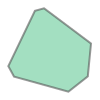

[Segment2D(Point2D(2.86607358463140, 4.54889190679594), Point2D(2.91014097906000, 4.46806423712069)), Segment2D(Point2D(2.91014097906000, 4.46806423712069), Point2D(3.32938397580589, 4.35203535766043)), Segment2D(Point2D(3.32938397580589, 4.35203535766043), Point2D(3.47917038196160, 4.47002038849395)), Segment2D(Point2D(3.47917038196160, 4.47002038849395), Point2D(3.50385545971668, 4.72325766644601)), Segment2D(Point2D(3.14164734581003, 4.99495672356323), Point2D(3.50385545971668, 4.72325766644601)), Segment2D(Point2D(3.07119866955128, 4.97583145760930), Point2D(3.14164734581003, 4.99495672356323)), Segment2D(Point2D(2.86607358463140, 4.54889190679594), Point2D(3.07119866955128, 4.97583145760930))] 

{Point2D(3.33412421224382, 5.31889828106301), Point2D(2.71229575013568, 5.19625830902234), Point2D(3.07119866955128, 4.97583145760930), Point2D(3.14164734581003, 4.99495672356323), Point2D(3.04868990714392, 5.67080621247625), Point2D(2.68163758230074, 5.35957209491750)}
------------
Point2

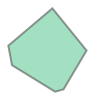

[Segment2D(Point2D(2.68163758230074, 5.35957209491750), Point2D(2.71229575013568, 5.19625830902234)), Segment2D(Point2D(2.71229575013568, 5.19625830902234), Point2D(3.07119866955128, 4.97583145760930)), Segment2D(Point2D(3.07119866955128, 4.97583145760930), Point2D(3.14164734581003, 4.99495672356323)), Segment2D(Point2D(3.14164734581003, 4.99495672356323), Point2D(3.33412421224382, 5.31889828106301)), Segment2D(Point2D(3.04868990714392, 5.67080621247625), Point2D(3.33412421224382, 5.31889828106301)), Segment2D(Point2D(2.68163758230074, 5.35957209491750), Point2D(3.04868990714392, 5.67080621247625))] 

{Point2D(3.33412421224382, 5.31889828106301), Point2D(3.56645846157367, 5.92560092394009), Point2D(3.69278136744627, 5.48548662234834), Point2D(3.04868990714392, 5.67080621247625), Point2D(3.60518060601731, 5.35856054554315), Point2D(3.05191244053625, 5.70621347862500), Point2D(3.42670878017809, 5.96447269674418)}
------------
Point2D(3.39998189039216, 5.631090629197)
7 {Point2D(3.3341242

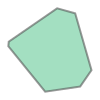

[Segment2D(Point2D(3.04868990714392, 5.67080621247625), Point2D(3.33412421224382, 5.31889828106301)), Segment2D(Point2D(3.33412421224382, 5.31889828106301), Point2D(3.60518060601731, 5.35856054554315)), Segment2D(Point2D(3.60518060601731, 5.35856054554315), Point2D(3.69278136744627, 5.48548662234834)), Segment2D(Point2D(3.56645846157367, 5.92560092394009), Point2D(3.69278136744627, 5.48548662234834)), Segment2D(Point2D(3.42670878017809, 5.96447269674418), Point2D(3.56645846157367, 5.92560092394009)), Segment2D(Point2D(3.05191244053625, 5.70621347862500), Point2D(3.42670878017809, 5.96447269674418)), Segment2D(Point2D(3.04868990714392, 5.67080621247625), Point2D(3.05191244053625, 5.70621347862500))] 

{Point2D(7.90276583445495, 2.10730457402849), Point2D(8.12855035586250, 2.00618284200735), Point2D(7.67813857987556, 2.01031304158364), Point2D(7.61758133461855, 1.31923195479590)}
------------
Point2D(7.9005934843091, 1.77847487896645)
4 {Point2D(7.90276583445495, 2.10730457402849), Point

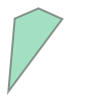

[Segment2D(Point2D(7.61758133461855, 1.31923195479590), Point2D(8.12855035586250, 2.00618284200735)), Segment2D(Point2D(7.90276583445495, 2.10730457402849), Point2D(8.12855035586250, 2.00618284200735)), Segment2D(Point2D(7.67813857987556, 2.01031304158364), Point2D(7.90276583445495, 2.10730457402849)), Segment2D(Point2D(7.61758133461855, 1.31923195479590), Point2D(7.67813857987556, 2.01031304158364))] 

{Point2D(7.37667908561960, 2.15391107571464), Point2D(7.61758133461855, 1.31923195479590), Point2D(7.12629449357705, 1.66766825850170), Point2D(7.24066585621605, 2.09925467863095), Point2D(7.67813857987556, 2.01031304158364)}
------------
Point2D(7.4187529823883, 1.8206970349586)
5 {Point2D(7.37667908561960, 2.15391107571464), Point2D(7.61758133461855, 1.31923195479590), Point2D(7.12629449357705, 1.66766825850170), Point2D(7.24066585621605, 2.09925467863095), Point2D(7.67813857987556, 2.01031304158364)}
Polygon(Point2D(7.12629449357705, 1.6676682585017), Point2D(7.61758133461855, 1.3192

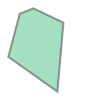

[Segment2D(Point2D(7.12629449357705, 1.66766825850170), Point2D(7.61758133461855, 1.31923195479590)), Segment2D(Point2D(7.61758133461855, 1.31923195479590), Point2D(7.67813857987556, 2.01031304158364)), Segment2D(Point2D(7.37667908561960, 2.15391107571464), Point2D(7.67813857987556, 2.01031304158364)), Segment2D(Point2D(7.24066585621605, 2.09925467863095), Point2D(7.37667908561960, 2.15391107571464)), Segment2D(Point2D(7.12629449357705, 1.66766825850170), Point2D(7.24066585621605, 2.09925467863095))] 

{Point2D(8.06281596619023, 2.64876888489592), Point2D(7.90578312138773, 2.54669692064460), Point2D(8.12855035586250, 2.00618284200735), Point2D(7.90276583445495, 2.10730457402849), Point2D(8.42168870929831, 2.14257985659627), Point2D(8.35238357649742, 2.57393938613358)}
------------
Point2D(8.14665355836267, 2.32787761314901)
6 {Point2D(8.06281596619023, 2.64876888489592), Point2D(7.90578312138773, 2.54669692064460), Point2D(8.12855035586250, 2.00618284200735), Point2D(7.90276583445495, 

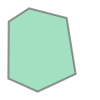

[Segment2D(Point2D(7.90276583445495, 2.10730457402849), Point2D(8.12855035586250, 2.00618284200735)), Segment2D(Point2D(8.12855035586250, 2.00618284200735), Point2D(8.42168870929831, 2.14257985659627)), Segment2D(Point2D(8.35238357649742, 2.57393938613358), Point2D(8.42168870929831, 2.14257985659627)), Segment2D(Point2D(8.06281596619023, 2.64876888489592), Point2D(8.35238357649742, 2.57393938613358)), Segment2D(Point2D(7.90578312138773, 2.54669692064460), Point2D(8.06281596619023, 2.64876888489592)), Segment2D(Point2D(7.90276583445495, 2.10730457402849), Point2D(7.90578312138773, 2.54669692064460))] 

{Point2D(7.90578312138773, 2.54669692064460), Point2D(7.37667908561960, 2.15391107571464), Point2D(7.52250989154836, 2.65022512530594), Point2D(7.90276583445495, 2.10730457402849), Point2D(7.67813857987556, 2.01031304158364), Point2D(7.46430012200713, 2.61435466433027)}
------------
Point2D(7.66193029742562, 2.33120618537496)
6 {Point2D(7.90578312138773, 2.54669692064460), Point2D(7.37667

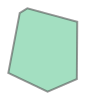

[Segment2D(Point2D(7.37667908561960, 2.15391107571464), Point2D(7.67813857987556, 2.01031304158364)), Segment2D(Point2D(7.67813857987556, 2.01031304158364), Point2D(7.90276583445495, 2.10730457402849)), Segment2D(Point2D(7.90276583445495, 2.10730457402849), Point2D(7.90578312138773, 2.54669692064460)), Segment2D(Point2D(7.52250989154836, 2.65022512530594), Point2D(7.90578312138773, 2.54669692064460)), Segment2D(Point2D(7.46430012200713, 2.61435466433027), Point2D(7.52250989154836, 2.65022512530594)), Segment2D(Point2D(7.37667908561960, 2.15391107571464), Point2D(7.46430012200713, 2.61435466433027))] 

{Point2D(7.68980423362712, 5.53936660373808), Point2D(7.88406983632220, 5.23738996588779), Point2D(8.02185935799000, 5.90278574883357), Point2D(7.99849905237405, 5.21390293796802), Point2D(8.36229078761664, 5.56050324190048), Point2D(8.35693674086479, 5.50522483867919), Point2D(7.97391346155168, 5.90073166847212)}
------------
Point2D(8.01178630728114, 5.55149183065013)
7 {Point2D(7.68980

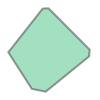

[Segment2D(Point2D(7.68980423362712, 5.53936660373808), Point2D(7.88406983632220, 5.23738996588779)), Segment2D(Point2D(7.88406983632220, 5.23738996588779), Point2D(7.99849905237405, 5.21390293796802)), Segment2D(Point2D(7.99849905237405, 5.21390293796802), Point2D(8.35693674086479, 5.50522483867919)), Segment2D(Point2D(8.35693674086479, 5.50522483867919), Point2D(8.36229078761664, 5.56050324190048)), Segment2D(Point2D(8.02185935799000, 5.90278574883357), Point2D(8.36229078761664, 5.56050324190048)), Segment2D(Point2D(7.97391346155168, 5.90073166847212), Point2D(8.02185935799000, 5.90278574883357)), Segment2D(Point2D(7.68980423362712, 5.53936660373808), Point2D(7.97391346155168, 5.90073166847212))] 

{Point2D(8.66871862502640, 5.14914668327557), Point2D(8.68365806772316, 5.81013832916239), Point2D(9.02933404176359, 5.53682869816001), Point2D(8.36229078761664, 5.56050324190048), Point2D(8.35693674086479, 5.50522483867919), Point2D(8.97264810881357, 5.30672154990930)}
------------
Point2

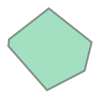

[Segment2D(Point2D(8.35693674086479, 5.50522483867919), Point2D(8.66871862502640, 5.14914668327557)), Segment2D(Point2D(8.66871862502640, 5.14914668327557), Point2D(8.97264810881357, 5.30672154990930)), Segment2D(Point2D(8.97264810881357, 5.30672154990930), Point2D(9.02933404176359, 5.53682869816001)), Segment2D(Point2D(8.68365806772316, 5.81013832916239), Point2D(9.02933404176359, 5.53682869816001)), Segment2D(Point2D(8.36229078761664, 5.56050324190048), Point2D(8.68365806772316, 5.81013832916239)), Segment2D(Point2D(8.35693674086479, 5.50522483867919), Point2D(8.36229078761664, 5.56050324190048))] 

{Point2D(8.12855035586250, 2.00618284200735), Point2D(0, 5.53676573052484), Point2D(8.42168870929831, 2.14257985659627)}
------------
Point2D(8.38629925870768, 1.81284180962479)
3 {Point2D(8.12855035586250, 2.00618284200735), Point2D(0, 5.53676573052484), Point2D(8.42168870929831, 2.14257985659627)}
Triangle(Point2D(0, 5.53676573052484), Point2D(8.1285503558625, 2.00618284200735), Point2D

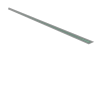

[Segment2D(Point2D(0, 5.53676573052484), Point2D(8.12855035586250, 2.00618284200735)), Segment2D(Point2D(8.12855035586250, 2.00618284200735), Point2D(8.42168870929831, 2.14257985659627)), Segment2D(Point2D(0, 5.53676573052484), Point2D(8.42168870929831, 2.14257985659627))] 

{Point2D(8.79214078459704, 2.68251155602988), Point2D(8.58007237451253, 2.73064172004104), Point2D(0, 5.53676573052484), Point2D(8.42168870929831, 2.14257985659627), Point2D(8.35238357649742, 2.57393938613358)}
------------
Point2D(8.62483773186571, 2.40470590921902)
5 {Point2D(8.79214078459704, 2.68251155602988), Point2D(8.58007237451253, 2.73064172004104), Point2D(0, 5.53676573052484), Point2D(8.42168870929831, 2.14257985659627), Point2D(8.35238357649742, 2.57393938613358)}
Triangle(Point2D(0, 5.53676573052484), Point2D(8.42168870929831, 2.14257985659627), Point2D(8.79214078459704, 2.68251155602988))


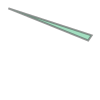

[Segment2D(Point2D(0, 5.53676573052484), Point2D(8.42168870929831, 2.14257985659627)), Segment2D(Point2D(8.42168870929831, 2.14257985659627), Point2D(8.79214078459704, 2.68251155602988)), Segment2D(Point2D(0, 5.53676573052484), Point2D(8.79214078459704, 2.68251155602988))] 

{Point2D(7.02330674694674, 6.94849969756102), Point2D(7.08072001424244, 7.41357762508729), Point2D(6.63695571196292, 7.47880066648412), Point2D(6.53572122032281, 7.39237588000738), Point2D(6.58793733284493, 6.95375371290407), Point2D(6.83739946996980, 6.85826697692081)}
------------
Point2D(6.8037505903582, 7.18818428713148)
6 {Point2D(7.02330674694674, 6.94849969756102), Point2D(7.08072001424244, 7.41357762508729), Point2D(6.63695571196292, 7.47880066648412), Point2D(6.53572122032281, 7.39237588000738), Point2D(6.58793733284493, 6.95375371290407), Point2D(6.83739946996980, 6.85826697692081)}
Polygon(Point2D(6.53572122032281, 7.39237588000738), Point2D(6.58793733284493, 6.95375371290407), Point2D(6.8373994699698, 6

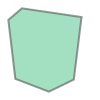

[Segment2D(Point2D(6.53572122032281, 7.39237588000738), Point2D(6.58793733284493, 6.95375371290407)), Segment2D(Point2D(6.58793733284493, 6.95375371290407), Point2D(6.83739946996980, 6.85826697692081)), Segment2D(Point2D(6.83739946996980, 6.85826697692081), Point2D(7.02330674694674, 6.94849969756102)), Segment2D(Point2D(7.02330674694674, 6.94849969756102), Point2D(7.08072001424244, 7.41357762508729)), Segment2D(Point2D(6.63695571196292, 7.47880066648412), Point2D(7.08072001424244, 7.41357762508729)), Segment2D(Point2D(6.53572122032281, 7.39237588000738), Point2D(6.63695571196292, 7.47880066648412))] 

{Point2D(6.83057918991127, 6.41356571652746), Point2D(6.58793733284493, 6.95375371290407), Point2D(6.41842421567064, 6.33068268895900), Point2D(6.83739946996980, 6.85826697692081), Point2D(6.28429324293519, 6.78905511160647)}
------------
Point2D(6.5920607621426, 6.63513787277381)
5 {Point2D(6.83057918991127, 6.41356571652746), Point2D(6.58793733284493, 6.95375371290407), Point2D(6.418424

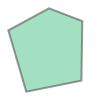

[Segment2D(Point2D(6.28429324293519, 6.78905511160647), Point2D(6.41842421567064, 6.33068268895900)), Segment2D(Point2D(6.41842421567064, 6.33068268895900), Point2D(6.83057918991127, 6.41356571652746)), Segment2D(Point2D(6.83057918991127, 6.41356571652746), Point2D(6.83739946996980, 6.85826697692081)), Segment2D(Point2D(6.58793733284493, 6.95375371290407), Point2D(6.83739946996980, 6.85826697692081)), Segment2D(Point2D(6.28429324293519, 6.78905511160647), Point2D(6.58793733284493, 6.95375371290407))] 

{Point2D(7.25375157131920, 6.36272325042821), Point2D(6.83057918991127, 6.41356571652746), Point2D(7.02330674694674, 6.94849969756102), Point2D(7.37595950159276, 6.79415414529816), Point2D(6.83739946996980, 6.85826697692081), Point2D(6.97054468527137, 6.30955101680911)}
------------
Point2D(7.07578024041001, 6.62771917936009)
6 {Point2D(7.25375157131920, 6.36272325042821), Point2D(6.83057918991127, 6.41356571652746), Point2D(7.02330674694674, 6.94849969756102), Point2D(7.37595950159276, 

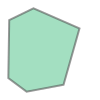

[Segment2D(Point2D(6.83057918991127, 6.41356571652746), Point2D(6.97054468527137, 6.30955101680911)), Segment2D(Point2D(6.97054468527137, 6.30955101680911), Point2D(7.25375157131920, 6.36272325042821)), Segment2D(Point2D(7.25375157131920, 6.36272325042821), Point2D(7.37595950159276, 6.79415414529816)), Segment2D(Point2D(7.02330674694674, 6.94849969756102), Point2D(7.37595950159276, 6.79415414529816)), Segment2D(Point2D(6.83739946996980, 6.85826697692081), Point2D(7.02330674694674, 6.94849969756102)), Segment2D(Point2D(6.83057918991127, 6.41356571652746), Point2D(6.83739946996980, 6.85826697692081))] 

{Point2D(7.61213781442755, 7.25843565955756), Point2D(7.02330674694674, 6.94849969756102), Point2D(7.37595950159276, 6.79415414529816), Point2D(7.08072001424244, 7.41357762508729), Point2D(7.09867163060970, 7.42636494374012), Point2D(7.45971962685374, 6.82721701938831), Point2D(7.57801848606664, 7.32708980072148)}
------------
Point2D(7.29456066668857, 7.12759441942123)
7 {Point2D(7.61213

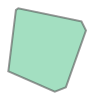

[Segment2D(Point2D(7.02330674694674, 6.94849969756102), Point2D(7.37595950159276, 6.79415414529816)), Segment2D(Point2D(7.37595950159276, 6.79415414529816), Point2D(7.45971962685374, 6.82721701938831)), Segment2D(Point2D(7.45971962685374, 6.82721701938831), Point2D(7.61213781442755, 7.25843565955756)), Segment2D(Point2D(7.57801848606664, 7.32708980072148), Point2D(7.61213781442755, 7.25843565955756)), Segment2D(Point2D(7.09867163060970, 7.42636494374012), Point2D(7.57801848606664, 7.32708980072148)), Segment2D(Point2D(7.08072001424244, 7.41357762508729), Point2D(7.09867163060970, 7.42636494374012)), Segment2D(Point2D(7.02330674694674, 6.94849969756102), Point2D(7.08072001424244, 7.41357762508729))] 

{Point2D(6.53572122032281, 7.39237588000738), Point2D(6.58793733284493, 6.95375371290407), Point2D(6.19424131212414, 7.42478979576327), Point2D(6.18738080063735, 6.82175167344487), Point2D(6.01135457016447, 7.24638685374220), Point2D(6.28429324293519, 6.78905511160647)}
------------
Point2

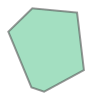

[Segment2D(Point2D(6.01135457016447, 7.24638685374220), Point2D(6.18738080063735, 6.82175167344487)), Segment2D(Point2D(6.18738080063735, 6.82175167344487), Point2D(6.28429324293519, 6.78905511160647)), Segment2D(Point2D(6.28429324293519, 6.78905511160647), Point2D(6.58793733284493, 6.95375371290407)), Segment2D(Point2D(6.53572122032281, 7.39237588000738), Point2D(6.58793733284493, 6.95375371290407)), Segment2D(Point2D(6.19424131212414, 7.42478979576327), Point2D(6.53572122032281, 7.39237588000738)), Segment2D(Point2D(6.01135457016447, 7.24638685374220), Point2D(6.19424131212414, 7.42478979576327))] 

{Point2D(6.11193993730836, 7.91580698278131), Point2D(6.63695571196292, 7.47880066648412), Point2D(6.07507968637983, 7.86389006850748), Point2D(6.53572122032281, 7.39237588000738), Point2D(6.19424131212414, 7.42478979576327), Point2D(6.61850463682770, 7.94357748216410), Point2D(6.58750612081824, 7.97218803494825)}
------------
Point2D(6.37610018701116, 7.68911663475347)
7 {Point2D(6.11193

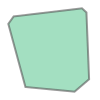

[Segment2D(Point2D(6.07507968637983, 7.86389006850748), Point2D(6.19424131212414, 7.42478979576327)), Segment2D(Point2D(6.19424131212414, 7.42478979576327), Point2D(6.53572122032281, 7.39237588000738)), Segment2D(Point2D(6.53572122032281, 7.39237588000738), Point2D(6.63695571196292, 7.47880066648412)), Segment2D(Point2D(6.61850463682770, 7.94357748216410), Point2D(6.63695571196292, 7.47880066648412)), Segment2D(Point2D(6.58750612081824, 7.97218803494825), Point2D(6.61850463682770, 7.94357748216410)), Segment2D(Point2D(6.11193993730836, 7.91580698278131), Point2D(6.58750612081824, 7.97218803494825)), Segment2D(Point2D(6.07507968637983, 7.86389006850748), Point2D(6.11193993730836, 7.91580698278131))] 

{Point2D(6.63695571196292, 7.47880066648412), Point2D(7.08072001424244, 7.41357762508729), Point2D(7.09606358240080, 7.97008854743192), Point2D(7.09867163060970, 7.42636494374012), Point2D(6.61850463682770, 7.94357748216410), Point2D(7.17284307941195, 7.87013776750362)}
------------
Point2

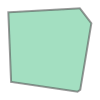

[Segment2D(Point2D(6.61850463682770, 7.94357748216410), Point2D(6.63695571196292, 7.47880066648412)), Segment2D(Point2D(6.63695571196292, 7.47880066648412), Point2D(7.08072001424244, 7.41357762508729)), Segment2D(Point2D(7.08072001424244, 7.41357762508729), Point2D(7.09867163060970, 7.42636494374012)), Segment2D(Point2D(7.09867163060970, 7.42636494374012), Point2D(7.17284307941195, 7.87013776750362)), Segment2D(Point2D(7.09606358240080, 7.97008854743192), Point2D(7.17284307941195, 7.87013776750362)), Segment2D(Point2D(6.61850463682770, 7.94357748216410), Point2D(7.09606358240080, 7.97008854743192))] 

{Point2D(7.71422772457633, 7.69310646553376), Point2D(7.62409706415567, 7.86394477140536), Point2D(7.09867163060970, 7.42636494374012), Point2D(7.57801848606664, 7.32708980072148), Point2D(7.17284307941195, 7.87013776750362)}
------------
Point2D(7.39711142580944, 7.62275748254653)
5 {Point2D(7.71422772457633, 7.69310646553376), Point2D(7.62409706415567, 7.86394477140536), Point2D(7.09867

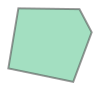

[Segment2D(Point2D(7.09867163060970, 7.42636494374012), Point2D(7.57801848606664, 7.32708980072148)), Segment2D(Point2D(7.57801848606664, 7.32708980072148), Point2D(7.71422772457633, 7.69310646553376)), Segment2D(Point2D(7.62409706415567, 7.86394477140536), Point2D(7.71422772457633, 7.69310646553376)), Segment2D(Point2D(7.17284307941195, 7.87013776750362), Point2D(7.62409706415567, 7.86394477140536)), Segment2D(Point2D(7.09867163060970, 7.42636494374012), Point2D(7.17284307941195, 7.87013776750362))] 

{Point2D(7.61213781442755, 7.25843565955756), Point2D(8.22894569662154, 7.41678269429984), Point2D(8.15115703346880, 7.65407341796199), Point2D(7.57801848606664, 7.32708980072148), Point2D(8.06121890248817, 7.13446980068400), Point2D(7.71422772457633, 7.69310646553376)}
------------
Point2D(7.90820460718934, 7.43255954967658)
6 {Point2D(7.61213781442755, 7.25843565955756), Point2D(8.22894569662154, 7.41678269429984), Point2D(8.15115703346880, 7.65407341796199), Point2D(7.57801848606664, 

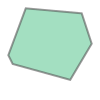

[Segment2D(Point2D(7.57801848606664, 7.32708980072148), Point2D(7.61213781442755, 7.25843565955756)), Segment2D(Point2D(7.61213781442755, 7.25843565955756), Point2D(8.06121890248817, 7.13446980068400)), Segment2D(Point2D(8.06121890248817, 7.13446980068400), Point2D(8.22894569662154, 7.41678269429984)), Segment2D(Point2D(8.15115703346880, 7.65407341796199), Point2D(8.22894569662154, 7.41678269429984)), Segment2D(Point2D(7.71422772457633, 7.69310646553376), Point2D(8.15115703346880, 7.65407341796199)), Segment2D(Point2D(7.57801848606664, 7.32708980072148), Point2D(7.71422772457633, 7.69310646553376))] 

{Point2D(8.15925036341079, 8.17398166895493), Point2D(7.62409706415567, 7.86394477140536), Point2D(8.15115703346880, 7.65407341796199), Point2D(8.26997575692061, 7.86570175194752), Point2D(7.72322401438395, 8.14066490395830), Point2D(7.71422772457633, 7.69310646553376)}
------------
Point2D(7.95131626981832, 7.915144183199)
6 {Point2D(8.15925036341079, 8.17398166895493), Point2D(7.6240970

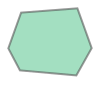

[Segment2D(Point2D(7.62409706415567, 7.86394477140536), Point2D(7.71422772457633, 7.69310646553376)), Segment2D(Point2D(7.71422772457633, 7.69310646553376), Point2D(8.15115703346880, 7.65407341796199)), Segment2D(Point2D(8.15115703346880, 7.65407341796199), Point2D(8.26997575692061, 7.86570175194752)), Segment2D(Point2D(8.15925036341079, 8.17398166895493), Point2D(8.26997575692061, 7.86570175194752)), Segment2D(Point2D(7.72322401438395, 8.14066490395830), Point2D(8.15925036341079, 8.17398166895493)), Segment2D(Point2D(7.62409706415567, 7.86394477140536), Point2D(7.72322401438395, 8.14066490395830))] 

{Point2D(7.15525443652267, 8.31601682856473), Point2D(7.62409706415567, 7.86394477140536), Point2D(7.09606358240080, 7.97008854743192), Point2D(7.58551430324661, 8.38569900221896), Point2D(7.72322401438395, 8.14066490395830), Point2D(7.17284307941195, 7.87013776750362)}
------------
Point2D(7.40381576153139, 8.11127033829376)
6 {Point2D(7.15525443652267, 8.31601682856473), Point2D(7.62409

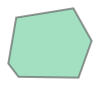

[Segment2D(Point2D(7.09606358240080, 7.97008854743192), Point2D(7.17284307941195, 7.87013776750362)), Segment2D(Point2D(7.17284307941195, 7.87013776750362), Point2D(7.62409706415567, 7.86394477140536)), Segment2D(Point2D(7.62409706415567, 7.86394477140536), Point2D(7.72322401438395, 8.14066490395830)), Segment2D(Point2D(7.58551430324661, 8.38569900221896), Point2D(7.72322401438395, 8.14066490395830)), Segment2D(Point2D(7.15525443652267, 8.31601682856473), Point2D(7.58551430324661, 8.38569900221896)), Segment2D(Point2D(7.09606358240080, 7.97008854743192), Point2D(7.15525443652267, 8.31601682856473))] 

{Point2D(5.93517372743046, 6.22992352635995), Point2D(5.77451772268258, 6.44891810871790), Point2D(6.38663033802939, 6.28100994848631), Point2D(6.41842421567064, 6.33068268895900), Point2D(6.18738080063735, 6.82175167344487), Point2D(5.80408869027868, 6.62160433333864), Point2D(6.28429324293519, 6.78905511160647)}
------------
Point2D(6.10805092332149, 6.49350476552963)
7 {Point2D(5.93517

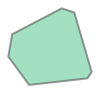

[Segment2D(Point2D(5.77451772268258, 6.44891810871790), Point2D(5.93517372743046, 6.22992352635995)), Segment2D(Point2D(5.93517372743046, 6.22992352635995), Point2D(6.38663033802939, 6.28100994848631)), Segment2D(Point2D(6.38663033802939, 6.28100994848631), Point2D(6.41842421567064, 6.33068268895900)), Segment2D(Point2D(6.28429324293519, 6.78905511160647), Point2D(6.41842421567064, 6.33068268895900)), Segment2D(Point2D(6.18738080063735, 6.82175167344487), Point2D(6.28429324293519, 6.78905511160647)), Segment2D(Point2D(5.80408869027868, 6.62160433333864), Point2D(6.18738080063735, 6.82175167344487)), Segment2D(Point2D(5.77451772268258, 6.44891810871790), Point2D(5.80408869027868, 6.62160433333864))] 

{Point2D(5.51168471372035, 6.96146355522924), Point2D(5.79880861287113, 7.25707984281365), Point2D(6.01135457016447, 7.24638685374220), Point2D(6.18738080063735, 6.82175167344487), Point2D(5.80408869027868, 6.62160433333864)}
------------
Point2D(5.87268328641967, 6.94424549588534)
5 {Poin

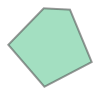

[Segment2D(Point2D(5.51168471372035, 6.96146355522924), Point2D(5.80408869027868, 6.62160433333864)), Segment2D(Point2D(5.80408869027868, 6.62160433333864), Point2D(6.18738080063735, 6.82175167344487)), Segment2D(Point2D(6.01135457016447, 7.24638685374220), Point2D(6.18738080063735, 6.82175167344487)), Segment2D(Point2D(5.79880861287113, 7.25707984281365), Point2D(6.01135457016447, 7.24638685374220)), Segment2D(Point2D(5.51168471372035, 6.96146355522924), Point2D(5.79880861287113, 7.25707984281365))] 

{Point2D(5.93517372743046, 6.22992352635995), Point2D(6.46225426026361, 5.89802108149043), Point2D(6.38663033802939, 6.28100994848631), Point2D(6.29836212130261, 5.70097455558127), Point2D(5.84324617869504, 5.86176669752298)}
------------
Point2D(6.1625785493612, 6.01163783863852)
5 {Point2D(5.93517372743046, 6.22992352635995), Point2D(6.46225426026361, 5.89802108149043), Point2D(6.38663033802939, 6.28100994848631), Point2D(6.29836212130261, 5.70097455558127), Point2D(5.84324617869504, 5

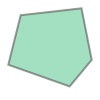

[Segment2D(Point2D(5.84324617869504, 5.86176669752298), Point2D(6.29836212130261, 5.70097455558127)), Segment2D(Point2D(6.29836212130261, 5.70097455558127), Point2D(6.46225426026361, 5.89802108149043)), Segment2D(Point2D(6.38663033802939, 6.28100994848631), Point2D(6.46225426026361, 5.89802108149043)), Segment2D(Point2D(5.93517372743046, 6.22992352635995), Point2D(6.38663033802939, 6.28100994848631)), Segment2D(Point2D(5.84324617869504, 5.86176669752298), Point2D(5.93517372743046, 6.22992352635995))] 

{Point2D(5.93517372743046, 6.22992352635995), Point2D(5.44617952344258, 5.89512272779965), Point2D(5.33138035429661, 6.29691520615626), Point2D(5.78643735377836, 5.82711775748202), Point2D(5.84324617869504, 5.86176669752298), Point2D(5.77451772268258, 6.44891810871790)}
------------
Point2D(5.63184865419184, 6.1441593470882)
6 {Point2D(5.93517372743046, 6.22992352635995), Point2D(5.44617952344258, 5.89512272779965), Point2D(5.33138035429661, 6.29691520615626), Point2D(5.78643735377836, 5

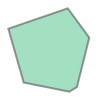

[Segment2D(Point2D(5.33138035429661, 6.29691520615626), Point2D(5.44617952344258, 5.89512272779965)), Segment2D(Point2D(5.44617952344258, 5.89512272779965), Point2D(5.78643735377836, 5.82711775748202)), Segment2D(Point2D(5.78643735377836, 5.82711775748202), Point2D(5.84324617869504, 5.86176669752298)), Segment2D(Point2D(5.84324617869504, 5.86176669752298), Point2D(5.93517372743046, 6.22992352635995)), Segment2D(Point2D(5.77451772268258, 6.44891810871790), Point2D(5.93517372743046, 6.22992352635995)), Segment2D(Point2D(5.33138035429661, 6.29691520615626), Point2D(5.77451772268258, 6.44891810871790))] 

{Point2D(6.83057918991127, 6.41356571652746), Point2D(6.46225426026361, 5.89802108149043), Point2D(6.90679881931346, 5.83697863534760), Point2D(6.38663033802939, 6.28100994848631), Point2D(6.41842421567064, 6.33068268895900), Point2D(6.97054468527137, 6.30955101680911)}
------------
Point2D(6.69625342848085, 6.11701580399158)
6 {Point2D(6.83057918991127, 6.41356571652746), Point2D(6.46225

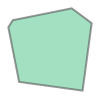

[Segment2D(Point2D(6.38663033802939, 6.28100994848631), Point2D(6.46225426026361, 5.89802108149043)), Segment2D(Point2D(6.46225426026361, 5.89802108149043), Point2D(6.90679881931346, 5.83697863534760)), Segment2D(Point2D(6.90679881931346, 5.83697863534760), Point2D(6.97054468527137, 6.30955101680911)), Segment2D(Point2D(6.83057918991127, 6.41356571652746), Point2D(6.97054468527137, 6.30955101680911)), Segment2D(Point2D(6.41842421567064, 6.33068268895900), Point2D(6.83057918991127, 6.41356571652746)), Segment2D(Point2D(6.38663033802939, 6.28100994848631), Point2D(6.41842421567064, 6.33068268895900))] 

{Point2D(5.51168471372035, 6.96146355522924), Point2D(5.16133097438619, 6.64732235521705), Point2D(5.33138035429661, 6.29691520615626), Point2D(5.50177438293170, 6.96158926457279), Point2D(5.80408869027868, 6.62160433333864), Point2D(5.23970606767036, 6.34601539510889), Point2D(5.77451772268258, 6.44891810871790)}
------------
Point2D(5.47482310310408, 6.60193935198099)
7 {Point2D(5.51168

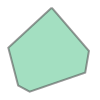

[Segment2D(Point2D(5.16133097438619, 6.64732235521705), Point2D(5.23970606767036, 6.34601539510889)), Segment2D(Point2D(5.23970606767036, 6.34601539510889), Point2D(5.33138035429661, 6.29691520615626)), Segment2D(Point2D(5.33138035429661, 6.29691520615626), Point2D(5.77451772268258, 6.44891810871790)), Segment2D(Point2D(5.77451772268258, 6.44891810871790), Point2D(5.80408869027868, 6.62160433333864)), Segment2D(Point2D(5.51168471372035, 6.96146355522924), Point2D(5.80408869027868, 6.62160433333864)), Segment2D(Point2D(5.50177438293170, 6.96158926457279), Point2D(5.51168471372035, 6.96146355522924)), Segment2D(Point2D(5.16133097438619, 6.64732235521705), Point2D(5.50177438293170, 6.96158926457279))] 

{Point2D(8.78011692530016, 7.49557689874600), Point2D(8.22894569662154, 7.41678269429984), Point2D(8.71433261771528, 7.85999622781573), Point2D(8.15115703346880, 7.65407341796199), Point2D(8.65828883438023, 7.34301552138169), Point2D(8.26997575692061, 7.86570175194752)}
------------
Point2

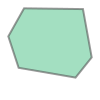

[Segment2D(Point2D(8.15115703346880, 7.65407341796199), Point2D(8.22894569662154, 7.41678269429984)), Segment2D(Point2D(8.22894569662154, 7.41678269429984), Point2D(8.65828883438023, 7.34301552138169)), Segment2D(Point2D(8.65828883438023, 7.34301552138169), Point2D(8.78011692530016, 7.49557689874600)), Segment2D(Point2D(8.71433261771528, 7.85999622781573), Point2D(8.78011692530016, 7.49557689874600)), Segment2D(Point2D(8.26997575692061, 7.86570175194752), Point2D(8.71433261771528, 7.85999622781573)), Segment2D(Point2D(8.15115703346880, 7.65407341796199), Point2D(8.26997575692061, 7.86570175194752))] 

{Point2D(8.15925036341079, 8.17398166895493), Point2D(8.71433261771528, 7.85999622781573), Point2D(8.26997575692061, 7.86570175194752)}
------------
Point2D(8.48435442474805, 8.10659635443766)
3 {Point2D(8.15925036341079, 8.17398166895493), Point2D(8.71433261771528, 7.85999622781573), Point2D(8.26997575692061, 7.86570175194752)}
Triangle(Point2D(8.15925036341079, 8.17398166895493), Point2

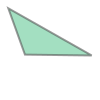

[Segment2D(Point2D(8.15925036341079, 8.17398166895493), Point2D(8.26997575692061, 7.86570175194752)), Segment2D(Point2D(8.26997575692061, 7.86570175194752), Point2D(8.71433261771528, 7.85999622781573)), Segment2D(Point2D(8.15925036341079, 8.17398166895493), Point2D(8.71433261771528, 7.85999622781573))] 

{Point2D(7.61213781442755, 7.25843565955756), Point2D(7.88202199522164, 6.61455023115043), Point2D(7.45971962685374, 6.82721701938831), Point2D(8.06121890248817, 7.13446980068400), Point2D(8.10518367134016, 6.98774869513833)}
------------
Point2D(7.77695386757509, 6.95708811350599)
5 {Point2D(7.61213781442755, 7.25843565955756), Point2D(7.88202199522164, 6.61455023115043), Point2D(7.45971962685374, 6.82721701938831), Point2D(8.06121890248817, 7.13446980068400), Point2D(8.10518367134016, 6.98774869513833)}
Polygon(Point2D(7.45971962685374, 6.82721701938831), Point2D(7.88202199522164, 6.61455023115043), Point2D(8.10518367134016, 6.98774869513833), Point2D(8.06121890248817, 7.134469800684

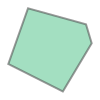

[Segment2D(Point2D(7.45971962685374, 6.82721701938831), Point2D(7.88202199522164, 6.61455023115043)), Segment2D(Point2D(7.88202199522164, 6.61455023115043), Point2D(8.10518367134016, 6.98774869513833)), Segment2D(Point2D(8.06121890248817, 7.13446980068400), Point2D(8.10518367134016, 6.98774869513833)), Segment2D(Point2D(7.61213781442755, 7.25843565955756), Point2D(8.06121890248817, 7.13446980068400)), Segment2D(Point2D(7.45971962685374, 6.82721701938831), Point2D(7.61213781442755, 7.25843565955756))] 

{Point2D(7.72322401438395, 8.14066490395830), Point2D(8.15925036341079, 8.17398166895493), Point2D(7.58551430324661, 8.38569900221896)}
------------
Point2D(7.9144042854591, 8.39822223045585)
3 {Point2D(7.72322401438395, 8.14066490395830), Point2D(8.15925036341079, 8.17398166895493), Point2D(7.58551430324661, 8.38569900221896)}
Triangle(Point2D(7.58551430324661, 8.38569900221896), Point2D(7.72322401438395, 8.1406649039583), Point2D(8.15925036341079, 8.17398166895493))


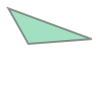

[Segment2D(Point2D(7.58551430324661, 8.38569900221896), Point2D(7.72322401438395, 8.14066490395830)), Segment2D(Point2D(7.72322401438395, 8.14066490395830), Point2D(8.15925036341079, 8.17398166895493)), Segment2D(Point2D(7.58551430324661, 8.38569900221896), Point2D(8.15925036341079, 8.17398166895493))] 

{Point2D(7.25375157131920, 6.36272325042821), Point2D(7.49847283156980, 6.16407616063067), Point2D(6.90679881931346, 5.83697863534760), Point2D(7.31968982189145, 5.76149924386126), Point2D(6.93585404427303, 5.79919705906502), Point2D(6.97054468527137, 6.30955101680911)}
------------
Point2D(7.18401813007886, 6.05122062740741)
6 {Point2D(7.25375157131920, 6.36272325042821), Point2D(7.49847283156980, 6.16407616063067), Point2D(6.90679881931346, 5.83697863534760), Point2D(7.31968982189145, 5.76149924386126), Point2D(6.93585404427303, 5.79919705906502), Point2D(6.97054468527137, 6.30955101680911)}
Polygon(Point2D(6.90679881931346, 5.8369786353476), Point2D(6.93585404427303, 5.7991970590650

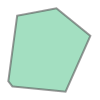

[Segment2D(Point2D(6.90679881931346, 5.83697863534760), Point2D(6.93585404427303, 5.79919705906502)), Segment2D(Point2D(6.93585404427303, 5.79919705906502), Point2D(7.31968982189145, 5.76149924386126)), Segment2D(Point2D(7.31968982189145, 5.76149924386126), Point2D(7.49847283156980, 6.16407616063067)), Segment2D(Point2D(7.25375157131920, 6.36272325042821), Point2D(7.49847283156980, 6.16407616063067)), Segment2D(Point2D(6.97054468527137, 6.30955101680911), Point2D(7.25375157131920, 6.36272325042821)), Segment2D(Point2D(6.90679881931346, 5.83697863534760), Point2D(6.97054468527137, 6.30955101680911))] 

{Point2D(6.46225426026361, 5.89802108149043), Point2D(6.71229777664019, 5.29486310061524), Point2D(6.90679881931346, 5.83697863534760), Point2D(6.82885178721855, 5.35315395258872), Point2D(6.32045050642983, 5.52565835033268), Point2D(6.29836212130261, 5.70097455558127), Point2D(6.93585404427303, 5.79919705906502)}
------------
Point2D(6.62856316939069, 5.62405822642669)
7 {Point2D(6.46225

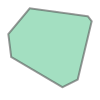

[Segment2D(Point2D(6.29836212130261, 5.70097455558127), Point2D(6.32045050642983, 5.52565835033268)), Segment2D(Point2D(6.32045050642983, 5.52565835033268), Point2D(6.71229777664019, 5.29486310061524)), Segment2D(Point2D(6.71229777664019, 5.29486310061524), Point2D(6.82885178721855, 5.35315395258872)), Segment2D(Point2D(6.82885178721855, 5.35315395258872), Point2D(6.93585404427303, 5.79919705906502)), Segment2D(Point2D(6.90679881931346, 5.83697863534760), Point2D(6.93585404427303, 5.79919705906502)), Segment2D(Point2D(6.46225426026361, 5.89802108149043), Point2D(6.90679881931346, 5.83697863534760)), Segment2D(Point2D(6.29836212130261, 5.70097455558127), Point2D(6.46225426026361, 5.89802108149043))] 

{Point2D(7.25375157131920, 6.36272325042821), Point2D(7.49847283156980, 6.16407616063067), Point2D(7.37595950159276, 6.79415414529816), Point2D(7.88202199522164, 6.61455023115043), Point2D(7.45971962685374, 6.82721701938831), Point2D(7.88696000773389, 6.59654919370068), Point2D(7.657939824

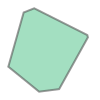

[Segment2D(Point2D(7.25375157131920, 6.36272325042821), Point2D(7.49847283156980, 6.16407616063067)), Segment2D(Point2D(7.49847283156980, 6.16407616063067), Point2D(7.65793982468672, 6.18434668365630)), Segment2D(Point2D(7.65793982468672, 6.18434668365630), Point2D(7.88696000773389, 6.59654919370068)), Segment2D(Point2D(7.88202199522164, 6.61455023115043), Point2D(7.88696000773389, 6.59654919370068)), Segment2D(Point2D(7.45971962685374, 6.82721701938831), Point2D(7.88202199522164, 6.61455023115043)), Segment2D(Point2D(7.37595950159276, 6.79415414529816), Point2D(7.45971962685374, 6.82721701938831)), Segment2D(Point2D(7.25375157131920, 6.36272325042821), Point2D(7.37595950159276, 6.79415414529816))] 

{Point2D(7.68980423362712, 5.53936660373808), Point2D(7.49847283156980, 6.16407616063067), Point2D(7.45512376008710, 5.57058684901257), Point2D(7.31968982189145, 5.76149924386126), Point2D(7.97391346155168, 5.90073166847212), Point2D(7.65793982468672, 6.18434668365630)}
------------
Point2

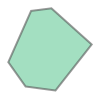

[Segment2D(Point2D(7.31968982189145, 5.76149924386126), Point2D(7.45512376008710, 5.57058684901257)), Segment2D(Point2D(7.45512376008710, 5.57058684901257), Point2D(7.68980423362712, 5.53936660373808)), Segment2D(Point2D(7.68980423362712, 5.53936660373808), Point2D(7.97391346155168, 5.90073166847212)), Segment2D(Point2D(7.65793982468672, 6.18434668365630), Point2D(7.97391346155168, 5.90073166847212)), Segment2D(Point2D(7.49847283156980, 6.16407616063067), Point2D(7.65793982468672, 6.18434668365630)), Segment2D(Point2D(7.31968982189145, 5.76149924386126), Point2D(7.49847283156980, 6.16407616063067))] 

{Point2D(0.686935141239376, 7.00416443958363), Point2D(0.893741656921755, 6.60700571734978), Point2D(0.658543573661467, 6.35849973829833)}
------------
Point2D(0.579083599976354, 6.68240844743539)
3 {Point2D(0.686935141239376, 7.00416443958363), Point2D(0.893741656921755, 6.60700571734978), Point2D(0.658543573661467, 6.35849973829833)}
Triangle(Point2D(0.658543573661467, 6.35849973829833)

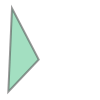

[Segment2D(Point2D(0.658543573661467, 6.35849973829833), Point2D(0.893741656921755, 6.60700571734978)), Segment2D(Point2D(0.686935141239376, 7.00416443958363), Point2D(0.893741656921755, 6.60700571734978)), Segment2D(Point2D(0.658543573661467, 6.35849973829833), Point2D(0.686935141239376, 7.00416443958363))] 

{Point2D(1.16958752202575, 7.19924440751200), Point2D(0.686935141239376, 7.00416443958363), Point2D(1.12007115824922, 6.59735554729514), Point2D(1.30898961392313, 6.78587917968632), Point2D(0.993278413586012, 7.23560202893112), Point2D(0.893741656921755, 6.60700571734978)}
------------
Point2D(1.01238571434496, 6.90803537061201)
6 {Point2D(1.16958752202575, 7.19924440751200), Point2D(0.686935141239376, 7.00416443958363), Point2D(1.12007115824922, 6.59735554729514), Point2D(1.30898961392313, 6.78587917968632), Point2D(0.993278413586012, 7.23560202893112), Point2D(0.893741656921755, 6.60700571734978)}
Polygon(Point2D(0.686935141239376, 7.00416443958363), Point2D(0.893741656921755, 

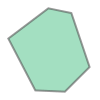

[Segment2D(Point2D(0.686935141239376, 7.00416443958363), Point2D(0.893741656921755, 6.60700571734978)), Segment2D(Point2D(0.893741656921755, 6.60700571734978), Point2D(1.12007115824922, 6.59735554729514)), Segment2D(Point2D(1.12007115824922, 6.59735554729514), Point2D(1.30898961392313, 6.78587917968632)), Segment2D(Point2D(1.16958752202575, 7.19924440751200), Point2D(1.30898961392313, 6.78587917968632)), Segment2D(Point2D(0.993278413586012, 7.23560202893112), Point2D(1.16958752202575, 7.19924440751200)), Segment2D(Point2D(0.686935141239376, 7.00416443958363), Point2D(0.993278413586012, 7.23560202893112))] 

{Point2D(0.686935141239376, 7.00416443958363), Point2D(0.993278413586012, 7.23560202893112), Point2D(0, 15/2)}
------------
Point2D(0.683401432405933, 7.34349670497845)
3 {Point2D(0.686935141239376, 7.00416443958363), Point2D(0.993278413586012, 7.23560202893112), Point2D(0, 15/2)}
Triangle(Point2D(0, 15/2), Point2D(0.686935141239376, 7.00416443958363), Point2D(0.993278413586012, 7.2

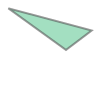

[Segment2D(Point2D(0, 15/2), Point2D(0.686935141239376, 7.00416443958363)), Segment2D(Point2D(0.686935141239376, 7.00416443958363), Point2D(0.993278413586012, 7.23560202893112)), Segment2D(Point2D(0, 15/2), Point2D(0.993278413586012, 7.23560202893112))] 

{Point2D(1.18068630181161, 4.01229415338714), Point2D(0.629792928219185, 4.14611700229444), Point2D(1.16714204353871, 3.78620221957206), Point2D(0.816865072598903, 4.25251040839243), Point2D(0.560105973768363, 3.80071434908720), Point2D(0.962032123694745, 3.61982640074183)}
------------
Point2D(0.869795997915712, 3.92773686321861)
6 {Point2D(1.18068630181161, 4.01229415338714), Point2D(0.629792928219185, 4.14611700229444), Point2D(1.16714204353871, 3.78620221957206), Point2D(0.816865072598903, 4.25251040839243), Point2D(0.560105973768363, 3.80071434908720), Point2D(0.962032123694745, 3.61982640074183)}
Polygon(Point2D(0.560105973768363, 3.8007143490872), Point2D(0.962032123694745, 3.61982640074183), Point2D(1.16714204353871, 3.7862022

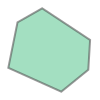

[Segment2D(Point2D(0.560105973768363, 3.80071434908720), Point2D(0.962032123694745, 3.61982640074183)), Segment2D(Point2D(0.962032123694745, 3.61982640074183), Point2D(1.16714204353871, 3.78620221957206)), Segment2D(Point2D(1.16714204353871, 3.78620221957206), Point2D(1.18068630181161, 4.01229415338714)), Segment2D(Point2D(0.816865072598903, 4.25251040839243), Point2D(1.18068630181161, 4.01229415338714)), Segment2D(Point2D(0.629792928219185, 4.14611700229444), Point2D(0.816865072598903, 4.25251040839243)), Segment2D(Point2D(0.560105973768363, 3.80071434908720), Point2D(0.629792928219185, 4.14611700229444))] 

{Point2D(3.62888619603976, 8.03468091472284), Point2D(4.04294310913442, 7.77388043378930), Point2D(4.04960025269074, 7.62441621466819), Point2D(3.82441292218505, 7.38800059424757), Point2D(3.38179525024245, 7.62877312622757), Point2D(3.40473578656704, 7.55269922171094), Point2D(3.65671890161843, 8.03964933403804)}
------------
Point2D(3.72107576962416, 7.69060454414199)
7 {Point2D

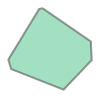

[Segment2D(Point2D(3.38179525024245, 7.62877312622757), Point2D(3.40473578656704, 7.55269922171094)), Segment2D(Point2D(3.40473578656704, 7.55269922171094), Point2D(3.82441292218505, 7.38800059424757)), Segment2D(Point2D(3.82441292218505, 7.38800059424757), Point2D(4.04960025269074, 7.62441621466819)), Segment2D(Point2D(4.04294310913442, 7.77388043378930), Point2D(4.04960025269074, 7.62441621466819)), Segment2D(Point2D(3.65671890161843, 8.03964933403804), Point2D(4.04294310913442, 7.77388043378930)), Segment2D(Point2D(3.62888619603976, 8.03468091472284), Point2D(3.65671890161843, 8.03964933403804)), Segment2D(Point2D(3.38179525024245, 7.62877312622757), Point2D(3.62888619603976, 8.03468091472284))] 

{Point2D(2.75085591132534, 7.31738430938661), Point2D(2.75682793520539, 7.30730845789962), Point2D(2.96825935780485, 7.82053540644733), Point2D(3.38179525024245, 7.62877312622757), Point2D(3.21805557468210, 7.20454821159569), Point2D(3.40473578656704, 7.55269922171094), Point2D(2.889247141

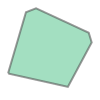

[Segment2D(Point2D(2.75085591132534, 7.31738430938661), Point2D(2.75682793520539, 7.30730845789962)), Segment2D(Point2D(2.75682793520539, 7.30730845789962), Point2D(3.21805557468210, 7.20454821159569)), Segment2D(Point2D(3.21805557468210, 7.20454821159569), Point2D(3.40473578656704, 7.55269922171094)), Segment2D(Point2D(3.38179525024245, 7.62877312622757), Point2D(3.40473578656704, 7.55269922171094)), Segment2D(Point2D(2.96825935780485, 7.82053540644733), Point2D(3.38179525024245, 7.62877312622757)), Segment2D(Point2D(2.88924714178708, 7.78987227763069), Point2D(2.96825935780485, 7.82053540644733)), Segment2D(Point2D(2.75085591132534, 7.31738430938661), Point2D(2.88924714178708, 7.78987227763069))] 

{Point2D(4.59361523564429, 6.41548218531985), Point2D(4.84752323526427, 6.12879557404769), Point2D(5.16133097438619, 6.64732235521705), Point2D(5.23970606767036, 6.34601539510889), Point2D(4.84386674884079, 6.79181056244759)}
------------
Point2D(4.90968630447719, 6.45493760567284)
5 {Poin

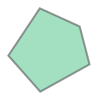

[Segment2D(Point2D(4.59361523564429, 6.41548218531985), Point2D(4.84752323526427, 6.12879557404769)), Segment2D(Point2D(4.84752323526427, 6.12879557404769), Point2D(5.23970606767036, 6.34601539510889)), Segment2D(Point2D(5.16133097438619, 6.64732235521705), Point2D(5.23970606767036, 6.34601539510889)), Segment2D(Point2D(4.84386674884079, 6.79181056244759), Point2D(5.16133097438619, 6.64732235521705)), Segment2D(Point2D(4.59361523564429, 6.41548218531985), Point2D(4.84386674884079, 6.79181056244759))] 

{Point2D(4.81866492700508, 5.94015530070511), Point2D(5.44617952344258, 5.89512272779965), Point2D(4.84752323526427, 6.12879557404769), Point2D(5.33138035429661, 6.29691520615626), Point2D(5.23970606767036, 6.34601539510889), Point2D(5.20226658720329, 5.68046607008103)}
------------
Point2D(5.15696871835941, 6.00847780745204)
6 {Point2D(4.81866492700508, 5.94015530070511), Point2D(5.44617952344258, 5.89512272779965), Point2D(4.84752323526427, 6.12879557404769), Point2D(5.33138035429661, 

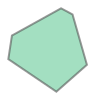

[Segment2D(Point2D(4.81866492700508, 5.94015530070511), Point2D(5.20226658720329, 5.68046607008103)), Segment2D(Point2D(5.20226658720329, 5.68046607008103), Point2D(5.44617952344258, 5.89512272779965)), Segment2D(Point2D(5.33138035429661, 6.29691520615626), Point2D(5.44617952344258, 5.89512272779965)), Segment2D(Point2D(5.23970606767036, 6.34601539510889), Point2D(5.33138035429661, 6.29691520615626)), Segment2D(Point2D(4.84752323526427, 6.12879557404769), Point2D(5.23970606767036, 6.34601539510889)), Segment2D(Point2D(4.81866492700508, 5.94015530070511), Point2D(4.84752323526427, 6.12879557404769))] 

{Point2D(4.37598277792427, 6.41247556205337), Point2D(4.81866492700508, 5.94015530070511), Point2D(4.59361523564429, 6.41548218531985), Point2D(4.84752323526427, 6.12879557404769), Point2D(4.65023006934459, 5.81873182087816), Point2D(4.18892708573241, 5.94897003989837)}
------------
Point2D(4.51625973579669, 6.10649387260927)
6 {Point2D(4.37598277792427, 6.41247556205337), Point2D(4.81866

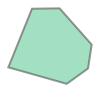

[Segment2D(Point2D(4.18892708573241, 5.94897003989837), Point2D(4.65023006934459, 5.81873182087816)), Segment2D(Point2D(4.65023006934459, 5.81873182087816), Point2D(4.81866492700508, 5.94015530070511)), Segment2D(Point2D(4.81866492700508, 5.94015530070511), Point2D(4.84752323526427, 6.12879557404769)), Segment2D(Point2D(4.59361523564429, 6.41548218531985), Point2D(4.84752323526427, 6.12879557404769)), Segment2D(Point2D(4.37598277792427, 6.41247556205337), Point2D(4.59361523564429, 6.41548218531985)), Segment2D(Point2D(4.18892708573241, 5.94897003989837), Point2D(4.37598277792427, 6.41247556205337))] 

{Point2D(4.37598277792427, 6.41247556205337), Point2D(4.80778557844537, 6.88654774432785), Point2D(4.22081362212900, 6.57212271765451), Point2D(4.59361523564429, 6.41548218531985), Point2D(4.36873713193906, 7.04279021557929), Point2D(4.30957123545019, 7.00424666090378), Point2D(4.84386674884079, 6.79181056244759)}
------------
Point2D(4.5077534524271, 6.72221562811858)
7 {Point2D(4.375982

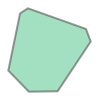

[Segment2D(Point2D(4.22081362212900, 6.57212271765451), Point2D(4.37598277792427, 6.41247556205337)), Segment2D(Point2D(4.37598277792427, 6.41247556205337), Point2D(4.59361523564429, 6.41548218531985)), Segment2D(Point2D(4.59361523564429, 6.41548218531985), Point2D(4.84386674884079, 6.79181056244759)), Segment2D(Point2D(4.80778557844537, 6.88654774432785), Point2D(4.84386674884079, 6.79181056244759)), Segment2D(Point2D(4.36873713193906, 7.04279021557929), Point2D(4.80778557844537, 6.88654774432785)), Segment2D(Point2D(4.30957123545019, 7.00424666090378), Point2D(4.36873713193906, 7.04279021557929)), Segment2D(Point2D(4.22081362212900, 6.57212271765451), Point2D(4.30957123545019, 7.00424666090378))] 

{Point2D(4.80778557844537, 6.88654774432785), Point2D(5.00291390841594, 7.26219379442159), Point2D(5.16133097438619, 6.64732235521705), Point2D(5.14686392860505, 7.30111324233505), Point2D(5.50177438293170, 6.96158926457279), Point2D(4.84386674884079, 6.79181056244759)}
------------
Point2

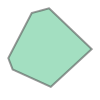

[Segment2D(Point2D(4.80778557844537, 6.88654774432785), Point2D(4.84386674884079, 6.79181056244759)), Segment2D(Point2D(4.84386674884079, 6.79181056244759), Point2D(5.16133097438619, 6.64732235521705)), Segment2D(Point2D(5.16133097438619, 6.64732235521705), Point2D(5.50177438293170, 6.96158926457279)), Segment2D(Point2D(5.14686392860505, 7.30111324233505), Point2D(5.50177438293170, 6.96158926457279)), Segment2D(Point2D(5.00291390841594, 7.26219379442159), Point2D(5.14686392860505, 7.30111324233505)), Segment2D(Point2D(4.80778557844537, 6.88654774432785), Point2D(5.00291390841594, 7.26219379442159))] 

{Point2D(5.29005931590656, 7.57470530469487), Point2D(5.51168471372035, 6.96146355522924), Point2D(5.58048249917401, 7.64034226210044), Point2D(5.79880861287113, 7.25707984281365), Point2D(5.14686392860505, 7.30111324233505), Point2D(5.50177438293170, 6.96158926457279)}
------------
Point2D(5.48395439268964, 7.32180708625769)
6 {Point2D(5.29005931590656, 7.57470530469487), Point2D(5.51168

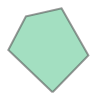

[Segment2D(Point2D(5.14686392860505, 7.30111324233505), Point2D(5.50177438293170, 6.96158926457279)), Segment2D(Point2D(5.50177438293170, 6.96158926457279), Point2D(5.51168471372035, 6.96146355522924)), Segment2D(Point2D(5.51168471372035, 6.96146355522924), Point2D(5.79880861287113, 7.25707984281365)), Segment2D(Point2D(5.58048249917401, 7.64034226210044), Point2D(5.79880861287113, 7.25707984281365)), Segment2D(Point2D(5.29005931590656, 7.57470530469487), Point2D(5.58048249917401, 7.64034226210044)), Segment2D(Point2D(5.14686392860505, 7.30111324233505), Point2D(5.29005931590656, 7.57470530469487))] 

{Point2D(1.99106912638451, 3.21416794513874), Point2D(2.48033886812775, 2.94862578451817), Point2D(2.47907076280242, 2.94801161787755), Point2D(2.28763118763262, 3.62096612465727), Point2D(2.01659878852328, 3.12510494311878), Point2D(2.62819217435663, 3.40176771834601), Point2D(2.22021960670624, 3.60662152204895)}
------------
Point2D(2.32553406384169, 3.27598377144272)
7 {Point2D(1.99106

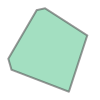

[Segment2D(Point2D(1.99106912638451, 3.21416794513874), Point2D(2.01659878852328, 3.12510494311878)), Segment2D(Point2D(2.01659878852328, 3.12510494311878), Point2D(2.47907076280242, 2.94801161787755)), Segment2D(Point2D(2.47907076280242, 2.94801161787755), Point2D(2.48033886812775, 2.94862578451817)), Segment2D(Point2D(2.48033886812775, 2.94862578451817), Point2D(2.62819217435663, 3.40176771834601)), Segment2D(Point2D(2.28763118763262, 3.62096612465727), Point2D(2.62819217435663, 3.40176771834601)), Segment2D(Point2D(2.22021960670624, 3.60662152204895), Point2D(2.28763118763262, 3.62096612465727)), Segment2D(Point2D(1.99106912638451, 3.21416794513874), Point2D(2.22021960670624, 3.60662152204895))] 

{Point2D(2.32415230775971, 2.52690154056077), Point2D(2.48033886812775, 2.94862578451817), Point2D(2.85690542215138, 2.35209776731560), Point2D(2.38788079969992, 2.40239061730454), Point2D(2.47907076280242, 2.94801161787755), Point2D(2.92595349680915, 2.80779881421590)}
------------
Point2

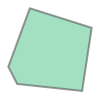

[Segment2D(Point2D(2.32415230775971, 2.52690154056077), Point2D(2.38788079969992, 2.40239061730454)), Segment2D(Point2D(2.38788079969992, 2.40239061730454), Point2D(2.85690542215138, 2.35209776731560)), Segment2D(Point2D(2.85690542215138, 2.35209776731560), Point2D(2.92595349680915, 2.80779881421590)), Segment2D(Point2D(2.48033886812775, 2.94862578451817), Point2D(2.92595349680915, 2.80779881421590)), Segment2D(Point2D(2.47907076280242, 2.94801161787755), Point2D(2.48033886812775, 2.94862578451817)), Segment2D(Point2D(2.32415230775971, 2.52690154056077), Point2D(2.47907076280242, 2.94801161787755))] 

{Point2D(2.52389474543898, 4.63627256752460), Point2D(2.71229575013568, 5.19625830902234), Point2D(3.07119866955128, 4.97583145760930), Point2D(2.86607358463140, 4.54889190679594), Point2D(2.40831419810647, 4.86996904216703)}
------------
Point2D(2.739845325485, 4.87076824203008)
5 {Point2D(2.52389474543898, 4.63627256752460), Point2D(2.71229575013568, 5.19625830902234), Point2D(3.0711986

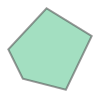

[Segment2D(Point2D(2.40831419810647, 4.86996904216703), Point2D(2.52389474543898, 4.63627256752460)), Segment2D(Point2D(2.52389474543898, 4.63627256752460), Point2D(2.86607358463140, 4.54889190679594)), Segment2D(Point2D(2.86607358463140, 4.54889190679594), Point2D(3.07119866955128, 4.97583145760930)), Segment2D(Point2D(2.71229575013568, 5.19625830902234), Point2D(3.07119866955128, 4.97583145760930)), Segment2D(Point2D(2.40831419810647, 4.86996904216703), Point2D(2.71229575013568, 5.19625830902234))] 

{Point2D(2.52389474543898, 4.63627256752460), Point2D(2.26848231179514, 4.27643235664819), Point2D(2.75547337889339, 4.03215140887046), Point2D(2.49370143807745, 4.02498445269985), Point2D(2.86607358463140, 4.54889190679594), Point2D(2.91014097906000, 4.46806423712069)}
------------
Point2D(2.60097231600996, 4.32694762107044)
6 {Point2D(2.52389474543898, 4.63627256752460), Point2D(2.26848231179514, 4.27643235664819), Point2D(2.75547337889339, 4.03215140887046), Point2D(2.49370143807745, 

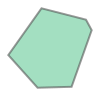

[Segment2D(Point2D(2.26848231179514, 4.27643235664819), Point2D(2.49370143807745, 4.02498445269985)), Segment2D(Point2D(2.49370143807745, 4.02498445269985), Point2D(2.75547337889339, 4.03215140887046)), Segment2D(Point2D(2.75547337889339, 4.03215140887046), Point2D(2.91014097906000, 4.46806423712069)), Segment2D(Point2D(2.86607358463140, 4.54889190679594), Point2D(2.91014097906000, 4.46806423712069)), Segment2D(Point2D(2.52389474543898, 4.63627256752460), Point2D(2.86607358463140, 4.54889190679594)), Segment2D(Point2D(2.26848231179514, 4.27643235664819), Point2D(2.52389474543898, 4.63627256752460))] 

{Point2D(3.31747738840947, 3.90695423084800), Point2D(3.32938397580589, 4.35203535766043), Point2D(2.75547337889339, 4.03215140887046), Point2D(3.32001359627671, 3.90960384102015), Point2D(2.89915317461666, 3.88529794752344), Point2D(2.91014097906000, 4.46806423712069)}
------------
Point2D(3.06122702782774, 4.16364320071655)
6 {Point2D(3.31747738840947, 3.90695423084800), Point2D(3.32938

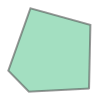

[Segment2D(Point2D(2.75547337889339, 4.03215140887046), Point2D(2.89915317461666, 3.88529794752344)), Segment2D(Point2D(2.89915317461666, 3.88529794752344), Point2D(3.31747738840947, 3.90695423084800)), Segment2D(Point2D(3.31747738840947, 3.90695423084800), Point2D(3.32001359627671, 3.90960384102015)), Segment2D(Point2D(3.32001359627671, 3.90960384102015), Point2D(3.32938397580589, 4.35203535766043)), Segment2D(Point2D(2.91014097906000, 4.46806423712069), Point2D(3.32938397580589, 4.35203535766043)), Segment2D(Point2D(2.75547337889339, 4.03215140887046), Point2D(2.91014097906000, 4.46806423712069))] 

{Point2D(3.91218656365319, 4.27118187759049), Point2D(3.32938397580589, 4.35203535766043), Point2D(3.32001359627671, 3.90960384102015), Point2D(3.47917038196160, 4.47002038849395), Point2D(3.78647897093320, 3.90560682766692), Point2D(3.93810406331196, 4.20020606911538)}
------------
Point2D(3.589324020411, 4.15245848836535)
6 {Point2D(3.91218656365319, 4.27118187759049), Point2D(3.3293839

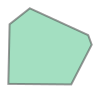

[Segment2D(Point2D(3.32001359627671, 3.90960384102015), Point2D(3.78647897093320, 3.90560682766692)), Segment2D(Point2D(3.78647897093320, 3.90560682766692), Point2D(3.93810406331196, 4.20020606911538)), Segment2D(Point2D(3.91218656365319, 4.27118187759049), Point2D(3.93810406331196, 4.20020606911538)), Segment2D(Point2D(3.47917038196160, 4.47002038849395), Point2D(3.91218656365319, 4.27118187759049)), Segment2D(Point2D(3.32938397580589, 4.35203535766043), Point2D(3.47917038196160, 4.47002038849395)), Segment2D(Point2D(3.32001359627671, 3.90960384102015), Point2D(3.32938397580589, 4.35203535766043))] 

{Point2D(3.37411438806157, 2.77388355859045), Point2D(3.56274168652547, 2.90657242536819), Point2D(3.02143005361188, 2.86524318173733), Point2D(3.47849656668747, 3.34922502578127), Point2D(3.05665163805436, 3.30825785262495), Point2D(3.35422268274939, 3.41425893325860)}
------------
Point2D(3.28215635840605, 3.08322843744091)
6 {Point2D(3.37411438806157, 2.77388355859045), Point2D(3.56274

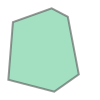

[Segment2D(Point2D(3.02143005361188, 2.86524318173733), Point2D(3.37411438806157, 2.77388355859045)), Segment2D(Point2D(3.37411438806157, 2.77388355859045), Point2D(3.56274168652547, 2.90657242536819)), Segment2D(Point2D(3.47849656668747, 3.34922502578127), Point2D(3.56274168652547, 2.90657242536819)), Segment2D(Point2D(3.35422268274939, 3.41425893325860), Point2D(3.47849656668747, 3.34922502578127)), Segment2D(Point2D(3.05665163805436, 3.30825785262495), Point2D(3.35422268274939, 3.41425893325860)), Segment2D(Point2D(3.02143005361188, 2.86524318173733), Point2D(3.05665163805436, 3.30825785262495))] 

{Point2D(3.37411438806157, 2.77388355859045), Point2D(3.40666697758394, 2.31367708280589), Point2D(3.93599679639431, 2.43836767442560), Point2D(3.83604755860855, 2.31967936417669), Point2D(3.56274168652547, 2.90657242536819), Point2D(3.79846257067914, 2.85687377575467)}
------------
Point2D(3.63418331387095, 2.58279539276775)
6 {Point2D(3.37411438806157, 2.77388355859045), Point2D(3.40666

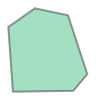

[Segment2D(Point2D(3.37411438806157, 2.77388355859045), Point2D(3.40666697758394, 2.31367708280589)), Segment2D(Point2D(3.40666697758394, 2.31367708280589), Point2D(3.83604755860855, 2.31967936417669)), Segment2D(Point2D(3.83604755860855, 2.31967936417669), Point2D(3.93599679639431, 2.43836767442560)), Segment2D(Point2D(3.79846257067914, 2.85687377575467), Point2D(3.93599679639431, 2.43836767442560)), Segment2D(Point2D(3.56274168652547, 2.90657242536819), Point2D(3.79846257067914, 2.85687377575467)), Segment2D(Point2D(3.37411438806157, 2.77388355859045), Point2D(3.56274168652547, 2.90657242536819))] 

{Point2D(3.37411438806157, 2.77388355859045), Point2D(3.40666697758394, 2.31367708280589), Point2D(3.37644584055607, 2.28339408027861), Point2D(2.89281949277667, 2.30419384122643), Point2D(3.02143005361188, 2.86524318173733), Point2D(2.85690542215138, 2.35209776731560), Point2D(2.92595349680915, 2.80779881421590)}
------------
Point2D(3.14353352856476, 2.54808940338965)
7 {Point2D(3.37411

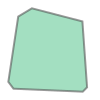

[Segment2D(Point2D(2.85690542215138, 2.35209776731560), Point2D(2.89281949277667, 2.30419384122643)), Segment2D(Point2D(2.89281949277667, 2.30419384122643), Point2D(3.37644584055607, 2.28339408027861)), Segment2D(Point2D(3.37644584055607, 2.28339408027861), Point2D(3.40666697758394, 2.31367708280589)), Segment2D(Point2D(3.37411438806157, 2.77388355859045), Point2D(3.40666697758394, 2.31367708280589)), Segment2D(Point2D(3.02143005361188, 2.86524318173733), Point2D(3.37411438806157, 2.77388355859045)), Segment2D(Point2D(2.92595349680915, 2.80779881421590), Point2D(3.02143005361188, 2.86524318173733)), Segment2D(Point2D(2.85690542215138, 2.35209776731560), Point2D(2.92595349680915, 2.80779881421590))] 

{Point2D(2.48033886812775, 2.94862578451817), Point2D(2.80395526720645, 3.45414732326309), Point2D(3.02143005361188, 2.86524318173733), Point2D(3.05665163805436, 3.30825785262495), Point2D(2.62819217435663, 3.40176771834601), Point2D(2.92595349680915, 2.80779881421590)}
------------
Point2

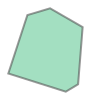

[Segment2D(Point2D(2.48033886812775, 2.94862578451817), Point2D(2.92595349680915, 2.80779881421590)), Segment2D(Point2D(2.92595349680915, 2.80779881421590), Point2D(3.02143005361188, 2.86524318173733)), Segment2D(Point2D(3.02143005361188, 2.86524318173733), Point2D(3.05665163805436, 3.30825785262495)), Segment2D(Point2D(2.80395526720645, 3.45414732326309), Point2D(3.05665163805436, 3.30825785262495)), Segment2D(Point2D(2.62819217435663, 3.40176771834601), Point2D(2.80395526720645, 3.45414732326309)), Segment2D(Point2D(2.48033886812775, 2.94862578451817), Point2D(2.62819217435663, 3.40176771834601))] 

{Point2D(3.31747738840947, 3.90695423084800), Point2D(2.80395526720645, 3.45414732326309), Point2D(2.89915317461666, 3.88529794752344), Point2D(3.05665163805436, 3.30825785262495), Point2D(3.35422268274939, 3.41425893325860)}
------------
Point2D(3.0891029759354, 3.62517665495246)
5 {Point2D(3.31747738840947, 3.90695423084800), Point2D(2.80395526720645, 3.45414732326309), Point2D(2.899153

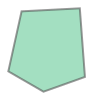

[Segment2D(Point2D(2.80395526720645, 3.45414732326309), Point2D(3.05665163805436, 3.30825785262495)), Segment2D(Point2D(3.05665163805436, 3.30825785262495), Point2D(3.35422268274939, 3.41425893325860)), Segment2D(Point2D(3.31747738840947, 3.90695423084800), Point2D(3.35422268274939, 3.41425893325860)), Segment2D(Point2D(2.89915317461666, 3.88529794752344), Point2D(3.31747738840947, 3.90695423084800)), Segment2D(Point2D(2.80395526720645, 3.45414732326309), Point2D(2.89915317461666, 3.88529794752344))] 

{Point2D(3.31747738840947, 3.90695423084800), Point2D(3.92063670885090, 3.59942644041575), Point2D(3.32001359627671, 3.90960384102015), Point2D(3.47849656668747, 3.34922502578127), Point2D(3.78647897093320, 3.90560682766692), Point2D(3.87858863533811, 3.49156710365318), Point2D(3.35422268274939, 3.41425893325860)}
------------
Point2D(3.5851228724857, 3.66216989841627)
7 {Point2D(3.31747738840947, 3.90695423084800), Point2D(3.92063670885090, 3.59942644041575), Point2D(3.32001359627671, 3

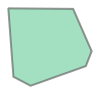

[Segment2D(Point2D(3.31747738840947, 3.90695423084800), Point2D(3.35422268274939, 3.41425893325860)), Segment2D(Point2D(3.35422268274939, 3.41425893325860), Point2D(3.47849656668747, 3.34922502578127)), Segment2D(Point2D(3.47849656668747, 3.34922502578127), Point2D(3.87858863533811, 3.49156710365318)), Segment2D(Point2D(3.87858863533811, 3.49156710365318), Point2D(3.92063670885090, 3.59942644041575)), Segment2D(Point2D(3.78647897093320, 3.90560682766692), Point2D(3.92063670885090, 3.59942644041575)), Segment2D(Point2D(3.32001359627671, 3.90960384102015), Point2D(3.78647897093320, 3.90560682766692)), Segment2D(Point2D(3.31747738840947, 3.90695423084800), Point2D(3.32001359627671, 3.90960384102015))] 

{Point2D(3.56274168652547, 2.90657242536819), Point2D(3.47849656668747, 3.34922502578127), Point2D(4.09888570797582, 3.08510915234404), Point2D(3.79846257067914, 2.85687377575467), Point2D(3.87858863533811, 3.49156710365318)}
------------
Point2D(3.7588197428535, 3.17394644950654)
5 {Point

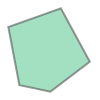

[Segment2D(Point2D(3.47849656668747, 3.34922502578127), Point2D(3.56274168652547, 2.90657242536819)), Segment2D(Point2D(3.56274168652547, 2.90657242536819), Point2D(3.79846257067914, 2.85687377575467)), Segment2D(Point2D(3.79846257067914, 2.85687377575467), Point2D(4.09888570797582, 3.08510915234404)), Segment2D(Point2D(3.87858863533811, 3.49156710365318), Point2D(4.09888570797582, 3.08510915234404)), Segment2D(Point2D(3.47849656668747, 3.34922502578127), Point2D(3.87858863533811, 3.49156710365318))] 

{Point2D(6.06372522630521, 5.23062518766008), Point2D(5.78643735377836, 5.82711775748202), Point2D(6.32045050642983, 5.52565835033268), Point2D(6.29836212130261, 5.70097455558127), Point2D(5.77362525250789, 5.26132171857571), Point2D(5.84324617869504, 5.86176669752298), Point2D(5.73339775213466, 5.31528058408446)}
------------
Point2D(5.99755920761104, 5.54455697036867)
7 {Point2D(6.06372522630521, 5.23062518766008), Point2D(5.78643735377836, 5.82711775748202), Point2D(6.32045050642983, 

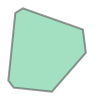

[Segment2D(Point2D(5.73339775213466, 5.31528058408446), Point2D(5.77362525250789, 5.26132171857571)), Segment2D(Point2D(5.77362525250789, 5.26132171857571), Point2D(6.06372522630521, 5.23062518766008)), Segment2D(Point2D(6.06372522630521, 5.23062518766008), Point2D(6.32045050642983, 5.52565835033268)), Segment2D(Point2D(6.29836212130261, 5.70097455558127), Point2D(6.32045050642983, 5.52565835033268)), Segment2D(Point2D(5.84324617869504, 5.86176669752298), Point2D(6.29836212130261, 5.70097455558127)), Segment2D(Point2D(5.78643735377836, 5.82711775748202), Point2D(5.84324617869504, 5.86176669752298)), Segment2D(Point2D(5.73339775213466, 5.31528058408446), Point2D(5.78643735377836, 5.82711775748202))] 

{Point2D(6.06372522630521, 5.23062518766008), Point2D(6.71229777664019, 5.29486310061524), Point2D(6.32045050642983, 5.52565835033268), Point2D(6.28354336566448, 4.86521433957799), Point2D(6.61255721492166, 4.99147349713139)}
------------
Point2D(6.38378857635575, 5.20847663965218)
5 {Poin

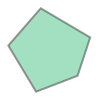

[Segment2D(Point2D(6.06372522630521, 5.23062518766008), Point2D(6.28354336566448, 4.86521433957799)), Segment2D(Point2D(6.28354336566448, 4.86521433957799), Point2D(6.61255721492166, 4.99147349713139)), Segment2D(Point2D(6.61255721492166, 4.99147349713139), Point2D(6.71229777664019, 5.29486310061524)), Segment2D(Point2D(6.32045050642983, 5.52565835033268), Point2D(6.71229777664019, 5.29486310061524)), Segment2D(Point2D(6.06372522630521, 5.23062518766008), Point2D(6.32045050642983, 5.52565835033268))] 

{Point2D(6.06372522630521, 5.23062518766008), Point2D(5.85555800633266, 4.63535594302900), Point2D(6.26716918814074, 4.82406015366499), Point2D(5.77362525250789, 5.26132171857571), Point2D(6.28354336566448, 4.86521433957799), Point2D(5.63177083367157, 4.89185465709437)}
------------
Point2D(5.93332356022483, 4.93749294496425)
6 {Point2D(6.06372522630521, 5.23062518766008), Point2D(5.85555800633266, 4.63535594302900), Point2D(6.26716918814074, 4.82406015366499), Point2D(5.77362525250789, 

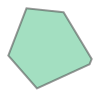

[Segment2D(Point2D(5.63177083367157, 4.89185465709437), Point2D(5.85555800633266, 4.63535594302900)), Segment2D(Point2D(5.85555800633266, 4.63535594302900), Point2D(6.26716918814074, 4.82406015366499)), Segment2D(Point2D(6.26716918814074, 4.82406015366499), Point2D(6.28354336566448, 4.86521433957799)), Segment2D(Point2D(6.06372522630521, 5.23062518766008), Point2D(6.28354336566448, 4.86521433957799)), Segment2D(Point2D(5.77362525250789, 5.26132171857571), Point2D(6.06372522630521, 5.23062518766008)), Segment2D(Point2D(5.63177083367157, 4.89185465709437), Point2D(5.77362525250789, 5.26132171857571))] 

{Point2D(5.44617952344258, 5.89512272779965), Point2D(5.19939688612117, 5.41104423291246), Point2D(5.78643735377836, 5.82711775748202), Point2D(5.20226658720329, 5.68046607008103), Point2D(5.73339775213466, 5.31528058408446)}
------------
Point2D(5.52186244302289, 5.59385148864188)
5 {Point2D(5.44617952344258, 5.89512272779965), Point2D(5.19939688612117, 5.41104423291246), Point2D(5.78643

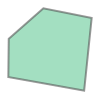

[Segment2D(Point2D(5.19939688612117, 5.41104423291246), Point2D(5.73339775213466, 5.31528058408446)), Segment2D(Point2D(5.73339775213466, 5.31528058408446), Point2D(5.78643735377836, 5.82711775748202)), Segment2D(Point2D(5.44617952344258, 5.89512272779965), Point2D(5.78643735377836, 5.82711775748202)), Segment2D(Point2D(5.20226658720329, 5.68046607008103), Point2D(5.44617952344258, 5.89512272779965)), Segment2D(Point2D(5.19939688612117, 5.41104423291246), Point2D(5.20226658720329, 5.68046607008103))] 

{Point2D(5.36962750268516, 4.83855125012590), Point2D(5.19939688612117, 5.41104423291246), Point2D(5.77362525250789, 5.26132171857571), Point2D(5.06481377885843, 5.25249674992112), Point2D(5.06244942396533, 5.19062204815711), Point2D(5.63177083367157, 4.89185465709437), Point2D(5.73339775213466, 5.31528058408446)}
------------
Point2D(5.43824404526431, 5.12757542915353)
7 {Point2D(5.36962750268516, 4.83855125012590), Point2D(5.19939688612117, 5.41104423291246), Point2D(5.77362525250789, 

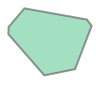

[Segment2D(Point2D(5.06244942396533, 5.19062204815711), Point2D(5.36962750268516, 4.83855125012590)), Segment2D(Point2D(5.36962750268516, 4.83855125012590), Point2D(5.63177083367157, 4.89185465709437)), Segment2D(Point2D(5.63177083367157, 4.89185465709437), Point2D(5.77362525250789, 5.26132171857571)), Segment2D(Point2D(5.73339775213466, 5.31528058408446), Point2D(5.77362525250789, 5.26132171857571)), Segment2D(Point2D(5.19939688612117, 5.41104423291246), Point2D(5.73339775213466, 5.31528058408446)), Segment2D(Point2D(5.06481377885843, 5.25249674992112), Point2D(5.19939688612117, 5.41104423291246)), Segment2D(Point2D(5.06244942396533, 5.19062204815711), Point2D(5.06481377885843, 5.25249674992112))] 

{Point2D(3.40666697758394, 2.31367708280589), Point2D(3.37644584055607, 2.28339408027861), Point2D(3.94344184246023, 1.86194507609413), Point2D(3.83604755860855, 2.31967936417669), Point2D(3.46918828624435, 1.75714050504308), Point2D(3.38630214288310, 1.83188162800771)}
------------
Point2

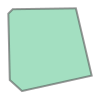

[Segment2D(Point2D(3.37644584055607, 2.28339408027861), Point2D(3.38630214288310, 1.83188162800771)), Segment2D(Point2D(3.38630214288310, 1.83188162800771), Point2D(3.46918828624435, 1.75714050504308)), Segment2D(Point2D(3.46918828624435, 1.75714050504308), Point2D(3.94344184246023, 1.86194507609413)), Segment2D(Point2D(3.83604755860855, 2.31967936417669), Point2D(3.94344184246023, 1.86194507609413)), Segment2D(Point2D(3.40666697758394, 2.31367708280589), Point2D(3.83604755860855, 2.31967936417669)), Segment2D(Point2D(3.37644584055607, 2.28339408027861), Point2D(3.40666697758394, 2.31367708280589))] 

{Point2D(4.41902493486658, 1.97981583523228), Point2D(3.93599679639431, 2.43836767442560), Point2D(3.96331542212928, 1.84939634446710), Point2D(3.94344184246023, 1.86194507609413), Point2D(4.25622015437161, 2.45887106273853), Point2D(3.83604755860855, 2.31967936417669), Point2D(4.45595979052028, 2.05608996299693)}
------------
Point2D(4.12967669637928, 2.16553285186767)
7 {Point2D(4.41902

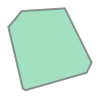

[Segment2D(Point2D(3.83604755860855, 2.31967936417669), Point2D(3.94344184246023, 1.86194507609413)), Segment2D(Point2D(3.94344184246023, 1.86194507609413), Point2D(3.96331542212928, 1.84939634446710)), Segment2D(Point2D(3.96331542212928, 1.84939634446710), Point2D(4.41902493486658, 1.97981583523228)), Segment2D(Point2D(4.41902493486658, 1.97981583523228), Point2D(4.45595979052028, 2.05608996299693)), Segment2D(Point2D(4.25622015437161, 2.45887106273853), Point2D(4.45595979052028, 2.05608996299693)), Segment2D(Point2D(3.93599679639431, 2.43836767442560), Point2D(4.25622015437161, 2.45887106273853)), Segment2D(Point2D(3.83604755860855, 2.31967936417669), Point2D(3.93599679639431, 2.43836767442560))] 

{Point2D(3.37644584055607, 2.28339408027861), Point2D(2.89281949277667, 2.30419384122643), Point2D(3.38630214288310, 1.83188162800771), Point2D(2.93624745474283, 1.76407142045074), Point2D(2.82402956246308, 1.90650436167444)}
------------
Point2D(3.1216676123642, 2.03967331055759)
5 {Point

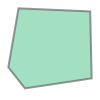

[Segment2D(Point2D(2.82402956246308, 1.90650436167444), Point2D(2.93624745474283, 1.76407142045074)), Segment2D(Point2D(2.93624745474283, 1.76407142045074), Point2D(3.38630214288310, 1.83188162800771)), Segment2D(Point2D(3.37644584055607, 2.28339408027861), Point2D(3.38630214288310, 1.83188162800771)), Segment2D(Point2D(2.89281949277667, 2.30419384122643), Point2D(3.37644584055607, 2.28339408027861)), Segment2D(Point2D(2.82402956246308, 1.90650436167444), Point2D(2.89281949277667, 2.30419384122643))] 

{Point2D(3.96331542212928, 1.84939634446710), Point2D(3.94344184246023, 1.86194507609413), Point2D(3.46918828624435, 1.75714050504308), Point2D(3.47438333690302, 1.39445993756838), Point2D(4.04896181312043, 1.42676739342716), Point2D(3.64018968091538, 1.25225148377761)}
------------
Point2D(3.74940128698257, 1.56328603765179)
6 {Point2D(3.96331542212928, 1.84939634446710), Point2D(3.94344184246023, 1.86194507609413), Point2D(3.46918828624435, 1.75714050504308), Point2D(3.47438333690302, 

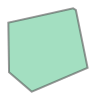

[Segment2D(Point2D(3.46918828624435, 1.75714050504308), Point2D(3.47438333690302, 1.39445993756838)), Segment2D(Point2D(3.47438333690302, 1.39445993756838), Point2D(3.64018968091538, 1.25225148377761)), Segment2D(Point2D(3.64018968091538, 1.25225148377761), Point2D(4.04896181312043, 1.42676739342716)), Segment2D(Point2D(3.96331542212928, 1.84939634446710), Point2D(4.04896181312043, 1.42676739342716)), Segment2D(Point2D(3.94344184246023, 1.86194507609413), Point2D(3.96331542212928, 1.84939634446710)), Segment2D(Point2D(3.46918828624435, 1.75714050504308), Point2D(3.94344184246023, 1.86194507609413))] 

{Point2D(3.46918828624435, 1.75714050504308), Point2D(3.06092749334847, 1.25485825795114), Point2D(3.47438333690302, 1.39445993756838), Point2D(3.38630214288310, 1.83188162800771), Point2D(2.88725199271747, 1.46376744090209), Point2D(2.93624745474283, 1.76407142045074)}
------------
Point2D(3.19464266779734, 1.55533965345463)
6 {Point2D(3.46918828624435, 1.75714050504308), Point2D(3.06092

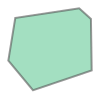

[Segment2D(Point2D(2.88725199271747, 1.46376744090209), Point2D(3.06092749334847, 1.25485825795114)), Segment2D(Point2D(3.06092749334847, 1.25485825795114), Point2D(3.47438333690302, 1.39445993756838)), Segment2D(Point2D(3.46918828624435, 1.75714050504308), Point2D(3.47438333690302, 1.39445993756838)), Segment2D(Point2D(3.38630214288310, 1.83188162800771), Point2D(3.46918828624435, 1.75714050504308)), Segment2D(Point2D(2.93624745474283, 1.76407142045074), Point2D(3.38630214288310, 1.83188162800771)), Segment2D(Point2D(2.88725199271747, 1.46376744090209), Point2D(2.93624745474283, 1.76407142045074))] 

{Point2D(5.11301343711810, 0.835309471586234), Point2D(5.38213628609919, 0.746492339947896), Point2D(4.81456739322846, 0.515382609875604), Point2D(5, 0)}
------------
Point2D(5.14677932235934, 0.516312251000552)
4 {Point2D(5.11301343711810, 0.835309471586234), Point2D(5.38213628609919, 0.746492339947896), Point2D(4.81456739322846, 0.515382609875604), Point2D(5, 0)}
Polygon(Point2D(4.81456

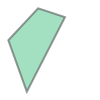

[Segment2D(Point2D(4.81456739322846, 0.515382609875604), Point2D(5, 0)), Segment2D(Point2D(5, 0), Point2D(5.38213628609919, 0.746492339947896)), Segment2D(Point2D(5.11301343711810, 0.835309471586234), Point2D(5.38213628609919, 0.746492339947896)), Segment2D(Point2D(4.81456739322846, 0.515382609875604), Point2D(5.11301343711810, 0.835309471586234))] 

{Point2D(4.46859250260663, 0.903461595566287), Point2D(4.81616917219414, 1.17053461223106), Point2D(5.00064432107216, 1.10415919834373), Point2D(4.52305622215371, 0.669344401186515), Point2D(4.81456739322846, 0.515382609875604), Point2D(5.11301343711810, 0.835309471586234)}
------------
Point2D(4.79244209182153, 0.846858251706397)
6 {Point2D(4.46859250260663, 0.903461595566287), Point2D(4.81616917219414, 1.17053461223106), Point2D(5.00064432107216, 1.10415919834373), Point2D(4.52305622215371, 0.669344401186515), Point2D(4.81456739322846, 0.515382609875604), Point2D(5.11301343711810, 0.835309471586234)}
Polygon(Point2D(4.46859250260663, 0.9

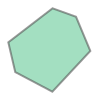

[Segment2D(Point2D(4.46859250260663, 0.903461595566287), Point2D(4.52305622215371, 0.669344401186515)), Segment2D(Point2D(4.52305622215371, 0.669344401186515), Point2D(4.81456739322846, 0.515382609875604)), Segment2D(Point2D(4.81456739322846, 0.515382609875604), Point2D(5.11301343711810, 0.835309471586234)), Segment2D(Point2D(5.00064432107216, 1.10415919834373), Point2D(5.11301343711810, 0.835309471586234)), Segment2D(Point2D(4.81616917219414, 1.17053461223106), Point2D(5.00064432107216, 1.10415919834373)), Segment2D(Point2D(4.46859250260663, 0.903461595566287), Point2D(4.81616917219414, 1.17053461223106))] 

{Point2D(5.46358836082911, 1.38214005266382), Point2D(5.00064432107216, 1.10415919834373), Point2D(5.33603738424748, 1.40480545654722), Point2D(5.38213628609919, 0.746492339947896), Point2D(5.11301343711810, 0.835309471586234), Point2D(5.65142723228107, 1.08910878032309)}
------------
Point2D(5.33001994633953, 1.07154565997201)
6 {Point2D(5.46358836082911, 1.38214005266382), Point

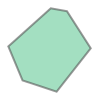

[Segment2D(Point2D(5.00064432107216, 1.10415919834373), Point2D(5.11301343711810, 0.835309471586234)), Segment2D(Point2D(5.11301343711810, 0.835309471586234), Point2D(5.38213628609919, 0.746492339947896)), Segment2D(Point2D(5.38213628609919, 0.746492339947896), Point2D(5.65142723228107, 1.08910878032309)), Segment2D(Point2D(5.46358836082911, 1.38214005266382), Point2D(5.65142723228107, 1.08910878032309)), Segment2D(Point2D(5.33603738424748, 1.40480545654722), Point2D(5.46358836082911, 1.38214005266382)), Segment2D(Point2D(5.00064432107216, 1.10415919834373), Point2D(5.33603738424748, 1.40480545654722))] 

{Point2D(10, 5/2), Point2D(8.79214078459704, 2.68251155602988), Point2D(9.76456456107813, 2.76315566237374), Point2D(9.07488539562968, 2.88937080906263)}
------------
Point2D(9.09042325348191, 2.555256467294)
4 {Point2D(10, 5/2), Point2D(8.79214078459704, 2.68251155602988), Point2D(9.76456456107813, 2.76315566237374), Point2D(9.07488539562968, 2.88937080906263)}
Polygon(Point2D(8.7921

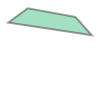

[Segment2D(Point2D(8.79214078459704, 2.68251155602988), Point2D(10, 5/2)), Segment2D(Point2D(9.76456456107813, 2.76315566237374), Point2D(10, 5/2)), Segment2D(Point2D(9.07488539562968, 2.88937080906263), Point2D(9.76456456107813, 2.76315566237374)), Segment2D(Point2D(8.79214078459704, 2.68251155602988), Point2D(9.07488539562968, 2.88937080906263))] 

{Point2D(8.49554781722019, 3.73042357733452), Point2D(8.63562690035173, 3.30988394010067), Point2D(8.90170038741016, 3.29429342780907), Point2D(8.59155734288784, 3.86191162739852), Point2D(8.90974999157240, 3.89774550720891), Point2D(9.11524917590935, 3.51343218133292)}
------------
Point2D(8.79586130746708, 3.59770297922506)
6 {Point2D(8.49554781722019, 3.73042357733452), Point2D(8.63562690035173, 3.30988394010067), Point2D(8.90170038741016, 3.29429342780907), Point2D(8.59155734288784, 3.86191162739852), Point2D(8.90974999157240, 3.89774550720891), Point2D(9.11524917590935, 3.51343218133292)}
Polygon(Point2D(8.49554781722019, 3.7304235773

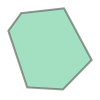

[Segment2D(Point2D(8.49554781722019, 3.73042357733452), Point2D(8.63562690035173, 3.30988394010067)), Segment2D(Point2D(8.63562690035173, 3.30988394010067), Point2D(8.90170038741016, 3.29429342780907)), Segment2D(Point2D(8.90170038741016, 3.29429342780907), Point2D(9.11524917590935, 3.51343218133292)), Segment2D(Point2D(8.90974999157240, 3.89774550720891), Point2D(9.11524917590935, 3.51343218133292)), Segment2D(Point2D(8.59155734288784, 3.86191162739852), Point2D(8.90974999157240, 3.89774550720891)), Segment2D(Point2D(8.49554781722019, 3.73042357733452), Point2D(8.59155734288784, 3.86191162739852))] 

{Point2D(8.63562690035173, 3.30988394010067), Point2D(8.79214078459704, 2.68251155602988), Point2D(8.90170038741016, 3.29429342780907), Point2D(8.47509220128251, 3.15390852223811), Point2D(8.58007237451253, 2.73064172004104), Point2D(9.07488539562968, 2.88937080906263)}
------------
Point2D(8.76115082482849, 3.00532095993065)
6 {Point2D(8.63562690035173, 3.30988394010067), Point2D(8.79214

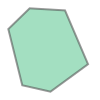

[Segment2D(Point2D(8.47509220128251, 3.15390852223811), Point2D(8.58007237451253, 2.73064172004104)), Segment2D(Point2D(8.58007237451253, 2.73064172004104), Point2D(8.79214078459704, 2.68251155602988)), Segment2D(Point2D(8.79214078459704, 2.68251155602988), Point2D(9.07488539562968, 2.88937080906263)), Segment2D(Point2D(8.90170038741016, 3.29429342780907), Point2D(9.07488539562968, 2.88937080906263)), Segment2D(Point2D(8.63562690035173, 3.30988394010067), Point2D(8.90170038741016, 3.29429342780907)), Segment2D(Point2D(8.47509220128251, 3.15390852223811), Point2D(8.63562690035173, 3.30988394010067))] 

{Point2D(8.06281596619023, 2.64876888489592), Point2D(8.47509220128251, 3.15390852223811), Point2D(8.58007237451253, 2.73064172004104), Point2D(8.03205276219869, 3.10087250283341), Point2D(8.11937206246840, 3.18157276014642), Point2D(8.35238357649742, 2.57393938613358)}
------------
Point2D(8.29162335722976, 2.8888670480507)
6 {Point2D(8.06281596619023, 2.64876888489592), Point2D(8.475092

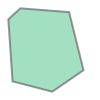

[Segment2D(Point2D(8.03205276219869, 3.10087250283341), Point2D(8.06281596619023, 2.64876888489592)), Segment2D(Point2D(8.06281596619023, 2.64876888489592), Point2D(8.35238357649742, 2.57393938613358)), Segment2D(Point2D(8.35238357649742, 2.57393938613358), Point2D(8.58007237451253, 2.73064172004104)), Segment2D(Point2D(8.47509220128251, 3.15390852223811), Point2D(8.58007237451253, 2.73064172004104)), Segment2D(Point2D(8.11937206246840, 3.18157276014642), Point2D(8.47509220128251, 3.15390852223811)), Segment2D(Point2D(8.03205276219869, 3.10087250283341), Point2D(8.11937206246840, 3.18157276014642))] 

{Point2D(7.68980423362712, 5.53936660373808), Point2D(7.45512376008710, 5.57058684901257), Point2D(7.88406983632220, 5.23738996588779), Point2D(7.22003888723110, 5.18390333905947), Point2D(7.26408764019229, 5.06035552971547), Point2D(7.56112519982856, 4.93325688394885)}
------------
Point2D(7.54528432777141, 5.2513848791553)
6 {Point2D(7.68980423362712, 5.53936660373808), Point2D(7.455123

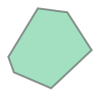

[Segment2D(Point2D(7.22003888723110, 5.18390333905947), Point2D(7.26408764019229, 5.06035552971547)), Segment2D(Point2D(7.26408764019229, 5.06035552971547), Point2D(7.56112519982856, 4.93325688394885)), Segment2D(Point2D(7.56112519982856, 4.93325688394885), Point2D(7.88406983632220, 5.23738996588779)), Segment2D(Point2D(7.68980423362712, 5.53936660373808), Point2D(7.88406983632220, 5.23738996588779)), Segment2D(Point2D(7.45512376008710, 5.57058684901257), Point2D(7.68980423362712, 5.53936660373808)), Segment2D(Point2D(7.22003888723110, 5.18390333905947), Point2D(7.45512376008710, 5.57058684901257))] 

{Point2D(8.23441188773958, 4.81036087498118), Point2D(8.66871862502640, 5.14914668327557), Point2D(8.22813205317778, 4.81225096427172), Point2D(7.99849905237405, 5.21390293796802), Point2D(8.35693674086479, 5.50522483867919), Point2D(8.63273421036155, 5.01751030580895)}
------------
Point2D(8.33167617615595, 5.15790458269113)
6 {Point2D(8.23441188773958, 4.81036087498118), Point2D(8.66871

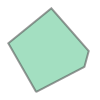

[Segment2D(Point2D(7.99849905237405, 5.21390293796802), Point2D(8.22813205317778, 4.81225096427172)), Segment2D(Point2D(8.22813205317778, 4.81225096427172), Point2D(8.23441188773958, 4.81036087498118)), Segment2D(Point2D(8.23441188773958, 4.81036087498118), Point2D(8.63273421036155, 5.01751030580895)), Segment2D(Point2D(8.63273421036155, 5.01751030580895), Point2D(8.66871862502640, 5.14914668327557)), Segment2D(Point2D(8.35693674086479, 5.50522483867919), Point2D(8.66871862502640, 5.14914668327557)), Segment2D(Point2D(7.99849905237405, 5.21390293796802), Point2D(8.35693674086479, 5.50522483867919))] 

{Point2D(7.88406983632220, 5.23738996588779), Point2D(8.22813205317778, 4.81225096427172), Point2D(7.99849905237405, 5.21390293796802), Point2D(7.64593503600552, 4.66038702729899), Point2D(7.81583454260493, 4.57724233204774), Point2D(7.56112519982856, 4.93325688394885)}
------------
Point2D(7.87773156822864, 4.89837476746896)
6 {Point2D(7.88406983632220, 5.23738996588779), Point2D(8.22813

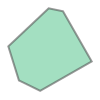

[Segment2D(Point2D(7.56112519982856, 4.93325688394885), Point2D(7.64593503600552, 4.66038702729899)), Segment2D(Point2D(7.64593503600552, 4.66038702729899), Point2D(7.81583454260493, 4.57724233204774)), Segment2D(Point2D(7.81583454260493, 4.57724233204774), Point2D(8.22813205317778, 4.81225096427172)), Segment2D(Point2D(7.99849905237405, 5.21390293796802), Point2D(8.22813205317778, 4.81225096427172)), Segment2D(Point2D(7.88406983632220, 5.23738996588779), Point2D(7.99849905237405, 5.21390293796802)), Segment2D(Point2D(7.56112519982856, 4.93325688394885), Point2D(7.88406983632220, 5.23738996588779))] 

{Point2D(9.25265689354389, 5.65888235778919), Point2D(9.62025048502702, 5.41296253968986), Point2D(9.02933404176359, 5.53682869816001), Point2D(9.48646492154206, 5.07831227566752), Point2D(9.29177939063396, 5.01015446431030), Point2D(8.97264810881357, 5.30672154990930)}
------------
Point2D(9.29259659324413, 5.33953078554896)
6 {Point2D(9.25265689354389, 5.65888235778919), Point2D(9.62025

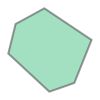

[Segment2D(Point2D(8.97264810881357, 5.30672154990930), Point2D(9.29177939063396, 5.01015446431030)), Segment2D(Point2D(9.29177939063396, 5.01015446431030), Point2D(9.48646492154206, 5.07831227566752)), Segment2D(Point2D(9.48646492154206, 5.07831227566752), Point2D(9.62025048502702, 5.41296253968986)), Segment2D(Point2D(9.25265689354389, 5.65888235778919), Point2D(9.62025048502702, 5.41296253968986)), Segment2D(Point2D(9.02933404176359, 5.53682869816001), Point2D(9.25265689354389, 5.65888235778919)), Segment2D(Point2D(8.97264810881357, 5.30672154990930), Point2D(9.02933404176359, 5.53682869816001))] 

{Point2D(7.49334735956492, 4.02961266181025), Point2D(7.91610991684176, 4.18997428833533), Point2D(7.29132632127178, 4.20620375551610), Point2D(7.64593503600552, 4.66038702729899), Point2D(7.81583454260493, 4.57724233204774), Point2D(7.28570474557009, 4.40405758004534)}
------------
Point2D(7.60023316785131, 4.33132907485127)
6 {Point2D(7.49334735956492, 4.02961266181025), Point2D(7.91610

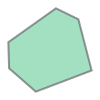

[Segment2D(Point2D(7.28570474557009, 4.40405758004534), Point2D(7.29132632127178, 4.20620375551610)), Segment2D(Point2D(7.29132632127178, 4.20620375551610), Point2D(7.49334735956492, 4.02961266181025)), Segment2D(Point2D(7.49334735956492, 4.02961266181025), Point2D(7.91610991684176, 4.18997428833533)), Segment2D(Point2D(7.81583454260493, 4.57724233204774), Point2D(7.91610991684176, 4.18997428833533)), Segment2D(Point2D(7.64593503600552, 4.66038702729899), Point2D(7.81583454260493, 4.57724233204774)), Segment2D(Point2D(7.28570474557009, 4.40405758004534), Point2D(7.64593503600552, 4.66038702729899))] 

{Point2D(7.28570474557009, 4.40405758004534), Point2D(7.64593503600552, 4.66038702729899), Point2D(7.26408764019229, 5.06035552971547), Point2D(6.96431640469173, 4.67295398133422), Point2D(7.56112519982856, 4.93325688394885)}
------------
Point2D(7.3200724301962, 4.72505045557986)
5 {Point2D(7.28570474557009, 4.40405758004534), Point2D(7.64593503600552, 4.66038702729899), Point2D(7.264087

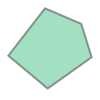

[Segment2D(Point2D(6.96431640469173, 4.67295398133422), Point2D(7.28570474557009, 4.40405758004534)), Segment2D(Point2D(7.28570474557009, 4.40405758004534), Point2D(7.64593503600552, 4.66038702729899)), Segment2D(Point2D(7.56112519982856, 4.93325688394885), Point2D(7.64593503600552, 4.66038702729899)), Segment2D(Point2D(7.26408764019229, 5.06035552971547), Point2D(7.56112519982856, 4.93325688394885)), Segment2D(Point2D(6.96431640469173, 4.67295398133422), Point2D(7.26408764019229, 5.06035552971547))] 

{Point2D(8.23441188773958, 4.81036087498118), Point2D(8.22813205317778, 4.81225096427172), Point2D(8.45366042769332, 4.36793558303714), Point2D(8.41421358016404, 4.28846176009838), Point2D(7.91610991684176, 4.18997428833533), Point2D(7.81583454260493, 4.57724233204774), Point2D(7.97996074657411, 4.15220993121035)}
------------
Point2D(8.12368958855561, 4.46686772652937)
7 {Point2D(8.23441188773958, 4.81036087498118), Point2D(8.22813205317778, 4.81225096427172), Point2D(8.45366042769332, 

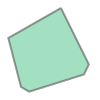

[Segment2D(Point2D(7.81583454260493, 4.57724233204774), Point2D(7.91610991684176, 4.18997428833533)), Segment2D(Point2D(7.91610991684176, 4.18997428833533), Point2D(7.97996074657411, 4.15220993121035)), Segment2D(Point2D(7.97996074657411, 4.15220993121035), Point2D(8.41421358016404, 4.28846176009838)), Segment2D(Point2D(8.41421358016404, 4.28846176009838), Point2D(8.45366042769332, 4.36793558303714)), Segment2D(Point2D(8.23441188773958, 4.81036087498118), Point2D(8.45366042769332, 4.36793558303714)), Segment2D(Point2D(8.22813205317778, 4.81225096427172), Point2D(8.23441188773958, 4.81036087498118)), Segment2D(Point2D(7.81583454260493, 4.57724233204774), Point2D(8.22813205317778, 4.81225096427172))] 

{Point2D(7.58250557574696, 3.13327718473858), Point2D(8.06281596619023, 2.64876888489592), Point2D(7.52250989154836, 2.65022512530594), Point2D(7.90578312138773, 2.54669692064460), Point2D(8.03205276219869, 3.10087250283341)}
------------
Point2D(7.80359342513037, 2.85565925284738)
5 {Poin

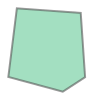

[Segment2D(Point2D(7.52250989154836, 2.65022512530594), Point2D(7.90578312138773, 2.54669692064460)), Segment2D(Point2D(7.90578312138773, 2.54669692064460), Point2D(8.06281596619023, 2.64876888489592)), Segment2D(Point2D(8.03205276219869, 3.10087250283341), Point2D(8.06281596619023, 2.64876888489592)), Segment2D(Point2D(7.58250557574696, 3.13327718473858), Point2D(8.03205276219869, 3.10087250283341)), Segment2D(Point2D(7.52250989154836, 2.65022512530594), Point2D(7.58250557574696, 3.13327718473858))] 

{Point2D(7.58250557574696, 3.13327718473858), Point2D(7.56156782460026, 3.15799742281641), Point2D(7.59049801745775, 3.59606222257228), Point2D(8.03205276219869, 3.10087250283341), Point2D(8.11937206246840, 3.18157276014642), Point2D(8.05379605879947, 3.65897734954532)}
------------
Point2D(7.84112392799098, 3.37631648430784)
6 {Point2D(7.58250557574696, 3.13327718473858), Point2D(7.56156782460026, 3.15799742281641), Point2D(7.59049801745775, 3.59606222257228), Point2D(8.03205276219869, 

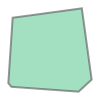

[Segment2D(Point2D(7.56156782460026, 3.15799742281641), Point2D(7.58250557574696, 3.13327718473858)), Segment2D(Point2D(7.58250557574696, 3.13327718473858), Point2D(8.03205276219869, 3.10087250283341)), Segment2D(Point2D(8.03205276219869, 3.10087250283341), Point2D(8.11937206246840, 3.18157276014642)), Segment2D(Point2D(8.05379605879947, 3.65897734954532), Point2D(8.11937206246840, 3.18157276014642)), Segment2D(Point2D(7.59049801745775, 3.59606222257228), Point2D(8.05379605879947, 3.65897734954532)), Segment2D(Point2D(7.56156782460026, 3.15799742281641), Point2D(7.59049801745775, 3.59606222257228))] 

{Point2D(7.58250557574696, 3.13327718473858), Point2D(6.97436963592364, 2.81605093943029), Point2D(7.56156782460026, 3.15799742281641), Point2D(7.52250989154836, 2.65022512530594), Point2D(7.09684930155979, 3.17018430144402), Point2D(7.01897536017291, 2.72576558801307), Point2D(7.46430012200713, 2.61435466433027)}
------------
Point2D(7.30022171216084, 2.91817866402906)
7 {Point2D(7.58250

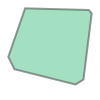

[Segment2D(Point2D(6.97436963592364, 2.81605093943029), Point2D(7.01897536017291, 2.72576558801307)), Segment2D(Point2D(7.01897536017291, 2.72576558801307), Point2D(7.46430012200713, 2.61435466433027)), Segment2D(Point2D(7.46430012200713, 2.61435466433027), Point2D(7.52250989154836, 2.65022512530594)), Segment2D(Point2D(7.52250989154836, 2.65022512530594), Point2D(7.58250557574696, 3.13327718473858)), Segment2D(Point2D(7.56156782460026, 3.15799742281641), Point2D(7.58250557574696, 3.13327718473858)), Segment2D(Point2D(7.09684930155979, 3.17018430144402), Point2D(7.56156782460026, 3.15799742281641)), Segment2D(Point2D(6.97436963592364, 2.81605093943029), Point2D(7.09684930155979, 3.17018430144402))] 

{Point2D(7.46430012200713, 2.61435466433027), Point2D(7.37667908561960, 2.15391107571464), Point2D(7.01897536017291, 2.72576558801307), Point2D(7.24066585621605, 2.09925467863095), Point2D(6.84170707565543, 2.28990181350531)}
------------
Point2D(7.17648474665342, 2.42358502030729)
5 {Poin

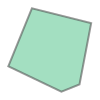

[Segment2D(Point2D(6.84170707565543, 2.28990181350531), Point2D(7.24066585621605, 2.09925467863095)), Segment2D(Point2D(7.24066585621605, 2.09925467863095), Point2D(7.37667908561960, 2.15391107571464)), Segment2D(Point2D(7.37667908561960, 2.15391107571464), Point2D(7.46430012200713, 2.61435466433027)), Segment2D(Point2D(7.01897536017291, 2.72576558801307), Point2D(7.46430012200713, 2.61435466433027)), Segment2D(Point2D(6.84170707565543, 2.28990181350531), Point2D(7.01897536017291, 2.72576558801307))] 

{Point2D(8.49554781722019, 3.73042357733452), Point2D(8.63562690035173, 3.30988394010067), Point2D(8.47509220128251, 3.15390852223811), Point2D(8.07386411471513, 3.68514198284263), Point2D(8.11937206246840, 3.18157276014642), Point2D(8.05379605879947, 3.65897734954532)}
------------
Point2D(8.33480584417744, 3.44412833167171)
6 {Point2D(8.49554781722019, 3.73042357733452), Point2D(8.63562690035173, 3.30988394010067), Point2D(8.47509220128251, 3.15390852223811), Point2D(8.07386411471513, 

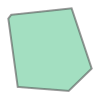

[Segment2D(Point2D(8.05379605879947, 3.65897734954532), Point2D(8.11937206246840, 3.18157276014642)), Segment2D(Point2D(8.11937206246840, 3.18157276014642), Point2D(8.47509220128251, 3.15390852223811)), Segment2D(Point2D(8.47509220128251, 3.15390852223811), Point2D(8.63562690035173, 3.30988394010067)), Segment2D(Point2D(8.49554781722019, 3.73042357733452), Point2D(8.63562690035173, 3.30988394010067)), Segment2D(Point2D(8.07386411471513, 3.68514198284263), Point2D(8.49554781722019, 3.73042357733452)), Segment2D(Point2D(8.05379605879947, 3.65897734954532), Point2D(8.07386411471513, 3.68514198284263))] 

{Point2D(7.59049801745775, 3.59606222257228), Point2D(7.48826131573908, 3.69759162950807), Point2D(8.07386411471513, 3.68514198284263), Point2D(7.49334735956492, 4.02961266181025), Point2D(7.91610991684176, 4.18997428833533), Point2D(7.97996074657411, 4.15220993121035), Point2D(8.05379605879947, 3.65897734954532)}
------------
Point2D(7.77344606908715, 3.87468660578558)
7 {Point2D(7.59049

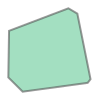

[Segment2D(Point2D(7.48826131573908, 3.69759162950807), Point2D(7.59049801745775, 3.59606222257228)), Segment2D(Point2D(7.59049801745775, 3.59606222257228), Point2D(8.05379605879947, 3.65897734954532)), Segment2D(Point2D(8.05379605879947, 3.65897734954532), Point2D(8.07386411471513, 3.68514198284263)), Segment2D(Point2D(7.97996074657411, 4.15220993121035), Point2D(8.07386411471513, 3.68514198284263)), Segment2D(Point2D(7.91610991684176, 4.18997428833533), Point2D(7.97996074657411, 4.15220993121035)), Segment2D(Point2D(7.49334735956492, 4.02961266181025), Point2D(7.91610991684176, 4.18997428833533)), Segment2D(Point2D(7.48826131573908, 3.69759162950807), Point2D(7.49334735956492, 4.02961266181025))] 

{Point2D(8.49554781722019, 3.73042357733452), Point2D(8.07386411471513, 3.68514198284263), Point2D(8.59155734288784, 3.86191162739852), Point2D(8.41421358016404, 4.28846176009838), Point2D(7.97996074657411, 4.15220993121035)}
------------
Point2D(8.27768516801189, 3.97606318258325)
5 {Poin

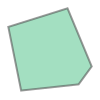

[Segment2D(Point2D(7.97996074657411, 4.15220993121035), Point2D(8.07386411471513, 3.68514198284263)), Segment2D(Point2D(8.07386411471513, 3.68514198284263), Point2D(8.49554781722019, 3.73042357733452)), Segment2D(Point2D(8.49554781722019, 3.73042357733452), Point2D(8.59155734288784, 3.86191162739852)), Segment2D(Point2D(8.41421358016404, 4.28846176009838), Point2D(8.59155734288784, 3.86191162739852)), Segment2D(Point2D(7.97996074657411, 4.15220993121035), Point2D(8.41421358016404, 4.28846176009838))] 

{Point2D(7.48826131573908, 3.69759162950807), Point2D(7.05776171406376, 3.60229661391882), Point2D(6.88177386558672, 3.98458179692840), Point2D(7.49334735956492, 4.02961266181025), Point2D(7.29132632127178, 4.20620375551610), Point2D(6.86183517540901, 3.90554595025278)}
------------
Point2D(7.2086347350197, 3.88333863357575)
6 {Point2D(7.48826131573908, 3.69759162950807), Point2D(7.05776171406376, 3.60229661391882), Point2D(6.88177386558672, 3.98458179692840), Point2D(7.49334735956492, 4

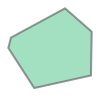

[Segment2D(Point2D(6.86183517540901, 3.90554595025278), Point2D(7.05776171406376, 3.60229661391882)), Segment2D(Point2D(7.05776171406376, 3.60229661391882), Point2D(7.48826131573908, 3.69759162950807)), Segment2D(Point2D(7.48826131573908, 3.69759162950807), Point2D(7.49334735956492, 4.02961266181025)), Segment2D(Point2D(7.29132632127178, 4.20620375551610), Point2D(7.49334735956492, 4.02961266181025)), Segment2D(Point2D(6.88177386558672, 3.98458179692840), Point2D(7.29132632127178, 4.20620375551610)), Segment2D(Point2D(6.86183517540901, 3.90554595025278), Point2D(6.88177386558672, 3.98458179692840))] 

{Point2D(7.56156782460026, 3.15799742281641), Point2D(7.09684930155979, 3.17018430144402), Point2D(7.59049801745775, 3.59606222257228), Point2D(7.05776171406376, 3.60229661391882), Point2D(7.48826131573908, 3.69759162950807), Point2D(6.98588389585369, 3.35845029698006)}
------------
Point2D(7.31315039892711, 3.41118433040729)
6 {Point2D(7.56156782460026, 3.15799742281641), Point2D(7.09684

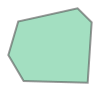

[Segment2D(Point2D(6.98588389585369, 3.35845029698006), Point2D(7.09684930155979, 3.17018430144402)), Segment2D(Point2D(7.09684930155979, 3.17018430144402), Point2D(7.56156782460026, 3.15799742281641)), Segment2D(Point2D(7.56156782460026, 3.15799742281641), Point2D(7.59049801745775, 3.59606222257228)), Segment2D(Point2D(7.48826131573908, 3.69759162950807), Point2D(7.59049801745775, 3.59606222257228)), Segment2D(Point2D(7.05776171406376, 3.60229661391882), Point2D(7.48826131573908, 3.69759162950807)), Segment2D(Point2D(6.98588389585369, 3.35845029698006), Point2D(7.05776171406376, 3.60229661391882))] 

{Point2D(6.65315939573486, 4.35807845125143), Point2D(6.88177386558672, 3.98458179692840), Point2D(7.29132632127178, 4.20620375551610), Point2D(7.28570474557009, 4.40405758004534), Point2D(6.96431640469173, 4.67295398133422), Point2D(6.94695713678753, 4.67173464123568)}
------------
Point2D(6.97581324546826, 4.31358757366132)
6 {Point2D(6.65315939573486, 4.35807845125143), Point2D(6.88177

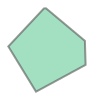

[Segment2D(Point2D(6.65315939573486, 4.35807845125143), Point2D(6.88177386558672, 3.98458179692840)), Segment2D(Point2D(6.88177386558672, 3.98458179692840), Point2D(7.29132632127178, 4.20620375551610)), Segment2D(Point2D(7.28570474557009, 4.40405758004534), Point2D(7.29132632127178, 4.20620375551610)), Segment2D(Point2D(6.96431640469173, 4.67295398133422), Point2D(7.28570474557009, 4.40405758004534)), Segment2D(Point2D(6.94695713678753, 4.67173464123568), Point2D(6.96431640469173, 4.67295398133422)), Segment2D(Point2D(6.65315939573486, 4.35807845125143), Point2D(6.94695713678753, 4.67173464123568))] 

{Point2D(6.65315939573486, 4.35807845125143), Point2D(6.34975416610223, 3.76627455899123), Point2D(6.27308796518171, 4.21168219470224), Point2D(6.42739232455750, 3.72673650070458), Point2D(6.88177386558672, 3.98458179692840), Point2D(6.44714659937083, 4.37178376287489), Point2D(6.86183517540901, 3.90554595025278)}
------------
Point2D(6.54600232728152, 4.05050356993468)
7 {Point2D(6.65315

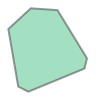

[Segment2D(Point2D(6.27308796518171, 4.21168219470224), Point2D(6.34975416610223, 3.76627455899123)), Segment2D(Point2D(6.34975416610223, 3.76627455899123), Point2D(6.42739232455750, 3.72673650070458)), Segment2D(Point2D(6.42739232455750, 3.72673650070458), Point2D(6.86183517540901, 3.90554595025278)), Segment2D(Point2D(6.86183517540901, 3.90554595025278), Point2D(6.88177386558672, 3.98458179692840)), Segment2D(Point2D(6.65315939573486, 4.35807845125143), Point2D(6.88177386558672, 3.98458179692840)), Segment2D(Point2D(6.44714659937083, 4.37178376287489), Point2D(6.65315939573486, 4.35807845125143)), Segment2D(Point2D(6.27308796518171, 4.21168219470224), Point2D(6.44714659937083, 4.37178376287489))] 

{Point2D(6.54023023825480, 3.31994665953007), Point2D(7.05776171406376, 3.60229661391882), Point2D(6.42739232455750, 3.72673650070458), Point2D(6.98588389585369, 3.35845029698006), Point2D(6.86183517540901, 3.90554595025278)}
------------
Point2D(6.73954503032357, 3.58026419565356)
5 {Poin

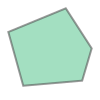

[Segment2D(Point2D(6.42739232455750, 3.72673650070458), Point2D(6.54023023825480, 3.31994665953007)), Segment2D(Point2D(6.54023023825480, 3.31994665953007), Point2D(6.98588389585369, 3.35845029698006)), Segment2D(Point2D(6.98588389585369, 3.35845029698006), Point2D(7.05776171406376, 3.60229661391882)), Segment2D(Point2D(6.86183517540901, 3.90554595025278), Point2D(7.05776171406376, 3.60229661391882)), Segment2D(Point2D(6.42739232455750, 3.72673650070458), Point2D(6.86183517540901, 3.90554595025278))] 

{Point2D(5.31699119821057, 4.33640708257810), Point2D(5.36962750268516, 4.83855125012590), Point2D(5.63177083367157, 4.89185465709437), Point2D(5.85555800633266, 4.63535594302900), Point2D(5.20530354839087, 4.47028320388734), Point2D(5.81119997052905, 4.37943747331564)}
------------
Point2D(5.54566707090369, 4.59927468127816)
6 {Point2D(5.31699119821057, 4.33640708257810), Point2D(5.36962750268516, 4.83855125012590), Point2D(5.63177083367157, 4.89185465709437), Point2D(5.85555800633266, 

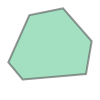

[Segment2D(Point2D(5.20530354839087, 4.47028320388734), Point2D(5.31699119821057, 4.33640708257810)), Segment2D(Point2D(5.31699119821057, 4.33640708257810), Point2D(5.81119997052905, 4.37943747331564)), Segment2D(Point2D(5.81119997052905, 4.37943747331564), Point2D(5.85555800633266, 4.63535594302900)), Segment2D(Point2D(5.63177083367157, 4.89185465709437), Point2D(5.85555800633266, 4.63535594302900)), Segment2D(Point2D(5.36962750268516, 4.83855125012590), Point2D(5.63177083367157, 4.89185465709437)), Segment2D(Point2D(5.20530354839087, 4.47028320388734), Point2D(5.36962750268516, 4.83855125012590))] 

{Point2D(6.27308796518171, 4.21168219470224), Point2D(5.85555800633266, 4.63535594302900), Point2D(6.26716918814074, 4.82406015366499), Point2D(6.44714659937083, 4.37178376287489), Point2D(5.89515068592832, 4.25848847905448), Point2D(5.81119997052905, 4.37943747331564)}
------------
Point2D(6.13522897081555, 4.49708663719509)
6 {Point2D(6.27308796518171, 4.21168219470224), Point2D(5.85555

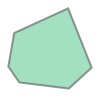

[Segment2D(Point2D(5.81119997052905, 4.37943747331564), Point2D(5.89515068592832, 4.25848847905448)), Segment2D(Point2D(5.89515068592832, 4.25848847905448), Point2D(6.27308796518171, 4.21168219470224)), Segment2D(Point2D(6.27308796518171, 4.21168219470224), Point2D(6.44714659937083, 4.37178376287489)), Segment2D(Point2D(6.26716918814074, 4.82406015366499), Point2D(6.44714659937083, 4.37178376287489)), Segment2D(Point2D(5.85555800633266, 4.63535594302900), Point2D(6.26716918814074, 4.82406015366499)), Segment2D(Point2D(5.81119997052905, 4.37943747331564), Point2D(5.85555800633266, 4.63535594302900))] 

{Point2D(6.61255721492166, 4.99147349713139), Point2D(6.65315939573486, 4.35807845125143), Point2D(6.26716918814074, 4.82406015366499), Point2D(6.44714659937083, 4.37178376287489), Point2D(6.28354336566448, 4.86521433957799), Point2D(6.94695713678753, 4.67173464123568)}
------------
Point2D(6.58769009756571, 4.67713756165853)
6 {Point2D(6.61255721492166, 4.99147349713139), Point2D(6.65315

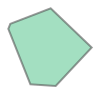

[Segment2D(Point2D(6.26716918814074, 4.82406015366499), Point2D(6.44714659937083, 4.37178376287489)), Segment2D(Point2D(6.44714659937083, 4.37178376287489), Point2D(6.65315939573486, 4.35807845125143)), Segment2D(Point2D(6.65315939573486, 4.35807845125143), Point2D(6.94695713678753, 4.67173464123568)), Segment2D(Point2D(6.61255721492166, 4.99147349713139), Point2D(6.94695713678753, 4.67173464123568)), Segment2D(Point2D(6.28354336566448, 4.86521433957799), Point2D(6.61255721492166, 4.99147349713139)), Segment2D(Point2D(6.26716918814074, 4.82406015366499), Point2D(6.28354336566448, 4.86521433957799))] 

{Point2D(5.58048249917401, 7.64034226210044), Point2D(5.79880861287113, 7.25707984281365), Point2D(6.07507968637983, 7.86389006850748), Point2D(6.19424131212414, 7.42478979576327), Point2D(6.01135457016447, 7.24638685374220), Point2D(5.67130109832642, 7.79306744608673)}
------------
Point2D(5.90370761883734, 7.56092025249818)
6 {Point2D(5.58048249917401, 7.64034226210044), Point2D(5.79880

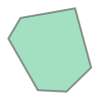

[Segment2D(Point2D(5.58048249917401, 7.64034226210044), Point2D(5.79880861287113, 7.25707984281365)), Segment2D(Point2D(5.79880861287113, 7.25707984281365), Point2D(6.01135457016447, 7.24638685374220)), Segment2D(Point2D(6.01135457016447, 7.24638685374220), Point2D(6.19424131212414, 7.42478979576327)), Segment2D(Point2D(6.07507968637983, 7.86389006850748), Point2D(6.19424131212414, 7.42478979576327)), Segment2D(Point2D(5.67130109832642, 7.79306744608673), Point2D(6.07507968637983, 7.86389006850748)), Segment2D(Point2D(5.58048249917401, 7.64034226210044), Point2D(5.67130109832642, 7.79306744608673))] 

{Point2D(6.11193993730836, 7.91580698278131), Point2D(6.07507968637983, 7.86389006850748), Point2D(5.93521264136664, 8.41027238517415), Point2D(6.01741745483336, 8.35967437805769), Point2D(5.67130109832642, 7.79306744608673), Point2D(5.47631666038348, 8.22736354468462)}
------------
Point2D(5.81082800110436, 8.09045163138957)
6 {Point2D(6.11193993730836, 7.91580698278131), Point2D(6.07507

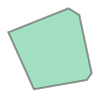

[Segment2D(Point2D(5.47631666038348, 8.22736354468462), Point2D(5.67130109832642, 7.79306744608673)), Segment2D(Point2D(5.67130109832642, 7.79306744608673), Point2D(6.07507968637983, 7.86389006850748)), Segment2D(Point2D(6.07507968637983, 7.86389006850748), Point2D(6.11193993730836, 7.91580698278131)), Segment2D(Point2D(6.01741745483336, 8.35967437805769), Point2D(6.11193993730836, 7.91580698278131)), Segment2D(Point2D(5.93521264136664, 8.41027238517415), Point2D(6.01741745483336, 8.35967437805769)), Segment2D(Point2D(5.47631666038348, 8.22736354468462), Point2D(5.93521264136664, 8.41027238517415))] 

{Point2D(5.29005931590656, 7.57470530469487), Point2D(5.04800406264277, 8.02913540518580), Point2D(5.47286359366332, 8.22874686083451), Point2D(5.58048249917401, 7.64034226210044), Point2D(5.01817374200949, 7.92736182860668), Point2D(5.67130109832642, 7.79306744608673), Point2D(5.47631666038348, 8.22736354468462)}
------------
Point2D(5.35635220814889, 7.88640718490665)
7 {Point2D(5.29005

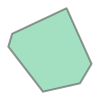

[Segment2D(Point2D(5.01817374200949, 7.92736182860668), Point2D(5.29005931590656, 7.57470530469487)), Segment2D(Point2D(5.29005931590656, 7.57470530469487), Point2D(5.58048249917401, 7.64034226210044)), Segment2D(Point2D(5.58048249917401, 7.64034226210044), Point2D(5.67130109832642, 7.79306744608673)), Segment2D(Point2D(5.47631666038348, 8.22736354468462), Point2D(5.67130109832642, 7.79306744608673)), Segment2D(Point2D(5.47286359366332, 8.22874686083451), Point2D(5.47631666038348, 8.22736354468462)), Segment2D(Point2D(5.04800406264277, 8.02913540518580), Point2D(5.47286359366332, 8.22874686083451)), Segment2D(Point2D(5.01817374200949, 7.92736182860668), Point2D(5.04800406264277, 8.02913540518580))] 

{Point2D(5.36962750268516, 4.83855125012590), Point2D(5.20530354839087, 4.47028320388734), Point2D(5.06244942396533, 5.19062204815711), Point2D(5.04197306190771, 4.48447406622687), Point2D(4.76133720841795, 4.85099644133179)}
------------
Point2D(5.07396946469119, 4.80974967816068)
5 {Poin

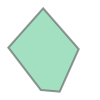

[Segment2D(Point2D(4.76133720841795, 4.85099644133179), Point2D(5.04197306190771, 4.48447406622687)), Segment2D(Point2D(5.04197306190771, 4.48447406622687), Point2D(5.20530354839087, 4.47028320388734)), Segment2D(Point2D(5.20530354839087, 4.47028320388734), Point2D(5.36962750268516, 4.83855125012590)), Segment2D(Point2D(5.06244942396533, 5.19062204815711), Point2D(5.36962750268516, 4.83855125012590)), Segment2D(Point2D(4.76133720841795, 4.85099644133179), Point2D(5.06244942396533, 5.19062204815711))] 

{Point2D(4.58815666057012, 4.84072007416621), Point2D(4.33808501601273, 5.28021253976185), Point2D(5.06481377885843, 5.25249674992112), Point2D(4.61846054336763, 5.45139670119317), Point2D(5.06244942396533, 5.19062204815711), Point2D(4.76133720841795, 4.85099644133179)}
------------
Point2D(4.68293939252695, 5.15643711576484)
6 {Point2D(4.58815666057012, 4.84072007416621), Point2D(4.33808501601273, 5.28021253976185), Point2D(5.06481377885843, 5.25249674992112), Point2D(4.61846054336763, 

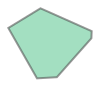

[Segment2D(Point2D(4.33808501601273, 5.28021253976185), Point2D(4.58815666057012, 4.84072007416621)), Segment2D(Point2D(4.58815666057012, 4.84072007416621), Point2D(4.76133720841795, 4.85099644133179)), Segment2D(Point2D(4.76133720841795, 4.85099644133179), Point2D(5.06244942396533, 5.19062204815711)), Segment2D(Point2D(5.06244942396533, 5.19062204815711), Point2D(5.06481377885843, 5.25249674992112)), Segment2D(Point2D(4.61846054336763, 5.45139670119317), Point2D(5.06481377885843, 5.25249674992112)), Segment2D(Point2D(4.33808501601273, 5.28021253976185), Point2D(4.61846054336763, 5.45139670119317))] 

{Point2D(4.58815666057012, 4.84072007416621), Point2D(4.54901461094557, 4.23295338750661), Point2D(4.42163433377931, 4.64404160999903), Point2D(4.69303590669961, 4.21094545059717), Point2D(5.04197306190771, 4.48447406622687), Point2D(4.76133720841795, 4.85099644133179)}
------------
Point2D(4.71961147391051, 4.53842775093813)
6 {Point2D(4.58815666057012, 4.84072007416621), Point2D(4.54901

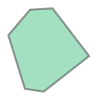

[Segment2D(Point2D(4.42163433377931, 4.64404160999903), Point2D(4.54901461094557, 4.23295338750661)), Segment2D(Point2D(4.54901461094557, 4.23295338750661), Point2D(4.69303590669961, 4.21094545059717)), Segment2D(Point2D(4.69303590669961, 4.21094545059717), Point2D(5.04197306190771, 4.48447406622687)), Segment2D(Point2D(4.76133720841795, 4.85099644133179), Point2D(5.04197306190771, 4.48447406622687)), Segment2D(Point2D(4.58815666057012, 4.84072007416621), Point2D(4.76133720841795, 4.85099644133179)), Segment2D(Point2D(4.42163433377931, 4.64404160999903), Point2D(4.58815666057012, 4.84072007416621))] 

{Point2D(5.29329274271796, 4.01105223766345), Point2D(5.31699119821057, 4.33640708257810), Point2D(4.69303590669961, 4.21094545059717), Point2D(5.20530354839087, 4.47028320388734), Point2D(4.96944862364537, 3.80182245123166), Point2D(5.04197306190771, 4.48447406622687)}
------------
Point2D(5.01739077933142, 4.15855428331497)
6 {Point2D(5.29329274271796, 4.01105223766345), Point2D(5.31699

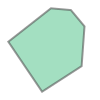

[Segment2D(Point2D(4.69303590669961, 4.21094545059717), Point2D(4.96944862364537, 3.80182245123166)), Segment2D(Point2D(4.96944862364537, 3.80182245123166), Point2D(5.29329274271796, 4.01105223766345)), Segment2D(Point2D(5.29329274271796, 4.01105223766345), Point2D(5.31699119821057, 4.33640708257810)), Segment2D(Point2D(5.20530354839087, 4.47028320388734), Point2D(5.31699119821057, 4.33640708257810)), Segment2D(Point2D(5.04197306190771, 4.48447406622687), Point2D(5.20530354839087, 4.47028320388734)), Segment2D(Point2D(4.69303590669961, 4.21094545059717), Point2D(5.04197306190771, 4.48447406622687))] 

{Point2D(7.45512376008710, 5.57058684901257), Point2D(7.22003888723110, 5.18390333905947), Point2D(6.82885178721855, 5.35315395258872), Point2D(7.31968982189145, 5.76149924386126), Point2D(6.93585404427303, 5.79919705906502)}
------------
Point2D(7.13024511901839, 5.50370864551345)
5 {Point2D(7.45512376008710, 5.57058684901257), Point2D(7.22003888723110, 5.18390333905947), Point2D(6.82885

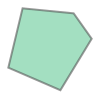

[Segment2D(Point2D(6.82885178721855, 5.35315395258872), Point2D(7.22003888723110, 5.18390333905947)), Segment2D(Point2D(7.22003888723110, 5.18390333905947), Point2D(7.45512376008710, 5.57058684901257)), Segment2D(Point2D(7.31968982189145, 5.76149924386126), Point2D(7.45512376008710, 5.57058684901257)), Segment2D(Point2D(6.93585404427303, 5.79919705906502), Point2D(7.31968982189145, 5.76149924386126)), Segment2D(Point2D(6.82885178721855, 5.35315395258872), Point2D(6.93585404427303, 5.79919705906502))] 

{Point2D(0.536623651595150, 4.79464880133266), Point2D(0.629792928219185, 4.14611700229444), Point2D(0.879870674725248, 4.52404314264791), Point2D(0.378021015824725, 4.73542663280903), Point2D(0.237645871388059, 4.36779552737766), Point2D(0.816865072598903, 4.25251040839243)}
------------
Point2D(0.56479250805572, 4.46402627234662)
6 {Point2D(0.536623651595150, 4.79464880133266), Point2D(0.629792928219185, 4.14611700229444), Point2D(0.879870674725248, 4.52404314264791), Point2D(0.3780210

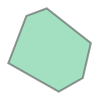

[Segment2D(Point2D(0.237645871388059, 4.36779552737766), Point2D(0.629792928219185, 4.14611700229444)), Segment2D(Point2D(0.629792928219185, 4.14611700229444), Point2D(0.816865072598903, 4.25251040839243)), Segment2D(Point2D(0.816865072598903, 4.25251040839243), Point2D(0.879870674725248, 4.52404314264791)), Segment2D(Point2D(0.536623651595150, 4.79464880133266), Point2D(0.879870674725248, 4.52404314264791)), Segment2D(Point2D(0.378021015824725, 4.73542663280903), Point2D(0.536623651595150, 4.79464880133266)), Segment2D(Point2D(0.237645871388059, 4.36779552737766), Point2D(0.378021015824725, 4.73542663280903))] 

{Point2D(0.560105973768363, 3.80071434908720), Point2D(0.629792928219185, 4.14611700229444), Point2D(0.237645871388059, 4.36779552737766)}
------------
Point2D(0.323892194824751, 4.03787606773047)
3 {Point2D(0.560105973768363, 3.80071434908720), Point2D(0.629792928219185, 4.14611700229444), Point2D(0.237645871388059, 4.36779552737766)}
Triangle(Point2D(0.237645871388059, 4.367

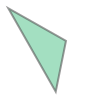

[Segment2D(Point2D(0.237645871388059, 4.36779552737766), Point2D(0.560105973768363, 3.80071434908720)), Segment2D(Point2D(0.560105973768363, 3.80071434908720), Point2D(0.629792928219185, 4.14611700229444)), Segment2D(Point2D(0.237645871388059, 4.36779552737766), Point2D(0.629792928219185, 4.14611700229444))] 

{Point2D(0.378021015824725, 4.73542663280903), Point2D(0.237645871388059, 4.36779552737766)}
{Point2D(1.83026333210457, 3.92441047833058), Point2D(1.18068630181161, 4.01229415338714), Point2D(1.83347792095711, 3.88693718420646), Point2D(1.45983516290551, 4.22977074905960), Point2D(1.16714204353871, 3.78620221957206), Point2D(1.55460083349911, 3.57207738802356)}
------------
Point2D(1.47925843770285, 3.89122642008685)
6 {Point2D(1.83026333210457, 3.92441047833058), Point2D(1.18068630181161, 4.01229415338714), Point2D(1.83347792095711, 3.88693718420646), Point2D(1.45983516290551, 4.22977074905960), Point2D(1.16714204353871, 3.78620221957206), Point2D(1.55460083349911, 3.57207738802

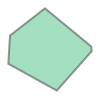

[Segment2D(Point2D(1.16714204353871, 3.78620221957206), Point2D(1.55460083349911, 3.57207738802356)), Segment2D(Point2D(1.55460083349911, 3.57207738802356), Point2D(1.83347792095711, 3.88693718420646)), Segment2D(Point2D(1.83026333210457, 3.92441047833058), Point2D(1.83347792095711, 3.88693718420646)), Segment2D(Point2D(1.45983516290551, 4.22977074905960), Point2D(1.83026333210457, 3.92441047833058)), Segment2D(Point2D(1.18068630181161, 4.01229415338714), Point2D(1.45983516290551, 4.22977074905960)), Segment2D(Point2D(1.16714204353871, 3.78620221957206), Point2D(1.18068630181161, 4.01229415338714))] 

{Point2D(3.85367528685706, 7.11471158119634), Point2D(3.82441292218505, 7.38800059424757), Point2D(3.28870957484686, 7.02285940802365), Point2D(3.21805557468210, 7.20454821159569), Point2D(3.40473578656704, 7.55269922171094), Point2D(3.72855531579707, 6.97138506673174)}
------------
Point2D(3.54284630130742, 7.23644876945271)
6 {Point2D(3.85367528685706, 7.11471158119634), Point2D(3.82441

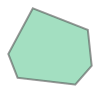

[Segment2D(Point2D(3.21805557468210, 7.20454821159569), Point2D(3.28870957484686, 7.02285940802365)), Segment2D(Point2D(3.28870957484686, 7.02285940802365), Point2D(3.72855531579707, 6.97138506673174)), Segment2D(Point2D(3.72855531579707, 6.97138506673174), Point2D(3.85367528685706, 7.11471158119634)), Segment2D(Point2D(3.82441292218505, 7.38800059424757), Point2D(3.85367528685706, 7.11471158119634)), Segment2D(Point2D(3.40473578656704, 7.55269922171094), Point2D(3.82441292218505, 7.38800059424757)), Segment2D(Point2D(3.21805557468210, 7.20454821159569), Point2D(3.40473578656704, 7.55269922171094))] 

{Point2D(2.75682793520539, 7.30730845789962), Point2D(2.72565035128909, 6.76180929187364), Point2D(3.16845880039806, 6.77041400738353), Point2D(3.28870957484686, 7.02285940802365), Point2D(3.21805557468210, 7.20454821159569), Point2D(2.65421366067359, 6.86098362929099)}
------------
Point2D(2.95704132105962, 7.00864461004816)
6 {Point2D(2.75682793520539, 7.30730845789962), Point2D(2.72565

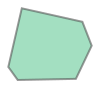

[Segment2D(Point2D(2.65421366067359, 6.86098362929099), Point2D(2.72565035128909, 6.76180929187364)), Segment2D(Point2D(2.72565035128909, 6.76180929187364), Point2D(3.16845880039806, 6.77041400738353)), Segment2D(Point2D(3.16845880039806, 6.77041400738353), Point2D(3.28870957484686, 7.02285940802365)), Segment2D(Point2D(3.21805557468210, 7.20454821159569), Point2D(3.28870957484686, 7.02285940802365)), Segment2D(Point2D(2.75682793520539, 7.30730845789962), Point2D(3.21805557468210, 7.20454821159569)), Segment2D(Point2D(2.65421366067359, 6.86098362929099), Point2D(2.75682793520539, 7.30730845789962))] 

{Point2D(4.99161815964784, 9.65838220719573), Point2D(5.04375046362152, 9.00381776985975), Point2D(5.31633904979646, 9.49306044652631), Point2D(4.71541380359318, 9.31191662264407), Point2D(4.81487486342442, 9.08282124836159), Point2D(5.36561779868043, 9.29732895314780)}
------------
Point2D(5.03721878817041, 9.32515295627108)
6 {Point2D(4.99161815964784, 9.65838220719573), Point2D(5.04375

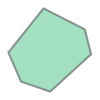

[Segment2D(Point2D(4.71541380359318, 9.31191662264407), Point2D(4.81487486342442, 9.08282124836159)), Segment2D(Point2D(4.81487486342442, 9.08282124836159), Point2D(5.04375046362152, 9.00381776985975)), Segment2D(Point2D(5.04375046362152, 9.00381776985975), Point2D(5.36561779868043, 9.29732895314780)), Segment2D(Point2D(5.31633904979646, 9.49306044652631), Point2D(5.36561779868043, 9.29732895314780)), Segment2D(Point2D(4.99161815964784, 9.65838220719573), Point2D(5.31633904979646, 9.49306044652631)), Segment2D(Point2D(4.71541380359318, 9.31191662264407), Point2D(4.99161815964784, 9.65838220719573))] 

{Point2D(0, 4.84851540530597), Point2D(0, 3.96460116227280), Point2D(5.31633904979646, 9.49306044652631), Point2D(5.36561779868043, 9.29732895314780), Point2D(5.62232838370500, 9.15699419678994)}
------------
Point2D(5.64169099316832, 9.47733916546647)
5 {Point2D(0, 4.84851540530597), Point2D(0, 3.96460116227280), Point2D(5.31633904979646, 9.49306044652631), Point2D(5.36561779868043, 9.29

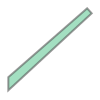

[Segment2D(Point2D(0, 3.96460116227280), Point2D(5.62232838370500, 9.15699419678994)), Segment2D(Point2D(5.31633904979646, 9.49306044652631), Point2D(5.62232838370500, 9.15699419678994)), Segment2D(Point2D(0, 4.84851540530597), Point2D(5.31633904979646, 9.49306044652631)), Segment2D(Point2D(0, 3.96460116227280), Point2D(0, 4.84851540530597))] 

{Point2D(5.31633904979646, 9.49306044652631), Point2D(5, 10), Point2D(4.99161815964784, 9.65838220719573), Point2D(0, 3.96460116227280)}
------------
Point2D(5.28790713406535, 9.81754876973974)
4 {Point2D(5.31633904979646, 9.49306044652631), Point2D(5, 10), Point2D(4.99161815964784, 9.65838220719573), Point2D(0, 3.96460116227280)}
Triangle(Point2D(0, 3.9646011622728), Point2D(5.31633904979646, 9.49306044652631), Point2D(5, 10))


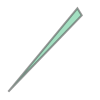

[Segment2D(Point2D(0, 3.96460116227280), Point2D(5.31633904979646, 9.49306044652631)), Segment2D(Point2D(5, 10), Point2D(5.31633904979646, 9.49306044652631)), Segment2D(Point2D(0, 3.96460116227280), Point2D(5, 10))] 

{Point2D(4.40901144965122, 9.40822785973101), Point2D(4.71541380359318, 9.31191662264407), Point2D(4.99161815964784, 9.65838220719573)}
------------
Point2D(4.656606301964, 9.62857941865707)
3 {Point2D(4.40901144965122, 9.40822785973101), Point2D(4.71541380359318, 9.31191662264407), Point2D(4.99161815964784, 9.65838220719573)}
Triangle(Point2D(4.40901144965122, 9.40822785973101), Point2D(4.71541380359318, 9.31191662264407), Point2D(4.99161815964784, 9.65838220719573))


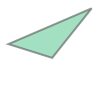

[Segment2D(Point2D(4.40901144965122, 9.40822785973101), Point2D(4.71541380359318, 9.31191662264407)), Segment2D(Point2D(4.71541380359318, 9.31191662264407), Point2D(4.99161815964784, 9.65838220719573)), Segment2D(Point2D(4.40901144965122, 9.40822785973101), Point2D(4.99161815964784, 9.65838220719573))] 

{Point2D(5.30489161115244, 8.64179883931586), Point2D(5.17071939644868, 8.69196753548836), Point2D(5.68205649285346, 8.88210082254335), Point2D(5.62232838370500, 9.15699419678994), Point2D(5.04375046362152, 9.00381776985975), Point2D(5.36561779868043, 9.29732895314780)}
------------
Point2D(5.36312329041591, 8.96776277969809)
6 {Point2D(5.30489161115244, 8.64179883931586), Point2D(5.17071939644868, 8.69196753548836), Point2D(5.68205649285346, 8.88210082254335), Point2D(5.62232838370500, 9.15699419678994), Point2D(5.04375046362152, 9.00381776985975), Point2D(5.36561779868043, 9.29732895314780)}
Polygon(Point2D(5.04375046362152, 9.00381776985975), Point2D(5.17071939644868, 8.691967535488

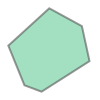

[Segment2D(Point2D(5.04375046362152, 9.00381776985975), Point2D(5.17071939644868, 8.69196753548836)), Segment2D(Point2D(5.17071939644868, 8.69196753548836), Point2D(5.30489161115244, 8.64179883931586)), Segment2D(Point2D(5.30489161115244, 8.64179883931586), Point2D(5.68205649285346, 8.88210082254335)), Segment2D(Point2D(5.62232838370500, 9.15699419678994), Point2D(5.68205649285346, 8.88210082254335)), Segment2D(Point2D(5.36561779868043, 9.29732895314780), Point2D(5.62232838370500, 9.15699419678994)), Segment2D(Point2D(5.04375046362152, 9.00381776985975), Point2D(5.36561779868043, 9.29732895314780))] 

{Point2D(4.72999070096661, 8.42390427449627), Point2D(5.17071939644868, 8.69196753548836), Point2D(4.79301530879549, 8.41193964035838), Point2D(4.51471259626871, 8.76137328163219), Point2D(5.04375046362152, 9.00381776985975), Point2D(4.81487486342442, 9.08282124836159)}
------------
Point2D(4.84038989610094, 8.75493337021222)
6 {Point2D(4.72999070096661, 8.42390427449627), Point2D(5.17071

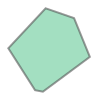

[Segment2D(Point2D(4.51471259626871, 8.76137328163219), Point2D(4.72999070096661, 8.42390427449627)), Segment2D(Point2D(4.72999070096661, 8.42390427449627), Point2D(4.79301530879549, 8.41193964035838)), Segment2D(Point2D(4.79301530879549, 8.41193964035838), Point2D(5.17071939644868, 8.69196753548836)), Segment2D(Point2D(5.04375046362152, 9.00381776985975), Point2D(5.17071939644868, 8.69196753548836)), Segment2D(Point2D(4.81487486342442, 9.08282124836159), Point2D(5.04375046362152, 9.00381776985975)), Segment2D(Point2D(4.51471259626871, 8.76137328163219), Point2D(4.81487486342442, 9.08282124836159))] 

{Point2D(4.40901144965122, 9.40822785973101), Point2D(4.16801163915913, 9.04403954988305), Point2D(4.33285030994469, 8.79138706252590), Point2D(4.51471259626871, 8.76137328163219), Point2D(4.71541380359318, 9.31191662264407), Point2D(4.81487486342442, 9.08282124836159)}
------------
Point2D(4.48600966124685, 9.0858471906083)
6 {Point2D(4.40901144965122, 9.40822785973101), Point2D(4.168011

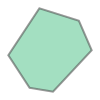

[Segment2D(Point2D(4.16801163915913, 9.04403954988305), Point2D(4.33285030994469, 8.79138706252590)), Segment2D(Point2D(4.33285030994469, 8.79138706252590), Point2D(4.51471259626871, 8.76137328163219)), Segment2D(Point2D(4.51471259626871, 8.76137328163219), Point2D(4.81487486342442, 9.08282124836159)), Segment2D(Point2D(4.71541380359318, 9.31191662264407), Point2D(4.81487486342442, 9.08282124836159)), Segment2D(Point2D(4.40901144965122, 9.40822785973101), Point2D(4.71541380359318, 9.31191662264407)), Segment2D(Point2D(4.16801163915913, 9.04403954988305), Point2D(4.40901144965122, 9.40822785973101))] 

{Point2D(4.40901144965122, 9.40822785973101), Point2D(4.16801163915913, 9.04403954988305), Point2D(3.89654413143874, 9.08152755106984)}
------------
Point2D(4.08218365278507, 9.35307705186248)
3 {Point2D(4.40901144965122, 9.40822785973101), Point2D(4.16801163915913, 9.04403954988305), Point2D(3.89654413143874, 9.08152755106984)}
Triangle(Point2D(3.89654413143874, 9.08152755106984), Point2

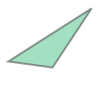

[Segment2D(Point2D(3.89654413143874, 9.08152755106984), Point2D(4.16801163915913, 9.04403954988305)), Segment2D(Point2D(4.16801163915913, 9.04403954988305), Point2D(4.40901144965122, 9.40822785973101)), Segment2D(Point2D(3.89654413143874, 9.08152755106984), Point2D(4.40901144965122, 9.40822785973101))] 

{Point2D(5.30489161115244, 8.64179883931586), Point2D(5.68205649285346, 8.88210082254335), Point2D(5.47286359366332, 8.22874686083451), Point2D(5.86131119657053, 8.77775138818831), Point2D(5.93521264136664, 8.41027238517415), Point2D(5.47631666038348, 8.22736354468462)}
------------
Point2D(5.62493191528732, 8.5568422467017)
6 {Point2D(5.30489161115244, 8.64179883931586), Point2D(5.68205649285346, 8.88210082254335), Point2D(5.47286359366332, 8.22874686083451), Point2D(5.86131119657053, 8.77775138818831), Point2D(5.93521264136664, 8.41027238517415), Point2D(5.47631666038348, 8.22736354468462)}
Polygon(Point2D(5.30489161115244, 8.64179883931586), Point2D(5.47286359366332, 8.2287468608345

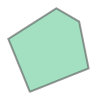

[Segment2D(Point2D(5.30489161115244, 8.64179883931586), Point2D(5.47286359366332, 8.22874686083451)), Segment2D(Point2D(5.47286359366332, 8.22874686083451), Point2D(5.47631666038348, 8.22736354468462)), Segment2D(Point2D(5.47631666038348, 8.22736354468462), Point2D(5.93521264136664, 8.41027238517415)), Segment2D(Point2D(5.86131119657053, 8.77775138818831), Point2D(5.93521264136664, 8.41027238517415)), Segment2D(Point2D(5.68205649285346, 8.88210082254335), Point2D(5.86131119657053, 8.77775138818831)), Segment2D(Point2D(5.30489161115244, 8.64179883931586), Point2D(5.68205649285346, 8.88210082254335))] 

{Point2D(5.30489161115244, 8.64179883931586), Point2D(5.17071939644868, 8.69196753548836), Point2D(5.04800406264277, 8.02913540518580), Point2D(4.79301530879549, 8.41193964035838), Point2D(5.47286359366332, 8.22874686083451)}
------------
Point2D(5.13497405329454, 8.35759566827274)
5 {Point2D(5.30489161115244, 8.64179883931586), Point2D(5.17071939644868, 8.69196753548836), Point2D(5.04800

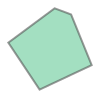

[Segment2D(Point2D(4.79301530879549, 8.41193964035838), Point2D(5.04800406264277, 8.02913540518580)), Segment2D(Point2D(5.04800406264277, 8.02913540518580), Point2D(5.47286359366332, 8.22874686083451)), Segment2D(Point2D(5.30489161115244, 8.64179883931586), Point2D(5.47286359366332, 8.22874686083451)), Segment2D(Point2D(5.17071939644868, 8.69196753548836), Point2D(5.30489161115244, 8.64179883931586)), Segment2D(Point2D(4.79301530879549, 8.41193964035838), Point2D(5.17071939644868, 8.69196753548836))] 

{Point2D(5.86131119657053, 8.77775138818831), Point2D(5.93521264136664, 8.41027238517415), Point2D(6.01741745483336, 8.35967437805769), Point2D(6.24696859209566, 8.98370246637243), Point2D(6.44813344772824, 8.81575507108863), Point2D(6.45467693838406, 8.50098895058835)}
------------
Point2D(6.164711655421, 8.66539403426059)
6 {Point2D(5.86131119657053, 8.77775138818831), Point2D(5.93521264136664, 8.41027238517415), Point2D(6.01741745483336, 8.35967437805769), Point2D(6.24696859209566, 8.

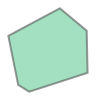

[Segment2D(Point2D(5.86131119657053, 8.77775138818831), Point2D(5.93521264136664, 8.41027238517415)), Segment2D(Point2D(5.93521264136664, 8.41027238517415), Point2D(6.01741745483336, 8.35967437805769)), Segment2D(Point2D(6.01741745483336, 8.35967437805769), Point2D(6.45467693838406, 8.50098895058835)), Segment2D(Point2D(6.44813344772824, 8.81575507108863), Point2D(6.45467693838406, 8.50098895058835)), Segment2D(Point2D(6.24696859209566, 8.98370246637243), Point2D(6.44813344772824, 8.81575507108863)), Segment2D(Point2D(5.86131119657053, 8.77775138818831), Point2D(6.24696859209566, 8.98370246637243))] 

{Point2D(5.68205649285346, 8.88210082254335), Point2D(0, 4.84851540530597), Point2D(5.86131119657053, 8.77775138818831), Point2D(6.24696859209566, 8.98370246637243), Point2D(5.62232838370500, 9.15699419678994)}
------------
Point2D(5.9366872441767, 9.09238524660089)
5 {Point2D(5.68205649285346, 8.88210082254335), Point2D(0, 4.84851540530597), Point2D(5.86131119657053, 8.77775138818831), P

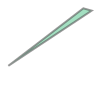

[Segment2D(Point2D(0, 4.84851540530597), Point2D(6.24696859209566, 8.98370246637243)), Segment2D(Point2D(5.62232838370500, 9.15699419678994), Point2D(6.24696859209566, 8.98370246637243)), Segment2D(Point2D(0, 4.84851540530597), Point2D(5.62232838370500, 9.15699419678994))] 

{Point2D(4.72999070096661, 8.42390427449627), Point2D(4.35939572603270, 8.11040397789086), Point2D(5.04800406264277, 8.02913540518580), Point2D(4.79301530879549, 8.41193964035838), Point2D(4.69249600658036, 7.75273548788700), Point2D(4.35786263421321, 8.07285022601454), Point2D(5.01817374200949, 7.92736182860668)}
------------
Point2D(4.71139574444663, 8.07544700008684)
7 {Point2D(4.72999070096661, 8.42390427449627), Point2D(4.35939572603270, 8.11040397789086), Point2D(5.04800406264277, 8.02913540518580), Point2D(4.79301530879549, 8.41193964035838), Point2D(4.69249600658036, 7.75273548788700), Point2D(4.35786263421321, 8.07285022601454), Point2D(5.01817374200949, 7.92736182860668)}
Polygon(Point2D(4.35786263421321,

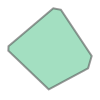

[Segment2D(Point2D(4.35786263421321, 8.07285022601454), Point2D(4.69249600658036, 7.75273548788700)), Segment2D(Point2D(4.69249600658036, 7.75273548788700), Point2D(5.01817374200949, 7.92736182860668)), Segment2D(Point2D(5.01817374200949, 7.92736182860668), Point2D(5.04800406264277, 8.02913540518580)), Segment2D(Point2D(4.79301530879549, 8.41193964035838), Point2D(5.04800406264277, 8.02913540518580)), Segment2D(Point2D(4.72999070096661, 8.42390427449627), Point2D(4.79301530879549, 8.41193964035838)), Segment2D(Point2D(4.35939572603270, 8.11040397789086), Point2D(4.72999070096661, 8.42390427449627)), Segment2D(Point2D(4.35786263421321, 8.07285022601454), Point2D(4.35939572603270, 8.11040397789086))] 

{Point2D(6.11193993730836, 7.91580698278131), Point2D(6.01741745483336, 8.35967437805769), Point2D(6.45467693838406, 8.50098895058835), Point2D(6.58161873273345, 8.38928437310411), Point2D(6.58750612081824, 7.97218803494825)}
------------
Point2D(6.31577151871226, 8.19798040079657)
5 {Poin

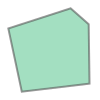

[Segment2D(Point2D(6.01741745483336, 8.35967437805769), Point2D(6.11193993730836, 7.91580698278131)), Segment2D(Point2D(6.11193993730836, 7.91580698278131), Point2D(6.58750612081824, 7.97218803494825)), Segment2D(Point2D(6.58161873273345, 8.38928437310411), Point2D(6.58750612081824, 7.97218803494825)), Segment2D(Point2D(6.45467693838406, 8.50098895058835), Point2D(6.58161873273345, 8.38928437310411)), Segment2D(Point2D(6.01741745483336, 8.35967437805769), Point2D(6.45467693838406, 8.50098895058835))] 

{Point2D(4.72999070096661, 8.42390427449627), Point2D(4.04848501707951, 8.43731682210541), Point2D(4.35939572603270, 8.11040397789086), Point2D(4.33285030994469, 8.79138706252590), Point2D(4.51471259626871, 8.76137328163219)}
------------
Point2D(4.38327186540716, 8.46332880448877)
5 {Point2D(4.72999070096661, 8.42390427449627), Point2D(4.04848501707951, 8.43731682210541), Point2D(4.35939572603270, 8.11040397789086), Point2D(4.33285030994469, 8.79138706252590), Point2D(4.51471259626871, 

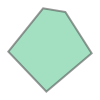

[Segment2D(Point2D(4.04848501707951, 8.43731682210541), Point2D(4.35939572603270, 8.11040397789086)), Segment2D(Point2D(4.35939572603270, 8.11040397789086), Point2D(4.72999070096661, 8.42390427449627)), Segment2D(Point2D(4.51471259626871, 8.76137328163219), Point2D(4.72999070096661, 8.42390427449627)), Segment2D(Point2D(4.33285030994469, 8.79138706252590), Point2D(4.51471259626871, 8.76137328163219)), Segment2D(Point2D(4.04848501707951, 8.43731682210541), Point2D(4.33285030994469, 8.79138706252590))] 

{Point2D(3.56645846157367, 5.92560092394009), Point2D(3.82985661634508, 6.07735915327734), Point2D(3.30313879964033, 6.46870213625036), Point2D(3.25528461773003, 6.35668167487594), Point2D(3.78103466965538, 6.55533988508952), Point2D(3.80554403606048, 6.53604839159122), Point2D(3.42670878017809, 5.96447269674418)}
------------
Point2D(3.57596431765725, 6.26377307117006)
7 {Point2D(3.56645846157367, 5.92560092394009), Point2D(3.82985661634508, 6.07735915327734), Point2D(3.30313879964033, 

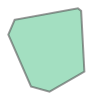

[Segment2D(Point2D(3.25528461773003, 6.35668167487594), Point2D(3.42670878017809, 5.96447269674418)), Segment2D(Point2D(3.42670878017809, 5.96447269674418), Point2D(3.56645846157367, 5.92560092394009)), Segment2D(Point2D(3.56645846157367, 5.92560092394009), Point2D(3.82985661634508, 6.07735915327734)), Segment2D(Point2D(3.80554403606048, 6.53604839159122), Point2D(3.82985661634508, 6.07735915327734)), Segment2D(Point2D(3.78103466965538, 6.55533988508952), Point2D(3.80554403606048, 6.53604839159122)), Segment2D(Point2D(3.30313879964033, 6.46870213625036), Point2D(3.78103466965538, 6.55533988508952)), Segment2D(Point2D(3.25528461773003, 6.35668167487594), Point2D(3.30313879964033, 6.46870213625036))] 

{Point2D(4.37598277792427, 6.41247556205337), Point2D(3.82985661634508, 6.07735915327734), Point2D(4.22081362212900, 6.57212271765451), Point2D(4.18892708573241, 5.94897003989837), Point2D(4.18037776722170, 5.94469663354886), Point2D(3.80554403606048, 6.53604839159122)}
------------
Point2

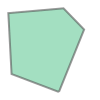

[Segment2D(Point2D(3.80554403606048, 6.53604839159122), Point2D(3.82985661634508, 6.07735915327734)), Segment2D(Point2D(3.82985661634508, 6.07735915327734), Point2D(4.18037776722170, 5.94469663354886)), Segment2D(Point2D(4.18037776722170, 5.94469663354886), Point2D(4.18892708573241, 5.94897003989837)), Segment2D(Point2D(4.18892708573241, 5.94897003989837), Point2D(4.37598277792427, 6.41247556205337)), Segment2D(Point2D(4.22081362212900, 6.57212271765451), Point2D(4.37598277792427, 6.41247556205337)), Segment2D(Point2D(3.80554403606048, 6.53604839159122), Point2D(4.22081362212900, 6.57212271765451))] 

{Point2D(3.80554403606048, 6.53604839159122), Point2D(4.22081362212900, 6.57212271765451), Point2D(3.85367528685706, 7.11471158119634), Point2D(4.30957123545019, 7.00424666090378), Point2D(3.78103466965538, 6.55533988508952), Point2D(3.72855531579707, 6.97138506673174)}
------------
Point2D(4.0162666267834, 6.82316628892884)
6 {Point2D(3.80554403606048, 6.53604839159122), Point2D(4.220813

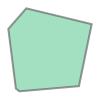

[Segment2D(Point2D(3.72855531579707, 6.97138506673174), Point2D(3.78103466965538, 6.55533988508952)), Segment2D(Point2D(3.78103466965538, 6.55533988508952), Point2D(3.80554403606048, 6.53604839159122)), Segment2D(Point2D(3.80554403606048, 6.53604839159122), Point2D(4.22081362212900, 6.57212271765451)), Segment2D(Point2D(4.22081362212900, 6.57212271765451), Point2D(4.30957123545019, 7.00424666090378)), Segment2D(Point2D(3.85367528685706, 7.11471158119634), Point2D(4.30957123545019, 7.00424666090378)), Segment2D(Point2D(3.72855531579707, 6.97138506673174), Point2D(3.85367528685706, 7.11471158119634))] 

{Point2D(3.16845880039806, 6.77041400738353), Point2D(3.30313879964033, 6.46870213625036), Point2D(3.28870957484686, 7.02285940802365), Point2D(3.78103466965538, 6.55533988508952), Point2D(3.72855531579707, 6.97138506673174)}
------------
Point2D(3.48666271946211, 6.75636279718462)
5 {Point2D(3.16845880039806, 6.77041400738353), Point2D(3.30313879964033, 6.46870213625036), Point2D(3.28870

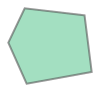

[Segment2D(Point2D(3.16845880039806, 6.77041400738353), Point2D(3.30313879964033, 6.46870213625036)), Segment2D(Point2D(3.30313879964033, 6.46870213625036), Point2D(3.78103466965538, 6.55533988508952)), Segment2D(Point2D(3.72855531579707, 6.97138506673174), Point2D(3.78103466965538, 6.55533988508952)), Segment2D(Point2D(3.28870957484686, 7.02285940802365), Point2D(3.72855531579707, 6.97138506673174)), Segment2D(Point2D(3.16845880039806, 6.77041400738353), Point2D(3.28870957484686, 7.02285940802365))] 

{Point2D(3.56645846157367, 5.92560092394009), Point2D(3.82985661634508, 6.07735915327734), Point2D(4.08670456781336, 5.53974656448167), Point2D(3.69278136744627, 5.48548662234834), Point2D(4.18037776722170, 5.94469663354886)}
------------
Point2D(3.86378809693854, 5.76421365555809)
5 {Point2D(3.56645846157367, 5.92560092394009), Point2D(3.82985661634508, 6.07735915327734), Point2D(4.08670456781336, 5.53974656448167), Point2D(3.69278136744627, 5.48548662234834), Point2D(4.18037776722170, 

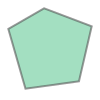

[Segment2D(Point2D(3.56645846157367, 5.92560092394009), Point2D(3.69278136744627, 5.48548662234834)), Segment2D(Point2D(3.69278136744627, 5.48548662234834), Point2D(4.08670456781336, 5.53974656448167)), Segment2D(Point2D(4.08670456781336, 5.53974656448167), Point2D(4.18037776722170, 5.94469663354886)), Segment2D(Point2D(3.82985661634508, 6.07735915327734), Point2D(4.18037776722170, 5.94469663354886)), Segment2D(Point2D(3.56645846157367, 5.92560092394009), Point2D(3.82985661634508, 6.07735915327734))] 

{Point2D(2.72565035128909, 6.76180929187364), Point2D(3.16845880039806, 6.77041400738353), Point2D(3.30313879964033, 6.46870213625036), Point2D(2.81962682763461, 6.22651928692668), Point2D(3.25528461773003, 6.35668167487594), Point2D(2.66439780802932, 6.41338861861362)}
------------
Point2D(2.96645609240682, 6.52414976600858)
6 {Point2D(2.72565035128909, 6.76180929187364), Point2D(3.16845880039806, 6.77041400738353), Point2D(3.30313879964033, 6.46870213625036), Point2D(2.81962682763461, 

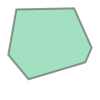

[Segment2D(Point2D(2.66439780802932, 6.41338861861362), Point2D(2.81962682763461, 6.22651928692668)), Segment2D(Point2D(2.81962682763461, 6.22651928692668), Point2D(3.25528461773003, 6.35668167487594)), Segment2D(Point2D(3.25528461773003, 6.35668167487594), Point2D(3.30313879964033, 6.46870213625036)), Segment2D(Point2D(3.16845880039806, 6.77041400738353), Point2D(3.30313879964033, 6.46870213625036)), Segment2D(Point2D(2.72565035128909, 6.76180929187364), Point2D(3.16845880039806, 6.77041400738353)), Segment2D(Point2D(2.66439780802932, 6.41338861861362), Point2D(2.72565035128909, 6.76180929187364))] 

{Point2D(3.05191244053625, 5.70621347862500), Point2D(2.81962682763461, 6.22651928692668), Point2D(3.25528461773003, 6.35668167487594), Point2D(2.79040982134883, 6.00128780090868), Point2D(3.42670878017809, 5.96447269674418)}
------------
Point2D(3.10566375504852, 6.05821714425559)
5 {Point2D(3.05191244053625, 5.70621347862500), Point2D(2.81962682763461, 6.22651928692668), Point2D(3.25528

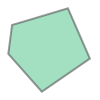

[Segment2D(Point2D(2.79040982134883, 6.00128780090868), Point2D(3.05191244053625, 5.70621347862500)), Segment2D(Point2D(3.05191244053625, 5.70621347862500), Point2D(3.42670878017809, 5.96447269674418)), Segment2D(Point2D(3.25528461773003, 6.35668167487594), Point2D(3.42670878017809, 5.96447269674418)), Segment2D(Point2D(2.81962682763461, 6.22651928692668), Point2D(3.25528461773003, 6.35668167487594)), Segment2D(Point2D(2.79040982134883, 6.00128780090868), Point2D(2.81962682763461, 6.22651928692668))] 

{Point2D(1.72247810536189, 6.31897126819292), Point2D(1.12007115824922, 6.59735554729514), Point2D(1.30898961392313, 6.78587917968632), Point2D(1.61774578630239, 6.76407425139212), Point2D(1.29340021594517, 6.19646331294936), Point2D(1.66004749145310, 6.23560231869859)}
------------
Point2D(1.43052501319936, 6.48902036652893)
6 {Point2D(1.72247810536189, 6.31897126819292), Point2D(1.12007115824922, 6.59735554729514), Point2D(1.30898961392313, 6.78587917968632), Point2D(1.61774578630239, 

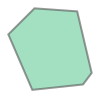

[Segment2D(Point2D(1.12007115824922, 6.59735554729514), Point2D(1.29340021594517, 6.19646331294936)), Segment2D(Point2D(1.29340021594517, 6.19646331294936), Point2D(1.66004749145310, 6.23560231869859)), Segment2D(Point2D(1.66004749145310, 6.23560231869859), Point2D(1.72247810536189, 6.31897126819292)), Segment2D(Point2D(1.61774578630239, 6.76407425139212), Point2D(1.72247810536189, 6.31897126819292)), Segment2D(Point2D(1.30898961392313, 6.78587917968632), Point2D(1.61774578630239, 6.76407425139212)), Segment2D(Point2D(1.12007115824922, 6.59735554729514), Point2D(1.30898961392313, 6.78587917968632))] 

{Point2D(2.72565035128909, 6.76180929187364), Point2D(2.21276911016649, 6.33693905088896), Point2D(2.17210267978409, 6.37124904792089), Point2D(2.66439780802932, 6.41338861861362), Point2D(2.19199445035895, 6.88663383676338), Point2D(2.65421366067359, 6.86098362929099), Point2D(2.15403179463928, 6.85236026686842)}
------------
Point2D(2.41822674648551, 6.62052878225098)
7 {Point2D(2.72565

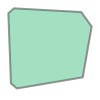

[Segment2D(Point2D(2.15403179463928, 6.85236026686842), Point2D(2.17210267978409, 6.37124904792089)), Segment2D(Point2D(2.17210267978409, 6.37124904792089), Point2D(2.21276911016649, 6.33693905088896)), Segment2D(Point2D(2.21276911016649, 6.33693905088896), Point2D(2.66439780802932, 6.41338861861362)), Segment2D(Point2D(2.66439780802932, 6.41338861861362), Point2D(2.72565035128909, 6.76180929187364)), Segment2D(Point2D(2.65421366067359, 6.86098362929099), Point2D(2.72565035128909, 6.76180929187364)), Segment2D(Point2D(2.19199445035895, 6.88663383676338), Point2D(2.65421366067359, 6.86098362929099)), Segment2D(Point2D(2.15403179463928, 6.85236026686842), Point2D(2.19199445035895, 6.88663383676338))] 

{Point2D(2.38768338453953, 5.82264925581135), Point2D(2.21276911016649, 6.33693905088896), Point2D(2.66439780802932, 6.41338861861362), Point2D(2.81962682763461, 6.22651928692668), Point2D(2.79040982134883, 6.00128780090868), Point2D(2.25209809385145, 5.91905211714947)}
------------
Point2

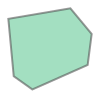

[Segment2D(Point2D(2.21276911016649, 6.33693905088896), Point2D(2.25209809385145, 5.91905211714947)), Segment2D(Point2D(2.25209809385145, 5.91905211714947), Point2D(2.38768338453953, 5.82264925581135)), Segment2D(Point2D(2.38768338453953, 5.82264925581135), Point2D(2.79040982134883, 6.00128780090868)), Segment2D(Point2D(2.79040982134883, 6.00128780090868), Point2D(2.81962682763461, 6.22651928692668)), Segment2D(Point2D(2.66439780802932, 6.41338861861362), Point2D(2.81962682763461, 6.22651928692668)), Segment2D(Point2D(2.21276911016649, 6.33693905088896), Point2D(2.66439780802932, 6.41338861861362))] 

{Point2D(1.31295372759057, 5.49355828540464), Point2D(1.55985858758704, 5.09684768672255), Point2D(1.96349810637318, 5.31366456702517), Point2D(1.79777689538719, 5.75526375217516), Point2D(1.37798698343782, 5.62860656768946)}
------------
Point2D(1.64255339560709, 5.43114456042476)
5 {Point2D(1.31295372759057, 5.49355828540464), Point2D(1.55985858758704, 5.09684768672255), Point2D(1.96349

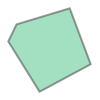

[Segment2D(Point2D(1.31295372759057, 5.49355828540464), Point2D(1.55985858758704, 5.09684768672255)), Segment2D(Point2D(1.55985858758704, 5.09684768672255), Point2D(1.96349810637318, 5.31366456702517)), Segment2D(Point2D(1.79777689538719, 5.75526375217516), Point2D(1.96349810637318, 5.31366456702517)), Segment2D(Point2D(1.37798698343782, 5.62860656768946), Point2D(1.79777689538719, 5.75526375217516)), Segment2D(Point2D(1.31295372759057, 5.49355828540464), Point2D(1.37798698343782, 5.62860656768946))] 

{Point2D(2.52389474543898, 4.63627256752460), Point2D(1.85113082834271, 4.62686829259349), Point2D(2.12999621929894, 4.28164436029702), Point2D(2.26848231179514, 4.27643235664819), Point2D(2.20481395187786, 4.93139069306930), Point2D(2.40831419810647, 4.86996904216703)}
------------
Point2D(2.20646097318846, 4.60696941720246)
6 {Point2D(2.52389474543898, 4.63627256752460), Point2D(1.85113082834271, 4.62686829259349), Point2D(2.12999621929894, 4.28164436029702), Point2D(2.26848231179514, 

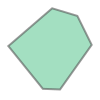

[Segment2D(Point2D(1.85113082834271, 4.62686829259349), Point2D(2.12999621929894, 4.28164436029702)), Segment2D(Point2D(2.12999621929894, 4.28164436029702), Point2D(2.26848231179514, 4.27643235664819)), Segment2D(Point2D(2.26848231179514, 4.27643235664819), Point2D(2.52389474543898, 4.63627256752460)), Segment2D(Point2D(2.40831419810647, 4.86996904216703), Point2D(2.52389474543898, 4.63627256752460)), Segment2D(Point2D(2.20481395187786, 4.93139069306930), Point2D(2.40831419810647, 4.86996904216703)), Segment2D(Point2D(1.85113082834271, 4.62686829259349), Point2D(2.20481395187786, 4.93139069306930))] 

{Point2D(1.83026333210457, 3.92441047833058), Point2D(1.83347792095711, 3.88693718420646), Point2D(2.12999621929894, 4.28164436029702), Point2D(2.26848231179514, 4.27643235664819), Point2D(2.28763118763262, 3.62096612465727), Point2D(2.49370143807745, 4.02498445269985), Point2D(2.22021960670624, 3.60662152204895)}
------------
Point2D(2.18179170988106, 3.95149215540772)
7 {Point2D(1.83026

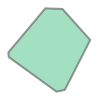

[Segment2D(Point2D(1.83026333210457, 3.92441047833058), Point2D(1.83347792095711, 3.88693718420646)), Segment2D(Point2D(1.83347792095711, 3.88693718420646), Point2D(2.22021960670624, 3.60662152204895)), Segment2D(Point2D(2.22021960670624, 3.60662152204895), Point2D(2.28763118763262, 3.62096612465727)), Segment2D(Point2D(2.28763118763262, 3.62096612465727), Point2D(2.49370143807745, 4.02498445269985)), Segment2D(Point2D(2.26848231179514, 4.27643235664819), Point2D(2.49370143807745, 4.02498445269985)), Segment2D(Point2D(2.12999621929894, 4.28164436029702), Point2D(2.26848231179514, 4.27643235664819)), Segment2D(Point2D(1.83026333210457, 3.92441047833058), Point2D(2.12999621929894, 4.28164436029702))] 

{Point2D(2.89281949277667, 2.30419384122643), Point2D(2.38505272641646, 1.87338117381980), Point2D(2.85690542215138, 2.35209776731560), Point2D(2.38788079969992, 2.40239061730454), Point2D(2.27052687237184, 2.08379821078951), Point2D(2.82402956246308, 1.90650436167444)}
------------
Point2

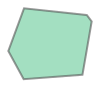

[Segment2D(Point2D(2.27052687237184, 2.08379821078951), Point2D(2.38505272641646, 1.87338117381980)), Segment2D(Point2D(2.38505272641646, 1.87338117381980), Point2D(2.82402956246308, 1.90650436167444)), Segment2D(Point2D(2.82402956246308, 1.90650436167444), Point2D(2.89281949277667, 2.30419384122643)), Segment2D(Point2D(2.85690542215138, 2.35209776731560), Point2D(2.89281949277667, 2.30419384122643)), Segment2D(Point2D(2.38788079969992, 2.40239061730454), Point2D(2.85690542215138, 2.35209776731560)), Segment2D(Point2D(2.27052687237184, 2.08379821078951), Point2D(2.38788079969992, 2.40239061730454))] 

{Point2D(1.83491139479991, 2.08584627450887), Point2D(2.27052687237184, 2.08379821078951), Point2D(2.38505272641646, 1.87338117381980)}
------------
Point2D(2.0575325352553, 1.8429625882928)
3 {Point2D(1.83491139479991, 2.08584627450887), Point2D(2.27052687237184, 2.08379821078951), Point2D(2.38505272641646, 1.87338117381980)}
Triangle(Point2D(1.83491139479991, 2.08584627450887), Point2D(

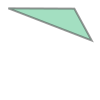

[Segment2D(Point2D(1.83491139479991, 2.08584627450887), Point2D(2.38505272641646, 1.87338117381980)), Segment2D(Point2D(2.27052687237184, 2.08379821078951), Point2D(2.38505272641646, 1.87338117381980)), Segment2D(Point2D(1.83491139479991, 2.08584627450887), Point2D(2.27052687237184, 2.08379821078951))] 

{Point2D(2.88725199271747, 1.46376744090209), Point2D(2.82402956246308, 1.90650436167444), Point2D(2.38505272641646, 1.87338117381980), Point2D(2.93624745474283, 1.76407142045074)}
------------
Point2D(2.62490756190094, 1.64829358229503)
4 {Point2D(2.88725199271747, 1.46376744090209), Point2D(2.82402956246308, 1.90650436167444), Point2D(2.38505272641646, 1.87338117381980), Point2D(2.93624745474283, 1.76407142045074)}
Polygon(Point2D(2.38505272641646, 1.8733811738198), Point2D(2.88725199271747, 1.46376744090209), Point2D(2.93624745474283, 1.76407142045074), Point2D(2.82402956246308, 1.90650436167444))


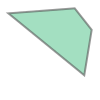

[Segment2D(Point2D(2.38505272641646, 1.87338117381980), Point2D(2.88725199271747, 1.46376744090209)), Segment2D(Point2D(2.88725199271747, 1.46376744090209), Point2D(2.93624745474283, 1.76407142045074)), Segment2D(Point2D(2.82402956246308, 1.90650436167444), Point2D(2.93624745474283, 1.76407142045074)), Segment2D(Point2D(2.38505272641646, 1.87338117381980), Point2D(2.82402956246308, 1.90650436167444))] 

{Point2D(4.58815666057012, 4.84072007416621), Point2D(4.09374275001031, 4.66421891040079), Point2D(4.33808501601273, 5.28021253976185), Point2D(4.42163433377931, 4.64404160999903), Point2D(4.29933308986537, 5.28649569927640), Point2D(3.92085781197779, 4.91608163995463)}
------------
Point2D(4.26832405486379, 4.9205205814333)
6 {Point2D(4.58815666057012, 4.84072007416621), Point2D(4.09374275001031, 4.66421891040079), Point2D(4.33808501601273, 5.28021253976185), Point2D(4.42163433377931, 4.64404160999903), Point2D(4.29933308986537, 5.28649569927640), Point2D(3.92085781197779, 4.9160816399

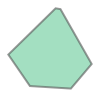

[Segment2D(Point2D(3.92085781197779, 4.91608163995463), Point2D(4.09374275001031, 4.66421891040079)), Segment2D(Point2D(4.09374275001031, 4.66421891040079), Point2D(4.42163433377931, 4.64404160999903)), Segment2D(Point2D(4.42163433377931, 4.64404160999903), Point2D(4.58815666057012, 4.84072007416621)), Segment2D(Point2D(4.33808501601273, 5.28021253976185), Point2D(4.58815666057012, 4.84072007416621)), Segment2D(Point2D(4.29933308986537, 5.28649569927640), Point2D(4.33808501601273, 5.28021253976185)), Segment2D(Point2D(3.92085781197779, 4.91608163995463), Point2D(4.29933308986537, 5.28649569927640))] 

{Point2D(4.09374275001031, 4.66421891040079), Point2D(4.54901461094557, 4.23295338750661), Point2D(3.91218656365319, 4.27118187759049), Point2D(4.42163433377931, 4.64404160999903), Point2D(4.36056510088805, 4.08725129232451), Point2D(3.93810406331196, 4.20020606911538)}
------------
Point2D(4.23558203660308, 4.38844582368409)
6 {Point2D(4.09374275001031, 4.66421891040079), Point2D(4.54901

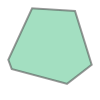

[Segment2D(Point2D(3.91218656365319, 4.27118187759049), Point2D(3.93810406331196, 4.20020606911538)), Segment2D(Point2D(3.93810406331196, 4.20020606911538), Point2D(4.36056510088805, 4.08725129232451)), Segment2D(Point2D(4.36056510088805, 4.08725129232451), Point2D(4.54901461094557, 4.23295338750661)), Segment2D(Point2D(4.42163433377931, 4.64404160999903), Point2D(4.54901461094557, 4.23295338750661)), Segment2D(Point2D(4.09374275001031, 4.66421891040079), Point2D(4.42163433377931, 4.64404160999903)), Segment2D(Point2D(3.91218656365319, 4.27118187759049), Point2D(4.09374275001031, 4.66421891040079))] 

{Point2D(4.33808501601273, 5.28021253976185), Point2D(4.08670456781336, 5.53974656448167), Point2D(4.29933308986537, 5.28649569927640), Point2D(4.61846054336763, 5.45139670119317), Point2D(4.65023006934459, 5.81873182087816), Point2D(4.18892708573241, 5.94897003989837), Point2D(4.18037776722170, 5.94469663354886)}
------------
Point2D(4.38554966082256, 5.64351957806379)
7 {Point2D(4.33808

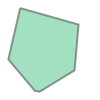

[Segment2D(Point2D(4.08670456781336, 5.53974656448167), Point2D(4.29933308986537, 5.28649569927640)), Segment2D(Point2D(4.29933308986537, 5.28649569927640), Point2D(4.33808501601273, 5.28021253976185)), Segment2D(Point2D(4.33808501601273, 5.28021253976185), Point2D(4.61846054336763, 5.45139670119317)), Segment2D(Point2D(4.61846054336763, 5.45139670119317), Point2D(4.65023006934459, 5.81873182087816)), Segment2D(Point2D(4.18892708573241, 5.94897003989837), Point2D(4.65023006934459, 5.81873182087816)), Segment2D(Point2D(4.18037776722170, 5.94469663354886), Point2D(4.18892708573241, 5.94897003989837)), Segment2D(Point2D(4.08670456781336, 5.53974656448167), Point2D(4.18037776722170, 5.94469663354886))] 

{Point2D(4.81866492700508, 5.94015530070511), Point2D(5.19939688612117, 5.41104423291246), Point2D(5.06481377885843, 5.25249674992112), Point2D(4.61846054336763, 5.45139670119317), Point2D(4.65023006934459, 5.81873182087816), Point2D(5.20226658720329, 5.68046607008103)}
------------
Point2

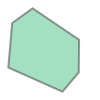

[Segment2D(Point2D(4.61846054336763, 5.45139670119317), Point2D(5.06481377885843, 5.25249674992112)), Segment2D(Point2D(5.06481377885843, 5.25249674992112), Point2D(5.19939688612117, 5.41104423291246)), Segment2D(Point2D(5.19939688612117, 5.41104423291246), Point2D(5.20226658720329, 5.68046607008103)), Segment2D(Point2D(4.81866492700508, 5.94015530070511), Point2D(5.20226658720329, 5.68046607008103)), Segment2D(Point2D(4.65023006934459, 5.81873182087816), Point2D(4.81866492700508, 5.94015530070511)), Segment2D(Point2D(4.61846054336763, 5.45139670119317), Point2D(4.65023006934459, 5.81873182087816))] 

{Point2D(7.12629449357705, 1.66766825850170), Point2D(6.92083345662650, 1.62327837382548), Point2D(7.61758133461855, 1.31923195479590), Point2D(6.77671671000955, 1.21075639858790)}
------------
Point2D(7.07857903373639, 1.34105991660907)
4 {Point2D(7.12629449357705, 1.66766825850170), Point2D(6.92083345662650, 1.62327837382548), Point2D(7.61758133461855, 1.31923195479590), Point2D(6.77671

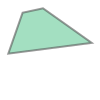

[Segment2D(Point2D(6.77671671000955, 1.21075639858790), Point2D(7.61758133461855, 1.31923195479590)), Segment2D(Point2D(7.12629449357705, 1.66766825850170), Point2D(7.61758133461855, 1.31923195479590)), Segment2D(Point2D(6.92083345662650, 1.62327837382548), Point2D(7.12629449357705, 1.66766825850170)), Segment2D(Point2D(6.77671671000955, 1.21075639858790), Point2D(6.92083345662650, 1.62327837382548))] 

{Point2D(6.77671671000955, 1.21075639858790), Point2D(6.52250030530374, 1.82443690072290), Point2D(6.29731357556041, 1.42518974649596), Point2D(6.62109217790959, 1.84320820575281), Point2D(6.92083345662650, 1.62327837382548), Point2D(6.51249558648930, 1.19903011528899)}
------------
Point2D(6.6216648265483, 1.50068532561931)
6 {Point2D(6.77671671000955, 1.21075639858790), Point2D(6.52250030530374, 1.82443690072290), Point2D(6.29731357556041, 1.42518974649596), Point2D(6.62109217790959, 1.84320820575281), Point2D(6.92083345662650, 1.62327837382548), Point2D(6.51249558648930, 1.1990301152

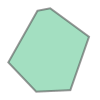

[Segment2D(Point2D(6.29731357556041, 1.42518974649596), Point2D(6.51249558648930, 1.19903011528899)), Segment2D(Point2D(6.51249558648930, 1.19903011528899), Point2D(6.77671671000955, 1.21075639858790)), Segment2D(Point2D(6.77671671000955, 1.21075639858790), Point2D(6.92083345662650, 1.62327837382548)), Segment2D(Point2D(6.62109217790959, 1.84320820575281), Point2D(6.92083345662650, 1.62327837382548)), Segment2D(Point2D(6.52250030530374, 1.82443690072290), Point2D(6.62109217790959, 1.84320820575281)), Segment2D(Point2D(6.29731357556041, 1.42518974649596), Point2D(6.52250030530374, 1.82443690072290))] 

{Point2D(7.12629449357705, 1.66766825850170), Point2D(6.83348995458188, 2.28681990806661), Point2D(7.24066585621605, 2.09925467863095), Point2D(6.92083345662650, 1.62327837382548), Point2D(6.84170707565543, 2.28990181350531), Point2D(6.62109217790959, 1.84320820575281)}
------------
Point2D(6.94800104829374, 1.94544734603469)
6 {Point2D(7.12629449357705, 1.66766825850170), Point2D(6.83348

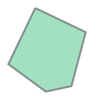

[Segment2D(Point2D(6.62109217790959, 1.84320820575281), Point2D(6.92083345662650, 1.62327837382548)), Segment2D(Point2D(6.92083345662650, 1.62327837382548), Point2D(7.12629449357705, 1.66766825850170)), Segment2D(Point2D(7.12629449357705, 1.66766825850170), Point2D(7.24066585621605, 2.09925467863095)), Segment2D(Point2D(6.84170707565543, 2.28990181350531), Point2D(7.24066585621605, 2.09925467863095)), Segment2D(Point2D(6.83348995458188, 2.28681990806661), Point2D(6.84170707565543, 2.28990181350531)), Segment2D(Point2D(6.62109217790959, 1.84320820575281), Point2D(6.83348995458188, 2.28681990806661))] 

{Point2D(6.36303138345301, 2.64484861528881), Point2D(6.97436963592364, 2.81605093943029), Point2D(6.53514909880813, 2.89498760026843), Point2D(7.01897536017291, 2.72576558801307), Point2D(6.39857666252515, 2.47655228073248), Point2D(6.83348995458188, 2.28681990806661), Point2D(6.84170707565543, 2.28990181350531)}
------------
Point2D(6.69526687401071, 2.61929907536696)
7 {Point2D(6.36303

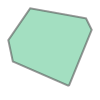

[Segment2D(Point2D(6.36303138345301, 2.64484861528881), Point2D(6.39857666252515, 2.47655228073248)), Segment2D(Point2D(6.39857666252515, 2.47655228073248), Point2D(6.83348995458188, 2.28681990806661)), Segment2D(Point2D(6.83348995458188, 2.28681990806661), Point2D(6.84170707565543, 2.28990181350531)), Segment2D(Point2D(6.84170707565543, 2.28990181350531), Point2D(7.01897536017291, 2.72576558801307)), Segment2D(Point2D(6.97436963592364, 2.81605093943029), Point2D(7.01897536017291, 2.72576558801307)), Segment2D(Point2D(6.53514909880813, 2.89498760026843), Point2D(6.97436963592364, 2.81605093943029)), Segment2D(Point2D(6.36303138345301, 2.64484861528881), Point2D(6.53514909880813, 2.89498760026843))] 

{Point2D(6.29731357556041, 1.42518974649596), Point2D(6.12515099266544, 1.42203996449525), Point2D(5.88057808363727, 1.05431437400595), Point2D(6.51249558648930, 1.19903011528899)}
------------
Point2D(6.20578596262624, 1.1049929124155)
4 {Point2D(6.29731357556041, 1.42518974649596), Point

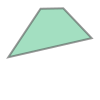

[Segment2D(Point2D(5.88057808363727, 1.05431437400595), Point2D(6.51249558648930, 1.19903011528899)), Segment2D(Point2D(6.29731357556041, 1.42518974649596), Point2D(6.51249558648930, 1.19903011528899)), Segment2D(Point2D(6.12515099266544, 1.42203996449525), Point2D(6.29731357556041, 1.42518974649596)), Segment2D(Point2D(5.88057808363727, 1.05431437400595), Point2D(6.12515099266544, 1.42203996449525))] 

{Point2D(6.15432893423757, 2.08874364119236), Point2D(5.84221016190180, 1.72385994238286), Point2D(6.12515099266544, 1.42203996449525), Point2D(6.52250030530374, 1.82443690072290), Point2D(6.29731357556041, 1.42518974649596)}
------------
Point2D(6.19413488157771, 1.74182435229989)
5 {Point2D(6.15432893423757, 2.08874364119236), Point2D(5.84221016190180, 1.72385994238286), Point2D(6.12515099266544, 1.42203996449525), Point2D(6.52250030530374, 1.82443690072290), Point2D(6.29731357556041, 1.42518974649596)}
Polygon(Point2D(5.8422101619018, 1.72385994238286), Point2D(6.12515099266544, 1.42

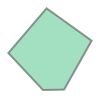

[Segment2D(Point2D(5.84221016190180, 1.72385994238286), Point2D(6.12515099266544, 1.42203996449525)), Segment2D(Point2D(6.12515099266544, 1.42203996449525), Point2D(6.29731357556041, 1.42518974649596)), Segment2D(Point2D(6.29731357556041, 1.42518974649596), Point2D(6.52250030530374, 1.82443690072290)), Segment2D(Point2D(6.15432893423757, 2.08874364119236), Point2D(6.52250030530374, 1.82443690072290)), Segment2D(Point2D(5.84221016190180, 1.72385994238286), Point2D(6.15432893423757, 2.08874364119236))] 

{Point2D(5.79551615856061, 1.72411648817568), Point2D(5.46358836082911, 1.38214005266382), Point2D(5.84221016190180, 1.72385994238286), Point2D(6.12515099266544, 1.42203996449525), Point2D(5.88057808363727, 1.05431437400595), Point2D(5.65142723228107, 1.08910878032309)}
------------
Point2D(5.80158287131506, 1.37382687022793)
6 {Point2D(5.79551615856061, 1.72411648817568), Point2D(5.46358836082911, 1.38214005266382), Point2D(5.84221016190180, 1.72385994238286), Point2D(6.12515099266544, 

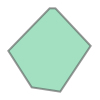

[Segment2D(Point2D(5.46358836082911, 1.38214005266382), Point2D(5.65142723228107, 1.08910878032309)), Segment2D(Point2D(5.65142723228107, 1.08910878032309), Point2D(5.88057808363727, 1.05431437400595)), Segment2D(Point2D(5.88057808363727, 1.05431437400595), Point2D(6.12515099266544, 1.42203996449525)), Segment2D(Point2D(5.84221016190180, 1.72385994238286), Point2D(6.12515099266544, 1.42203996449525)), Segment2D(Point2D(5.79551615856061, 1.72411648817568), Point2D(5.84221016190180, 1.72385994238286)), Segment2D(Point2D(5.46358836082911, 1.38214005266382), Point2D(5.79551615856061, 1.72411648817568))] 

{Point2D(6.51249558648930, 1.19903011528899), Point2D(6.77671671000955, 1.21075639858790)}
{Point2D(5.88057808363727, 1.05431437400595), Point2D(5.38213628609919, 0.746492339947896), Point2D(5.65142723228107, 1.08910878032309)}
------------
Point2D(5.71030006029162, 0.772651679320744)
3 {Point2D(5.88057808363727, 1.05431437400595), Point2D(5.38213628609919, 0.746492339947896), Point2D(5.6

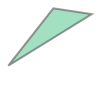

[Segment2D(Point2D(5.38213628609919, 0.746492339947896), Point2D(5.88057808363727, 1.05431437400595)), Segment2D(Point2D(5.65142723228107, 1.08910878032309), Point2D(5.88057808363727, 1.05431437400595)), Segment2D(Point2D(5.38213628609919, 0.746492339947896), Point2D(5.65142723228107, 1.08910878032309))] 

{Point2D(6.97436963592364, 2.81605093943029), Point2D(6.53514909880813, 2.89498760026843), Point2D(6.54023023825480, 3.31994665953007), Point2D(7.09684930155979, 3.17018430144402), Point2D(6.98588389585369, 3.35845029698006), Point2D(6.45635856031169, 3.18634159960293)}
------------
Point2D(6.78124005846232, 3.09767234136813)
6 {Point2D(6.97436963592364, 2.81605093943029), Point2D(6.53514909880813, 2.89498760026843), Point2D(6.54023023825480, 3.31994665953007), Point2D(7.09684930155979, 3.17018430144402), Point2D(6.98588389585369, 3.35845029698006), Point2D(6.45635856031169, 3.18634159960293)}
Polygon(Point2D(6.45635856031169, 3.18634159960293), Point2D(6.53514909880813, 2.8949876002

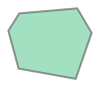

[Segment2D(Point2D(6.45635856031169, 3.18634159960293), Point2D(6.53514909880813, 2.89498760026843)), Segment2D(Point2D(6.53514909880813, 2.89498760026843), Point2D(6.97436963592364, 2.81605093943029)), Segment2D(Point2D(6.97436963592364, 2.81605093943029), Point2D(7.09684930155979, 3.17018430144402)), Segment2D(Point2D(6.98588389585369, 3.35845029698006), Point2D(7.09684930155979, 3.17018430144402)), Segment2D(Point2D(6.54023023825480, 3.31994665953007), Point2D(6.98588389585369, 3.35845029698006)), Segment2D(Point2D(6.45635856031169, 3.18634159960293), Point2D(6.54023023825480, 3.31994665953007))] 

{Point2D(4.52305622215371, 0.669344401186515), Point2D(4.81456739322846, 0.515382609875604)}
{Point2D(10, 4.74504361557897), Point2D(4.24897197229203, 1.02747222916053), Point2D(4.52305622215371, 0.669344401186515), Point2D(4.46859250260663, 0.903461595566287)}
------------
Point2D(4.20297967166818, 0.709728998898495)
4 {Point2D(10, 4.74504361557897), Point2D(4.24897197229203, 1.027472229

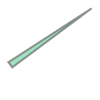

[Segment2D(Point2D(4.24897197229203, 1.02747222916053), Point2D(4.52305622215371, 0.669344401186515)), Segment2D(Point2D(4.52305622215371, 0.669344401186515), Point2D(10, 4.74504361557897)), Segment2D(Point2D(4.24897197229203, 1.02747222916053), Point2D(10, 4.74504361557897))] 

{Point2D(4.67143245384946, 1.52982346986363), Point2D(4.81616917219414, 1.17053461223106), Point2D(5.33603738424748, 1.40480545654722), Point2D(5.00064432107216, 1.10415919834373), Point2D(5.09228932745062, 1.78257390523699)}
------------
Point2D(5.00410534326428, 1.43512742450869)
5 {Point2D(4.67143245384946, 1.52982346986363), Point2D(4.81616917219414, 1.17053461223106), Point2D(5.33603738424748, 1.40480545654722), Point2D(5.00064432107216, 1.10415919834373), Point2D(5.09228932745062, 1.78257390523699)}
Polygon(Point2D(4.67143245384946, 1.52982346986363), Point2D(4.81616917219414, 1.17053461223106), Point2D(5.00064432107216, 1.10415919834373), Point2D(5.33603738424748, 1.40480545654722), Point2D(5.09228932745

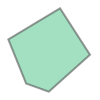

[Segment2D(Point2D(4.67143245384946, 1.52982346986363), Point2D(4.81616917219414, 1.17053461223106)), Segment2D(Point2D(4.81616917219414, 1.17053461223106), Point2D(5.00064432107216, 1.10415919834373)), Segment2D(Point2D(5.00064432107216, 1.10415919834373), Point2D(5.33603738424748, 1.40480545654722)), Segment2D(Point2D(5.09228932745062, 1.78257390523699), Point2D(5.33603738424748, 1.40480545654722)), Segment2D(Point2D(4.67143245384946, 1.52982346986363), Point2D(5.09228932745062, 1.78257390523699))] 

{Point2D(4.24897197229203, 1.02747222916053), Point2D(4.67143245384946, 1.52982346986363), Point2D(4.46859250260663, 0.903461595566287), Point2D(4.81616917219414, 1.17053461223106), Point2D(4.18313754529236, 1.34638549936334), Point2D(4.59615308224684, 1.55899493880606)}
------------
Point2D(4.4973000009207, 1.23096483907897)
6 {Point2D(4.24897197229203, 1.02747222916053), Point2D(4.67143245384946, 1.52982346986363), Point2D(4.46859250260663, 0.903461595566287), Point2D(4.81616917219414,

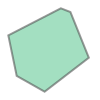

[Segment2D(Point2D(4.18313754529236, 1.34638549936334), Point2D(4.24897197229203, 1.02747222916053)), Segment2D(Point2D(4.24897197229203, 1.02747222916053), Point2D(4.46859250260663, 0.903461595566287)), Segment2D(Point2D(4.46859250260663, 0.903461595566287), Point2D(4.81616917219414, 1.17053461223106)), Segment2D(Point2D(4.67143245384946, 1.52982346986363), Point2D(4.81616917219414, 1.17053461223106)), Segment2D(Point2D(4.59615308224684, 1.55899493880606), Point2D(4.67143245384946, 1.52982346986363)), Segment2D(Point2D(4.18313754529236, 1.34638549936334), Point2D(4.59615308224684, 1.55899493880606))] 

{Point2D(9.48646492154206, 5.07831227566752), Point2D(9.62025048502702, 5.41296253968986), Point2D(0, 2.52250021210812), Point2D(9.83795200315088, 4.79289721798348)}
------------
Point2D(9.80698170528318, 5.13389131813823)
4 {Point2D(9.48646492154206, 5.07831227566752), Point2D(9.62025048502702, 5.41296253968986), Point2D(0, 2.52250021210812), Point2D(9.83795200315088, 4.79289721798348)

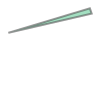

[Segment2D(Point2D(0, 2.52250021210812), Point2D(9.83795200315088, 4.79289721798348)), Segment2D(Point2D(9.62025048502702, 5.41296253968986), Point2D(9.83795200315088, 4.79289721798348)), Segment2D(Point2D(0, 2.52250021210812), Point2D(9.62025048502702, 5.41296253968986))] 

{Point2D(9.62974247923616, 4.45007186129152), Point2D(0, 2.52250021210812), Point2D(9.83795200315088, 4.79289721798348)}
------------
Point2D(9.95954411625898, 4.47281676915809)
3 {Point2D(9.62974247923616, 4.45007186129152), Point2D(0, 2.52250021210812), Point2D(9.83795200315088, 4.79289721798348)}
Triangle(Point2D(0, 2.52250021210812), Point2D(9.62974247923616, 4.45007186129152), Point2D(9.83795200315088, 4.79289721798348))


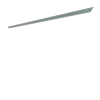

[Segment2D(Point2D(0, 2.52250021210812), Point2D(9.62974247923616, 4.45007186129152)), Segment2D(Point2D(9.62974247923616, 4.45007186129152), Point2D(9.83795200315088, 4.79289721798348)), Segment2D(Point2D(0, 2.52250021210812), Point2D(9.83795200315088, 4.79289721798348))] 

{Point2D(9.17710219174108, 4.74596453905485), Point2D(9.83795200315088, 4.79289721798348), Point2D(9.47147356050560, 4.42163390749631), Point2D(9.48646492154206, 5.07831227566752), Point2D(9.29177939063396, 5.01015446431030), Point2D(9.62974247923616, 4.45007186129152)}
------------
Point2D(9.49786197907103, 4.75321206696042)
6 {Point2D(9.17710219174108, 4.74596453905485), Point2D(9.83795200315088, 4.79289721798348), Point2D(9.47147356050560, 4.42163390749631), Point2D(9.48646492154206, 5.07831227566752), Point2D(9.29177939063396, 5.01015446431030), Point2D(9.62974247923616, 4.45007186129152)}
Polygon(Point2D(9.17710219174108, 4.74596453905485), Point2D(9.4714735605056, 4.42163390749631), Point2D(9.62974247923616, 

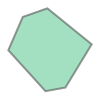

[Segment2D(Point2D(9.17710219174108, 4.74596453905485), Point2D(9.47147356050560, 4.42163390749631)), Segment2D(Point2D(9.47147356050560, 4.42163390749631), Point2D(9.62974247923616, 4.45007186129152)), Segment2D(Point2D(9.62974247923616, 4.45007186129152), Point2D(9.83795200315088, 4.79289721798348)), Segment2D(Point2D(9.48646492154206, 5.07831227566752), Point2D(9.83795200315088, 4.79289721798348)), Segment2D(Point2D(9.29177939063396, 5.01015446431030), Point2D(9.48646492154206, 5.07831227566752)), Segment2D(Point2D(9.17710219174108, 4.74596453905485), Point2D(9.29177939063396, 5.01015446431030))] 

{Point2D(9.55827683060483, 3.78612509999041), Point2D(9.62974247923616, 4.45007186129152), Point2D(9.47147356050560, 4.42163390749631), Point2D(9.28946293538318, 4.14174427230958)}
------------
Point2D(9.61164139539522, 4.11998278031401)
4 {Point2D(9.55827683060483, 3.78612509999041), Point2D(9.62974247923616, 4.45007186129152), Point2D(9.47147356050560, 4.42163390749631), Point2D(9.28946

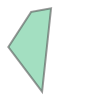

[Segment2D(Point2D(9.28946293538318, 4.14174427230958), Point2D(9.55827683060483, 3.78612509999041)), Segment2D(Point2D(9.55827683060483, 3.78612509999041), Point2D(9.62974247923616, 4.45007186129152)), Segment2D(Point2D(9.47147356050560, 4.42163390749631), Point2D(9.62974247923616, 4.45007186129152)), Segment2D(Point2D(9.28946293538318, 4.14174427230958), Point2D(9.47147356050560, 4.42163390749631))] 

{Point2D(9.28946293538318, 4.14174427230958), Point2D(9.17710219174108, 4.74596453905485), Point2D(8.81871784322445, 4.47713532024075), Point2D(9.05598191465998, 4.10928703668194), Point2D(8.90398421876079, 4.66001265550531), Point2D(9.47147356050560, 4.42163390749631)}
------------
Point2D(9.13889708667021, 4.42740569398033)
6 {Point2D(9.28946293538318, 4.14174427230958), Point2D(9.17710219174108, 4.74596453905485), Point2D(8.81871784322445, 4.47713532024075), Point2D(9.05598191465998, 4.10928703668194), Point2D(8.90398421876079, 4.66001265550531), Point2D(9.47147356050560, 4.421633907

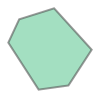

[Segment2D(Point2D(8.81871784322445, 4.47713532024075), Point2D(9.05598191465998, 4.10928703668194)), Segment2D(Point2D(9.05598191465998, 4.10928703668194), Point2D(9.28946293538318, 4.14174427230958)), Segment2D(Point2D(9.28946293538318, 4.14174427230958), Point2D(9.47147356050560, 4.42163390749631)), Segment2D(Point2D(9.17710219174108, 4.74596453905485), Point2D(9.47147356050560, 4.42163390749631)), Segment2D(Point2D(8.90398421876079, 4.66001265550531), Point2D(9.17710219174108, 4.74596453905485)), Segment2D(Point2D(8.81871784322445, 4.47713532024075), Point2D(8.90398421876079, 4.66001265550531))] 

{Point2D(8.45366042769332, 4.36793558303714), Point2D(8.59155734288784, 3.86191162739852), Point2D(8.41421358016404, 4.28846176009838), Point2D(8.90974999157240, 3.89774550720891), Point2D(8.81871784322445, 4.47713532024075), Point2D(9.05598191465998, 4.10928703668194)}
------------
Point2D(8.73198054528016, 4.16494239141817)
6 {Point2D(8.45366042769332, 4.36793558303714), Point2D(8.59155

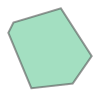

[Segment2D(Point2D(8.41421358016404, 4.28846176009838), Point2D(8.59155734288784, 3.86191162739852)), Segment2D(Point2D(8.59155734288784, 3.86191162739852), Point2D(8.90974999157240, 3.89774550720891)), Segment2D(Point2D(8.90974999157240, 3.89774550720891), Point2D(9.05598191465998, 4.10928703668194)), Segment2D(Point2D(8.81871784322445, 4.47713532024075), Point2D(9.05598191465998, 4.10928703668194)), Segment2D(Point2D(8.45366042769332, 4.36793558303714), Point2D(8.81871784322445, 4.47713532024075)), Segment2D(Point2D(8.41421358016404, 4.28846176009838), Point2D(8.45366042769332, 4.36793558303714))] 

{Point2D(8.23441188773958, 4.81036087498118), Point2D(8.45366042769332, 4.36793558303714), Point2D(8.81871784322445, 4.47713532024075), Point2D(8.90398421876079, 4.66001265550531), Point2D(8.63273421036155, 5.01751030580895)}
------------
Point2D(8.57479493631911, 4.6904177600907)
5 {Point2D(8.23441188773958, 4.81036087498118), Point2D(8.45366042769332, 4.36793558303714), Point2D(8.818717

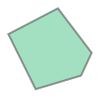

[Segment2D(Point2D(8.23441188773958, 4.81036087498118), Point2D(8.45366042769332, 4.36793558303714)), Segment2D(Point2D(8.45366042769332, 4.36793558303714), Point2D(8.81871784322445, 4.47713532024075)), Segment2D(Point2D(8.81871784322445, 4.47713532024075), Point2D(8.90398421876079, 4.66001265550531)), Segment2D(Point2D(8.63273421036155, 5.01751030580895), Point2D(8.90398421876079, 4.66001265550531)), Segment2D(Point2D(8.23441188773958, 4.81036087498118), Point2D(8.63273421036155, 5.01751030580895))] 

{Point2D(7.09606358240080, 7.97008854743192), Point2D(6.61850463682770, 7.94357748216410), Point2D(7.15525443652267, 8.31601682856473), Point2D(7.01114471318553, 8.49417533662021), Point2D(6.58161873273345, 8.38928437310411), Point2D(6.58750612081824, 7.97218803494825)}
------------
Point2D(6.85275953658837, 8.2055600810021)
6 {Point2D(7.09606358240080, 7.97008854743192), Point2D(6.61850463682770, 7.94357748216410), Point2D(7.15525443652267, 8.31601682856473), Point2D(7.01114471318553, 8

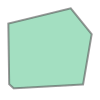

[Segment2D(Point2D(6.58161873273345, 8.38928437310411), Point2D(6.58750612081824, 7.97218803494825)), Segment2D(Point2D(6.58750612081824, 7.97218803494825), Point2D(6.61850463682770, 7.94357748216410)), Segment2D(Point2D(6.61850463682770, 7.94357748216410), Point2D(7.09606358240080, 7.97008854743192)), Segment2D(Point2D(7.09606358240080, 7.97008854743192), Point2D(7.15525443652267, 8.31601682856473)), Segment2D(Point2D(7.01114471318553, 8.49417533662021), Point2D(7.15525443652267, 8.31601682856473)), Segment2D(Point2D(6.58161873273345, 8.38928437310411), Point2D(7.01114471318553, 8.49417533662021))] 

{Point2D(7.15525443652267, 8.31601682856473), Point2D(7.01114471318553, 8.49417533662021), Point2D(7.58551430324661, 8.38569900221896)}
------------
Point2D(7.32648611192483, 8.5887503448537)
3 {Point2D(7.15525443652267, 8.31601682856473), Point2D(7.01114471318553, 8.49417533662021), Point2D(7.58551430324661, 8.38569900221896)}
Triangle(Point2D(7.01114471318553, 8.49417533662021), Point2D

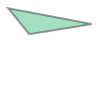

[Segment2D(Point2D(7.01114471318553, 8.49417533662021), Point2D(7.15525443652267, 8.31601682856473)), Segment2D(Point2D(7.15525443652267, 8.31601682856473), Point2D(7.58551430324661, 8.38569900221896)), Segment2D(Point2D(7.01114471318553, 8.49417533662021), Point2D(7.58551430324661, 8.38569900221896))] 

{Point2D(5.75988722631988, 3.81930576901307), Point2D(6.34975416610223, 3.76627455899123), Point2D(6.27308796518171, 4.21168219470224), Point2D(6.00340646808454, 3.65772328842083), Point2D(5.89515068592832, 4.25848847905448)}
------------
Point2D(6.06976916151675, 3.96853149616622)
5 {Point2D(5.75988722631988, 3.81930576901307), Point2D(6.34975416610223, 3.76627455899123), Point2D(6.27308796518171, 4.21168219470224), Point2D(6.00340646808454, 3.65772328842083), Point2D(5.89515068592832, 4.25848847905448)}
Polygon(Point2D(5.75988722631988, 3.81930576901307), Point2D(6.00340646808454, 3.65772328842083), Point2D(6.34975416610223, 3.76627455899123), Point2D(6.27308796518171, 4.211682194702

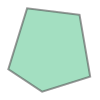

[Segment2D(Point2D(5.75988722631988, 3.81930576901307), Point2D(6.00340646808454, 3.65772328842083)), Segment2D(Point2D(6.00340646808454, 3.65772328842083), Point2D(6.34975416610223, 3.76627455899123)), Segment2D(Point2D(6.27308796518171, 4.21168219470224), Point2D(6.34975416610223, 3.76627455899123)), Segment2D(Point2D(5.89515068592832, 4.25848847905448), Point2D(6.27308796518171, 4.21168219470224)), Segment2D(Point2D(5.75988722631988, 3.81930576901307), Point2D(5.89515068592832, 4.25848847905448))] 

{Point2D(5.75988722631988, 3.81930576901307), Point2D(5.29329274271796, 4.01105223766345), Point2D(5.31699119821057, 4.33640708257810), Point2D(5.63344872814253, 3.78871054768298), Point2D(5.89515068592832, 4.25848847905448), Point2D(5.81119997052905, 4.37943747331564)}
------------
Point2D(5.58765690777866, 4.11701678456495)
6 {Point2D(5.75988722631988, 3.81930576901307), Point2D(5.29329274271796, 4.01105223766345), Point2D(5.31699119821057, 4.33640708257810), Point2D(5.63344872814253, 

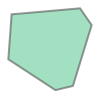

[Segment2D(Point2D(5.29329274271796, 4.01105223766345), Point2D(5.63344872814253, 3.78871054768298)), Segment2D(Point2D(5.63344872814253, 3.78871054768298), Point2D(5.75988722631988, 3.81930576901307)), Segment2D(Point2D(5.75988722631988, 3.81930576901307), Point2D(5.89515068592832, 4.25848847905448)), Segment2D(Point2D(5.81119997052905, 4.37943747331564), Point2D(5.89515068592832, 4.25848847905448)), Segment2D(Point2D(5.31699119821057, 4.33640708257810), Point2D(5.81119997052905, 4.37943747331564)), Segment2D(Point2D(5.29329274271796, 4.01105223766345), Point2D(5.31699119821057, 4.33640708257810))] 

{Point2D(5.29329274271796, 4.01105223766345), Point2D(5.63344872814253, 3.78871054768298), Point2D(5.41988825630844, 3.37860491872995), Point2D(4.96196818993753, 3.77473161671970), Point2D(5.13798361166030, 3.43799729045142), Point2D(4.96944862364537, 3.80182245123166)}
------------
Point2D(5.31436076082173, 3.6989066218283)
6 {Point2D(5.29329274271796, 4.01105223766345), Point2D(5.633448

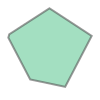

[Segment2D(Point2D(4.96196818993753, 3.77473161671970), Point2D(5.13798361166030, 3.43799729045142)), Segment2D(Point2D(5.13798361166030, 3.43799729045142), Point2D(5.41988825630844, 3.37860491872995)), Segment2D(Point2D(5.41988825630844, 3.37860491872995), Point2D(5.63344872814253, 3.78871054768298)), Segment2D(Point2D(5.29329274271796, 4.01105223766345), Point2D(5.63344872814253, 3.78871054768298)), Segment2D(Point2D(4.96944862364537, 3.80182245123166), Point2D(5.29329274271796, 4.01105223766345)), Segment2D(Point2D(4.96196818993753, 3.77473161671970), Point2D(4.96944862364537, 3.80182245123166))] 

{Point2D(5.75988722631988, 3.81930576901307), Point2D(5.95350640108354, 3.18554519835800), Point2D(5.63344872814253, 3.78871054768298), Point2D(5.41988825630844, 3.37860491872995), Point2D(6.00340646808454, 3.65772328842083), Point2D(5.50552827818015, 3.24344739593246), Point2D(5.97057527066005, 3.20093401111702)}
------------
Point2D(5.74281936584715, 3.47578892874955)
7 {Point2D(5.75988

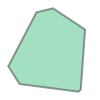

[Segment2D(Point2D(5.41988825630844, 3.37860491872995), Point2D(5.50552827818015, 3.24344739593246)), Segment2D(Point2D(5.50552827818015, 3.24344739593246), Point2D(5.95350640108354, 3.18554519835800)), Segment2D(Point2D(5.95350640108354, 3.18554519835800), Point2D(5.97057527066005, 3.20093401111702)), Segment2D(Point2D(5.97057527066005, 3.20093401111702), Point2D(6.00340646808454, 3.65772328842083)), Segment2D(Point2D(5.75988722631988, 3.81930576901307), Point2D(6.00340646808454, 3.65772328842083)), Segment2D(Point2D(5.63344872814253, 3.78871054768298), Point2D(5.75988722631988, 3.81930576901307)), Segment2D(Point2D(5.41988825630844, 3.37860491872995), Point2D(5.63344872814253, 3.78871054768298))] 

{Point2D(4.85054984875818, 3.04508993173287), Point2D(4.84305328678782, 3.08950681358710), Point2D(5.26025935333725, 2.79194960655229), Point2D(5.41988825630844, 3.37860491872995), Point2D(5.36266091608405, 2.83778353443945), Point2D(5.13798361166030, 3.43799729045142), Point2D(5.505528278

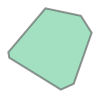

[Segment2D(Point2D(4.84305328678782, 3.08950681358710), Point2D(4.85054984875818, 3.04508993173287)), Segment2D(Point2D(4.85054984875818, 3.04508993173287), Point2D(5.26025935333725, 2.79194960655229)), Segment2D(Point2D(5.26025935333725, 2.79194960655229), Point2D(5.36266091608405, 2.83778353443945)), Segment2D(Point2D(5.36266091608405, 2.83778353443945), Point2D(5.50552827818015, 3.24344739593246)), Segment2D(Point2D(5.41988825630844, 3.37860491872995), Point2D(5.50552827818015, 3.24344739593246)), Segment2D(Point2D(5.13798361166030, 3.43799729045142), Point2D(5.41988825630844, 3.37860491872995)), Segment2D(Point2D(4.84305328678782, 3.08950681358710), Point2D(5.13798361166030, 3.43799729045142))] 

{Point2D(4.84305328678782, 3.08950681358710), Point2D(4.96196818993753, 3.77473161671970), Point2D(4.51116767928395, 3.57115103870189), Point2D(5.13798361166030, 3.43799729045142), Point2D(4.52036106284734, 3.33210894212919)}
------------
Point2D(4.82307776612995, 3.44210659655554)
5 {Poin

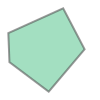

[Segment2D(Point2D(4.51116767928395, 3.57115103870189), Point2D(4.52036106284734, 3.33210894212919)), Segment2D(Point2D(4.52036106284734, 3.33210894212919), Point2D(4.84305328678782, 3.08950681358710)), Segment2D(Point2D(4.84305328678782, 3.08950681358710), Point2D(5.13798361166030, 3.43799729045142)), Segment2D(Point2D(4.96196818993753, 3.77473161671970), Point2D(5.13798361166030, 3.43799729045142)), Segment2D(Point2D(4.51116767928395, 3.57115103870189), Point2D(4.96196818993753, 3.77473161671970))] 

{Point2D(5.26025935333725, 2.79194960655229), Point2D(5.15176669001350, 2.47198960681006), Point2D(5.77544632937219, 2.64153510281717), Point2D(5.76242597455272, 2.39269678756895), Point2D(5.36266091608405, 2.83778353443945), Point2D(5.48528630159547, 2.18154319164547)}
------------
Point2D(5.46688200696511, 2.51866544142628)
6 {Point2D(5.26025935333725, 2.79194960655229), Point2D(5.15176669001350, 2.47198960681006), Point2D(5.77544632937219, 2.64153510281717), Point2D(5.76242597455272, 

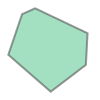

[Segment2D(Point2D(5.15176669001350, 2.47198960681006), Point2D(5.48528630159547, 2.18154319164547)), Segment2D(Point2D(5.48528630159547, 2.18154319164547), Point2D(5.76242597455272, 2.39269678756895)), Segment2D(Point2D(5.76242597455272, 2.39269678756895), Point2D(5.77544632937219, 2.64153510281717)), Segment2D(Point2D(5.36266091608405, 2.83778353443945), Point2D(5.77544632937219, 2.64153510281717)), Segment2D(Point2D(5.26025935333725, 2.79194960655229), Point2D(5.36266091608405, 2.83778353443945)), Segment2D(Point2D(5.15176669001350, 2.47198960681006), Point2D(5.26025935333725, 2.79194960655229))] 

{Point2D(5.94433613342218, 2.78257288153722), Point2D(5.77544632937219, 2.64153510281717), Point2D(5.36266091608405, 2.83778353443945), Point2D(5.95350640108354, 3.18554519835800), Point2D(5.50552827818015, 3.24344739593246)}
------------
Point2D(5.67594675735332, 2.95840846856588)
5 {Point2D(5.94433613342218, 2.78257288153722), Point2D(5.77544632937219, 2.64153510281717), Point2D(5.36266

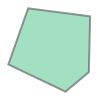

[Segment2D(Point2D(5.36266091608405, 2.83778353443945), Point2D(5.77544632937219, 2.64153510281717)), Segment2D(Point2D(5.77544632937219, 2.64153510281717), Point2D(5.94433613342218, 2.78257288153722)), Segment2D(Point2D(5.94433613342218, 2.78257288153722), Point2D(5.95350640108354, 3.18554519835800)), Segment2D(Point2D(5.50552827818015, 3.24344739593246), Point2D(5.95350640108354, 3.18554519835800)), Segment2D(Point2D(5.36266091608405, 2.83778353443945), Point2D(5.50552827818015, 3.24344739593246))] 

{Point2D(4.85054984875818, 3.04508993173287), Point2D(4.15737986212263, 3.07513395545633), Point2D(4.84305328678782, 3.08950681358710), Point2D(4.60549700870579, 2.70424383185488), Point2D(4.42413114085660, 2.68476035376795), Point2D(4.52036106284734, 3.33210894212919)}
------------
Point2D(4.49878147355114, 3.01075056313247)
6 {Point2D(4.85054984875818, 3.04508993173287), Point2D(4.15737986212263, 3.07513395545633), Point2D(4.84305328678782, 3.08950681358710), Point2D(4.60549700870579, 

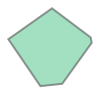

[Segment2D(Point2D(4.15737986212263, 3.07513395545633), Point2D(4.42413114085660, 2.68476035376795)), Segment2D(Point2D(4.42413114085660, 2.68476035376795), Point2D(4.60549700870579, 2.70424383185488)), Segment2D(Point2D(4.60549700870579, 2.70424383185488), Point2D(4.85054984875818, 3.04508993173287)), Segment2D(Point2D(4.84305328678782, 3.08950681358710), Point2D(4.85054984875818, 3.04508993173287)), Segment2D(Point2D(4.52036106284734, 3.33210894212919), Point2D(4.84305328678782, 3.08950681358710)), Segment2D(Point2D(4.15737986212263, 3.07513395545633), Point2D(4.52036106284734, 3.33210894212919))] 

{Point2D(4.85054984875818, 3.04508993173287), Point2D(5.26025935333725, 2.79194960655229), Point2D(5.15176669001350, 2.47198960681006), Point2D(4.60549700870579, 2.70424383185488), Point2D(4.89789315799470, 2.37048594782207)}
------------
Point2D(4.93003057818991, 2.70070207526771)
5 {Point2D(4.85054984875818, 3.04508993173287), Point2D(5.26025935333725, 2.79194960655229), Point2D(5.15176

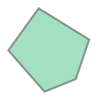

[Segment2D(Point2D(4.60549700870579, 2.70424383185488), Point2D(4.89789315799470, 2.37048594782207)), Segment2D(Point2D(4.89789315799470, 2.37048594782207), Point2D(5.15176669001350, 2.47198960681006)), Segment2D(Point2D(5.15176669001350, 2.47198960681006), Point2D(5.26025935333725, 2.79194960655229)), Segment2D(Point2D(4.85054984875818, 3.04508993173287), Point2D(5.26025935333725, 2.79194960655229)), Segment2D(Point2D(4.60549700870579, 2.70424383185488), Point2D(4.85054984875818, 3.04508993173287))] 

{Point2D(6.61255721492166, 4.99147349713139), Point2D(6.71229777664019, 5.29486310061524), Point2D(7.22003888723110, 5.18390333905947), Point2D(6.82885178721855, 5.35315395258872), Point2D(7.26408764019229, 5.06035552971547), Point2D(6.96431640469173, 4.67295398133422), Point2D(6.94695713678753, 4.67173464123568)}
------------
Point2D(6.92546338401185, 5.03039885134303)
7 {Point2D(6.61255721492166, 4.99147349713139), Point2D(6.71229777664019, 5.29486310061524), Point2D(7.22003888723110, 

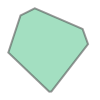

[Segment2D(Point2D(6.61255721492166, 4.99147349713139), Point2D(6.94695713678753, 4.67173464123568)), Segment2D(Point2D(6.94695713678753, 4.67173464123568), Point2D(6.96431640469173, 4.67295398133422)), Segment2D(Point2D(6.96431640469173, 4.67295398133422), Point2D(7.26408764019229, 5.06035552971547)), Segment2D(Point2D(7.22003888723110, 5.18390333905947), Point2D(7.26408764019229, 5.06035552971547)), Segment2D(Point2D(6.82885178721855, 5.35315395258872), Point2D(7.22003888723110, 5.18390333905947)), Segment2D(Point2D(6.71229777664019, 5.29486310061524), Point2D(6.82885178721855, 5.35315395258872)), Segment2D(Point2D(6.61255721492166, 4.99147349713139), Point2D(6.71229777664019, 5.29486310061524))] 

{Point2D(4.04848501707951, 8.43731682210541), Point2D(4.04294310913442, 7.77388043378930), Point2D(4.35939572603270, 8.11040397789086), Point2D(3.93321336754438, 8.43661073235953), Point2D(4.35786263421321, 8.07285022601454), Point2D(3.65671890161843, 8.03964933403804)}
------------
Point2

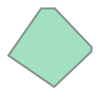

[Segment2D(Point2D(3.65671890161843, 8.03964933403804), Point2D(4.04294310913442, 7.77388043378930)), Segment2D(Point2D(4.04294310913442, 7.77388043378930), Point2D(4.35786263421321, 8.07285022601454)), Segment2D(Point2D(4.35786263421321, 8.07285022601454), Point2D(4.35939572603270, 8.11040397789086)), Segment2D(Point2D(4.04848501707951, 8.43731682210541), Point2D(4.35939572603270, 8.11040397789086)), Segment2D(Point2D(3.93321336754438, 8.43661073235953), Point2D(4.04848501707951, 8.43731682210541)), Segment2D(Point2D(3.65671890161843, 8.03964933403804), Point2D(3.93321336754438, 8.43661073235953))] 

{Point2D(5.00291390841594, 7.26219379442159), Point2D(4.80778557844537, 6.88654774432785), Point2D(4.43251284346726, 7.40631371137446), Point2D(4.64512665315735, 7.53323663305744), Point2D(4.36873713193906, 7.04279021557929)}
------------
Point2D(4.67901748188156, 7.20347533600802)
5 {Point2D(5.00291390841594, 7.26219379442159), Point2D(4.80778557844537, 6.88654774432785), Point2D(4.43251

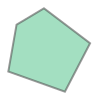

[Segment2D(Point2D(4.36873713193906, 7.04279021557929), Point2D(4.80778557844537, 6.88654774432785)), Segment2D(Point2D(4.80778557844537, 6.88654774432785), Point2D(5.00291390841594, 7.26219379442159)), Segment2D(Point2D(4.64512665315735, 7.53323663305744), Point2D(5.00291390841594, 7.26219379442159)), Segment2D(Point2D(4.43251284346726, 7.40631371137446), Point2D(4.64512665315735, 7.53323663305744)), Segment2D(Point2D(4.36873713193906, 7.04279021557929), Point2D(4.43251284346726, 7.40631371137446))] 

{Point2D(4.04960025269074, 7.62441621466819), Point2D(3.85367528685706, 7.11471158119634), Point2D(4.30957123545019, 7.00424666090378), Point2D(3.82441292218505, 7.38800059424757), Point2D(4.43251284346726, 7.40631371137446), Point2D(4.36873713193906, 7.04279021557929)}
------------
Point2D(4.13168328108574, 7.29949836754033)
6 {Point2D(4.04960025269074, 7.62441621466819), Point2D(3.85367528685706, 7.11471158119634), Point2D(4.30957123545019, 7.00424666090378), Point2D(3.82441292218505, 

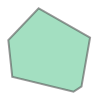

[Segment2D(Point2D(3.82441292218505, 7.38800059424757), Point2D(3.85367528685706, 7.11471158119634)), Segment2D(Point2D(3.85367528685706, 7.11471158119634), Point2D(4.30957123545019, 7.00424666090378)), Segment2D(Point2D(4.30957123545019, 7.00424666090378), Point2D(4.36873713193906, 7.04279021557929)), Segment2D(Point2D(4.36873713193906, 7.04279021557929), Point2D(4.43251284346726, 7.40631371137446)), Segment2D(Point2D(4.04960025269074, 7.62441621466819), Point2D(4.43251284346726, 7.40631371137446)), Segment2D(Point2D(3.82441292218505, 7.38800059424757), Point2D(4.04960025269074, 7.62441621466819))] 

{Point2D(5.00291390841594, 7.26219379442159), Point2D(5.29005931590656, 7.57470530469487), Point2D(5.14686392860505, 7.30111324233505), Point2D(4.69249600658036, 7.75273548788700), Point2D(4.64512665315735, 7.53323663305744), Point2D(5.01817374200949, 7.92736182860668)}
------------
Point2D(4.97174782415968, 7.58989095289621)
6 {Point2D(5.00291390841594, 7.26219379442159), Point2D(5.29005

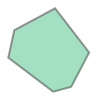

[Segment2D(Point2D(4.64512665315735, 7.53323663305744), Point2D(5.00291390841594, 7.26219379442159)), Segment2D(Point2D(5.00291390841594, 7.26219379442159), Point2D(5.14686392860505, 7.30111324233505)), Segment2D(Point2D(5.14686392860505, 7.30111324233505), Point2D(5.29005931590656, 7.57470530469487)), Segment2D(Point2D(5.01817374200949, 7.92736182860668), Point2D(5.29005931590656, 7.57470530469487)), Segment2D(Point2D(4.69249600658036, 7.75273548788700), Point2D(5.01817374200949, 7.92736182860668)), Segment2D(Point2D(4.64512665315735, 7.53323663305744), Point2D(4.69249600658036, 7.75273548788700))] 

{Point2D(1.80403346544819, 5.76751620906806), Point2D(1.16999542718935, 6.02289409729205), Point2D(1.79777689538719, 5.75526375217516), Point2D(1.29340021594517, 6.19646331294936), Point2D(1.37798698343782, 5.62860656768946), Point2D(1.66004749145310, 6.23560231869859)}
------------
Point2D(1.48919135136684, 5.93944449863521)
6 {Point2D(1.80403346544819, 5.76751620906806), Point2D(1.16999

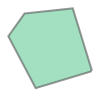

[Segment2D(Point2D(1.16999542718935, 6.02289409729205), Point2D(1.37798698343782, 5.62860656768946)), Segment2D(Point2D(1.37798698343782, 5.62860656768946), Point2D(1.79777689538719, 5.75526375217516)), Segment2D(Point2D(1.79777689538719, 5.75526375217516), Point2D(1.80403346544819, 5.76751620906806)), Segment2D(Point2D(1.66004749145310, 6.23560231869859), Point2D(1.80403346544819, 5.76751620906806)), Segment2D(Point2D(1.29340021594517, 6.19646331294936), Point2D(1.66004749145310, 6.23560231869859)), Segment2D(Point2D(1.16999542718935, 6.02289409729205), Point2D(1.29340021594517, 6.19646331294936))] 

{Point2D(2.43182600049971, 5.51636394445427), Point2D(2.38768338453953, 5.82264925581135), Point2D(3.05191244053625, 5.70621347862500), Point2D(3.04868990714392, 5.67080621247625), Point2D(2.79040982134883, 6.00128780090868), Point2D(2.68163758230074, 5.35957209491750)}
------------
Point2D(2.69600001115753, 5.69516236814184)
6 {Point2D(2.43182600049971, 5.51636394445427), Point2D(2.38768

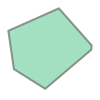

[Segment2D(Point2D(2.38768338453953, 5.82264925581135), Point2D(2.43182600049971, 5.51636394445427)), Segment2D(Point2D(2.43182600049971, 5.51636394445427), Point2D(2.68163758230074, 5.35957209491750)), Segment2D(Point2D(2.68163758230074, 5.35957209491750), Point2D(3.04868990714392, 5.67080621247625)), Segment2D(Point2D(3.04868990714392, 5.67080621247625), Point2D(3.05191244053625, 5.70621347862500)), Segment2D(Point2D(2.79040982134883, 6.00128780090868), Point2D(3.05191244053625, 5.70621347862500)), Segment2D(Point2D(2.38768338453953, 5.82264925581135), Point2D(2.79040982134883, 6.00128780090868))] 

{Point2D(1.74499722507690, 6.88459134400036), Point2D(1.72247810536189, 6.31897126819292), Point2D(2.17210267978409, 6.37124904792089), Point2D(1.61774578630239, 6.76407425139212), Point2D(2.15403179463928, 6.85236026686842)}
------------
Point2D(1.90797223016889, 6.60136325379137)
5 {Point2D(1.74499722507690, 6.88459134400036), Point2D(1.72247810536189, 6.31897126819292), Point2D(2.17210

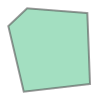

[Segment2D(Point2D(1.61774578630239, 6.76407425139212), Point2D(1.72247810536189, 6.31897126819292)), Segment2D(Point2D(1.72247810536189, 6.31897126819292), Point2D(2.17210267978409, 6.37124904792089)), Segment2D(Point2D(2.15403179463928, 6.85236026686842), Point2D(2.17210267978409, 6.37124904792089)), Segment2D(Point2D(1.74499722507690, 6.88459134400036), Point2D(2.15403179463928, 6.85236026686842)), Segment2D(Point2D(1.61774578630239, 6.76407425139212), Point2D(1.74499722507690, 6.88459134400036))] 

{Point2D(2.21276911016649, 6.33693905088896), Point2D(1.72247810536189, 6.31897126819292), Point2D(2.17210267978409, 6.37124904792089), Point2D(1.80403346544819, 5.76751620906806), Point2D(2.25209809385145, 5.91905211714947), Point2D(1.66004749145310, 6.23560231869859)}
------------
Point2D(1.96781530565164, 6.08667197412998)
6 {Point2D(2.21276911016649, 6.33693905088896), Point2D(1.72247810536189, 6.31897126819292), Point2D(2.17210267978409, 6.37124904792089), Point2D(1.80403346544819, 

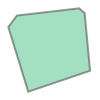

[Segment2D(Point2D(1.66004749145310, 6.23560231869859), Point2D(1.80403346544819, 5.76751620906806)), Segment2D(Point2D(1.80403346544819, 5.76751620906806), Point2D(2.25209809385145, 5.91905211714947)), Segment2D(Point2D(2.21276911016649, 6.33693905088896), Point2D(2.25209809385145, 5.91905211714947)), Segment2D(Point2D(2.17210267978409, 6.37124904792089), Point2D(2.21276911016649, 6.33693905088896)), Segment2D(Point2D(1.72247810536189, 6.31897126819292), Point2D(2.17210267978409, 6.37124904792089)), Segment2D(Point2D(1.66004749145310, 6.23560231869859), Point2D(1.72247810536189, 6.31897126819292))] 

{Point2D(1.57269358065911, 3.40710154367224), Point2D(1.83347792095711, 3.88693718420646), Point2D(1.99106912638451, 3.21416794513874), Point2D(2.22021960670624, 3.60662152204895), Point2D(1.55460083349911, 3.57207738802356)}
------------
Point2D(1.88051274311635, 3.53582813367401)
5 {Point2D(1.57269358065911, 3.40710154367224), Point2D(1.83347792095711, 3.88693718420646), Point2D(1.99106

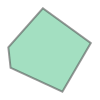

[Segment2D(Point2D(1.55460083349911, 3.57207738802356), Point2D(1.57269358065911, 3.40710154367224)), Segment2D(Point2D(1.57269358065911, 3.40710154367224), Point2D(1.99106912638451, 3.21416794513874)), Segment2D(Point2D(1.99106912638451, 3.21416794513874), Point2D(2.22021960670624, 3.60662152204895)), Segment2D(Point2D(1.83347792095711, 3.88693718420646), Point2D(2.22021960670624, 3.60662152204895)), Segment2D(Point2D(1.55460083349911, 3.57207738802356), Point2D(1.83347792095711, 3.88693718420646))] 

{Point2D(2.75547337889339, 4.03215140887046), Point2D(2.80395526720645, 3.45414732326309), Point2D(2.89915317461666, 3.88529794752344), Point2D(2.28763118763262, 3.62096612465727), Point2D(2.49370143807745, 4.02498445269985), Point2D(2.62819217435663, 3.40176771834601)}
------------
Point2D(2.61733390690782, 3.72934310079568)
6 {Point2D(2.75547337889339, 4.03215140887046), Point2D(2.80395526720645, 3.45414732326309), Point2D(2.89915317461666, 3.88529794752344), Point2D(2.28763118763262, 

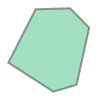

[Segment2D(Point2D(2.28763118763262, 3.62096612465727), Point2D(2.62819217435663, 3.40176771834601)), Segment2D(Point2D(2.62819217435663, 3.40176771834601), Point2D(2.80395526720645, 3.45414732326309)), Segment2D(Point2D(2.80395526720645, 3.45414732326309), Point2D(2.89915317461666, 3.88529794752344)), Segment2D(Point2D(2.75547337889339, 4.03215140887046), Point2D(2.89915317461666, 3.88529794752344)), Segment2D(Point2D(2.49370143807745, 4.02498445269985), Point2D(2.75547337889339, 4.03215140887046)), Segment2D(Point2D(2.28763118763262, 3.62096612465727), Point2D(2.49370143807745, 4.02498445269985))] 

{Point2D(4.54901461094557, 4.23295338750661), Point2D(4.96196818993753, 3.77473161671970), Point2D(4.69303590669961, 4.21094545059717), Point2D(4.36056510088805, 4.08725129232451), Point2D(4.96944862364537, 3.80182245123166), Point2D(4.51116767928395, 3.57115103870189), Point2D(4.36194220079038, 3.70095163277824)}
------------
Point2D(4.62059709117238, 3.89047152683082)
7 {Point2D(4.54901

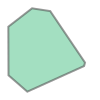

[Segment2D(Point2D(4.36056510088805, 4.08725129232451), Point2D(4.36194220079038, 3.70095163277824)), Segment2D(Point2D(4.36194220079038, 3.70095163277824), Point2D(4.51116767928395, 3.57115103870189)), Segment2D(Point2D(4.51116767928395, 3.57115103870189), Point2D(4.96196818993753, 3.77473161671970)), Segment2D(Point2D(4.96196818993753, 3.77473161671970), Point2D(4.96944862364537, 3.80182245123166)), Segment2D(Point2D(4.69303590669961, 4.21094545059717), Point2D(4.96944862364537, 3.80182245123166)), Segment2D(Point2D(4.54901461094557, 4.23295338750661), Point2D(4.69303590669961, 4.21094545059717)), Segment2D(Point2D(4.36056510088805, 4.08725129232451), Point2D(4.54901461094557, 4.23295338750661))] 

{Point2D(3.92063670885090, 3.59942644041575), Point2D(4.36056510088805, 4.08725129232451), Point2D(3.78647897093320, 3.90560682766692), Point2D(3.93810406331196, 4.20020606911538), Point2D(4.36194220079038, 3.70095163277824)}
------------
Point2D(4.10194268198721, 3.88862260224965)
5 {Poin

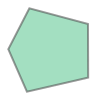

[Segment2D(Point2D(3.78647897093320, 3.90560682766692), Point2D(3.92063670885090, 3.59942644041575)), Segment2D(Point2D(3.92063670885090, 3.59942644041575), Point2D(4.36194220079038, 3.70095163277824)), Segment2D(Point2D(4.36056510088805, 4.08725129232451), Point2D(4.36194220079038, 3.70095163277824)), Segment2D(Point2D(3.93810406331196, 4.20020606911538), Point2D(4.36056510088805, 4.08725129232451)), Segment2D(Point2D(3.78647897093320, 3.90560682766692), Point2D(3.93810406331196, 4.20020606911538))] 

{Point2D(4.15737986212263, 3.07513395545633), Point2D(3.93599679639431, 2.43836767442560), Point2D(4.25622015437161, 2.45887106273853), Point2D(4.09888570797582, 3.08510915234404), Point2D(4.42413114085660, 2.68476035376795), Point2D(3.79846257067914, 2.85687377575467)}
------------
Point2D(4.0932994431233, 2.73367534684617)
6 {Point2D(4.15737986212263, 3.07513395545633), Point2D(3.93599679639431, 2.43836767442560), Point2D(4.25622015437161, 2.45887106273853), Point2D(4.09888570797582, 3

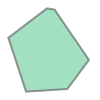

[Segment2D(Point2D(3.79846257067914, 2.85687377575467), Point2D(3.93599679639431, 2.43836767442560)), Segment2D(Point2D(3.93599679639431, 2.43836767442560), Point2D(4.25622015437161, 2.45887106273853)), Segment2D(Point2D(4.25622015437161, 2.45887106273853), Point2D(4.42413114085660, 2.68476035376795)), Segment2D(Point2D(4.15737986212263, 3.07513395545633), Point2D(4.42413114085660, 2.68476035376795)), Segment2D(Point2D(4.09888570797582, 3.08510915234404), Point2D(4.15737986212263, 3.07513395545633)), Segment2D(Point2D(3.79846257067914, 2.85687377575467), Point2D(4.09888570797582, 3.08510915234404))] 

{Point2D(6.15432893423757, 2.08874364119236), Point2D(6.39857666252515, 2.47655228073248), Point2D(6.52250030530374, 1.82443690072290), Point2D(6.83348995458188, 2.28681990806661), Point2D(6.14696804653558, 2.14671163864652), Point2D(6.62109217790959, 1.84320820575281)}
------------
Point2D(6.49575876027356, 2.16197737892532)
6 {Point2D(6.15432893423757, 2.08874364119236), Point2D(6.39857

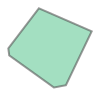

[Segment2D(Point2D(6.14696804653558, 2.14671163864652), Point2D(6.15432893423757, 2.08874364119236)), Segment2D(Point2D(6.15432893423757, 2.08874364119236), Point2D(6.52250030530374, 1.82443690072290)), Segment2D(Point2D(6.52250030530374, 1.82443690072290), Point2D(6.62109217790959, 1.84320820575281)), Segment2D(Point2D(6.62109217790959, 1.84320820575281), Point2D(6.83348995458188, 2.28681990806661)), Segment2D(Point2D(6.39857666252515, 2.47655228073248), Point2D(6.83348995458188, 2.28681990806661)), Segment2D(Point2D(6.14696804653558, 2.14671163864652), Point2D(6.39857666252515, 2.47655228073248))] 

{Point2D(5.47001223576051, 2.05480547093334), Point2D(5.79551615856061, 1.72411648817568), Point2D(6.15432893423757, 2.08874364119236), Point2D(5.84221016190180, 1.72385994238286), Point2D(5.76242597455272, 2.39269678756895), Point2D(5.48528630159547, 2.18154319164547), Point2D(6.14696804653558, 2.14671163864652)}
------------
Point2D(5.80543150530983, 2.07431829762914)
7 {Point2D(5.47001

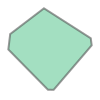

[Segment2D(Point2D(5.47001223576051, 2.05480547093334), Point2D(5.79551615856061, 1.72411648817568)), Segment2D(Point2D(5.79551615856061, 1.72411648817568), Point2D(5.84221016190180, 1.72385994238286)), Segment2D(Point2D(5.84221016190180, 1.72385994238286), Point2D(6.15432893423757, 2.08874364119236)), Segment2D(Point2D(6.14696804653558, 2.14671163864652), Point2D(6.15432893423757, 2.08874364119236)), Segment2D(Point2D(5.76242597455272, 2.39269678756895), Point2D(6.14696804653558, 2.14671163864652)), Segment2D(Point2D(5.48528630159547, 2.18154319164547), Point2D(5.76242597455272, 2.39269678756895)), Segment2D(Point2D(5.47001223576051, 2.05480547093334), Point2D(5.48528630159547, 2.18154319164547))] 

{Point2D(5.47001223576051, 2.05480547093334), Point2D(5.79551615856061, 1.72411648817568), Point2D(5.46358836082911, 1.38214005266382), Point2D(5.33603738424748, 1.40480545654722), Point2D(5.09578017628532, 1.79908215750462), Point2D(5.09228932745062, 1.78257390523699)}
------------
Point2

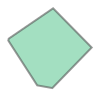

[Segment2D(Point2D(5.09228932745062, 1.78257390523699), Point2D(5.33603738424748, 1.40480545654722)), Segment2D(Point2D(5.33603738424748, 1.40480545654722), Point2D(5.46358836082911, 1.38214005266382)), Segment2D(Point2D(5.46358836082911, 1.38214005266382), Point2D(5.79551615856061, 1.72411648817568)), Segment2D(Point2D(5.47001223576051, 2.05480547093334), Point2D(5.79551615856061, 1.72411648817568)), Segment2D(Point2D(5.09578017628532, 1.79908215750462), Point2D(5.47001223576051, 2.05480547093334)), Segment2D(Point2D(5.09228932745062, 1.78257390523699), Point2D(5.09578017628532, 1.79908215750462))] 

{Point2D(5.47001223576051, 2.05480547093334), Point2D(5.15176669001350, 2.47198960681006), Point2D(5.09578017628532, 1.79908215750462), Point2D(4.82454361551226, 2.18359005411626), Point2D(4.89789315799470, 2.37048594782207), Point2D(5.48528630159547, 2.18154319164547)}
------------
Point2D(5.14883291170946, 2.15344967295639)
6 {Point2D(5.47001223576051, 2.05480547093334), Point2D(5.15176

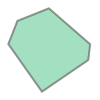

[Segment2D(Point2D(4.82454361551226, 2.18359005411626), Point2D(5.09578017628532, 1.79908215750462)), Segment2D(Point2D(5.09578017628532, 1.79908215750462), Point2D(5.47001223576051, 2.05480547093334)), Segment2D(Point2D(5.47001223576051, 2.05480547093334), Point2D(5.48528630159547, 2.18154319164547)), Segment2D(Point2D(5.15176669001350, 2.47198960681006), Point2D(5.48528630159547, 2.18154319164547)), Segment2D(Point2D(4.89789315799470, 2.37048594782207), Point2D(5.15176669001350, 2.47198960681006)), Segment2D(Point2D(4.82454361551226, 2.18359005411626), Point2D(4.89789315799470, 2.37048594782207))] 

{Point2D(4.41902493486658, 1.97981583523228), Point2D(4.67143245384946, 1.52982346986363), Point2D(5.09578017628532, 1.79908215750462), Point2D(4.59615308224684, 1.55899493880606), Point2D(4.82454361551226, 2.18359005411626), Point2D(5.09228932745062, 1.78257390523699), Point2D(4.45595979052028, 2.05608996299693)}
------------
Point2D(4.74414993265282, 1.86798136291649)
7 {Point2D(4.41902

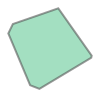

[Segment2D(Point2D(4.41902493486658, 1.97981583523228), Point2D(4.59615308224684, 1.55899493880606)), Segment2D(Point2D(4.59615308224684, 1.55899493880606), Point2D(4.67143245384946, 1.52982346986363)), Segment2D(Point2D(4.67143245384946, 1.52982346986363), Point2D(5.09228932745062, 1.78257390523699)), Segment2D(Point2D(5.09228932745062, 1.78257390523699), Point2D(5.09578017628532, 1.79908215750462)), Segment2D(Point2D(4.82454361551226, 2.18359005411626), Point2D(5.09578017628532, 1.79908215750462)), Segment2D(Point2D(4.45595979052028, 2.05608996299693), Point2D(4.82454361551226, 2.18359005411626)), Segment2D(Point2D(4.41902493486658, 1.97981583523228), Point2D(4.45595979052028, 2.05608996299693))] 

{Point2D(3.64018968091538, 1.25225148377761), Point2D(3.47438333690302, 1.39445993756838), Point2D(3.06092749334847, 1.25485825795114)}
------------
Point2D(3.34942144931014, 1.09693405367833)
3 {Point2D(3.64018968091538, 1.25225148377761), Point2D(3.47438333690302, 1.39445993756838), Poin

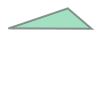

[Segment2D(Point2D(3.06092749334847, 1.25485825795114), Point2D(3.64018968091538, 1.25225148377761)), Segment2D(Point2D(3.47438333690302, 1.39445993756838), Point2D(3.64018968091538, 1.25225148377761)), Segment2D(Point2D(3.06092749334847, 1.25485825795114), Point2D(3.47438333690302, 1.39445993756838))] 

{Point2D(3.06092749334847, 1.25485825795114), Point2D(2.88725199271747, 1.46376744090209)}
{Point2D(4.24897197229203, 1.02747222916053), Point2D(4.18313754529236, 1.34638549936334), Point2D(4.04896181312043, 1.42676739342716), Point2D(3.64018968091538, 1.25225148377761), Point2D(10, 4.74504361557897)}
------------
Point2D(3.94036231797456, 1.11599416630651)
5 {Point2D(4.24897197229203, 1.02747222916053), Point2D(4.18313754529236, 1.34638549936334), Point2D(4.04896181312043, 1.42676739342716), Point2D(3.64018968091538, 1.25225148377761), Point2D(10, 4.74504361557897)}
Triangle(Point2D(3.64018968091538, 1.25225148377761), Point2D(4.24897197229203, 1.02747222916053), Point2D(10, 4.7450436

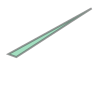

[Segment2D(Point2D(3.64018968091538, 1.25225148377761), Point2D(4.24897197229203, 1.02747222916053)), Segment2D(Point2D(4.24897197229203, 1.02747222916053), Point2D(10, 4.74504361557897)), Segment2D(Point2D(3.64018968091538, 1.25225148377761), Point2D(10, 4.74504361557897))] 

{Point2D(4.41902493486658, 1.97981583523228), Point2D(3.96331542212928, 1.84939634446710), Point2D(4.18313754529236, 1.34638549936334), Point2D(4.59615308224684, 1.55899493880606), Point2D(4.04896181312043, 1.42676739342716)}
------------
Point2D(4.27173972127072, 1.6691387050156)
5 {Point2D(4.41902493486658, 1.97981583523228), Point2D(3.96331542212928, 1.84939634446710), Point2D(4.18313754529236, 1.34638549936334), Point2D(4.59615308224684, 1.55899493880606), Point2D(4.04896181312043, 1.42676739342716)}
Polygon(Point2D(3.96331542212928, 1.8493963444671), Point2D(4.04896181312043, 1.42676739342716), Point2D(4.18313754529236, 1.34638549936334), Point2D(4.59615308224684, 1.55899493880606), Point2D(4.41902493486658,

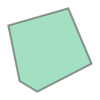

[Segment2D(Point2D(3.96331542212928, 1.84939634446710), Point2D(4.04896181312043, 1.42676739342716)), Segment2D(Point2D(4.04896181312043, 1.42676739342716), Point2D(4.18313754529236, 1.34638549936334)), Segment2D(Point2D(4.18313754529236, 1.34638549936334), Point2D(4.59615308224684, 1.55899493880606)), Segment2D(Point2D(4.41902493486658, 1.97981583523228), Point2D(4.59615308224684, 1.55899493880606)), Segment2D(Point2D(3.96331542212928, 1.84939634446710), Point2D(4.41902493486658, 1.97981583523228))] 

{Point2D(8.66871862502640, 5.14914668327557), Point2D(9.17710219174108, 4.74596453905485), Point2D(8.90398421876079, 4.66001265550531), Point2D(8.63273421036155, 5.01751030580895), Point2D(9.29177939063396, 5.01015446431030), Point2D(8.97264810881357, 5.30672154990930)}
------------
Point2D(8.96334646150705, 4.98522978020118)
6 {Point2D(8.66871862502640, 5.14914668327557), Point2D(9.17710219174108, 4.74596453905485), Point2D(8.90398421876079, 4.66001265550531), Point2D(8.63273421036155, 

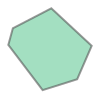

[Segment2D(Point2D(8.63273421036155, 5.01751030580895), Point2D(8.90398421876079, 4.66001265550531)), Segment2D(Point2D(8.90398421876079, 4.66001265550531), Point2D(9.17710219174108, 4.74596453905485)), Segment2D(Point2D(9.17710219174108, 4.74596453905485), Point2D(9.29177939063396, 5.01015446431030)), Segment2D(Point2D(8.97264810881357, 5.30672154990930), Point2D(9.29177939063396, 5.01015446431030)), Segment2D(Point2D(8.66871862502640, 5.14914668327557), Point2D(8.97264810881357, 5.30672154990930)), Segment2D(Point2D(8.63273421036155, 5.01751030580895), Point2D(8.66871862502640, 5.14914668327557))] 

{Point2D(6.45467693838406, 8.50098895058835), Point2D(7.01114471318553, 8.49417533662021), Point2D(6.58161873273345, 8.38928437310411), Point2D(6.44813344772824, 8.81575507108863)}
------------
Point2D(6.73755921621716, 8.67730263057114)
4 {Point2D(6.45467693838406, 8.50098895058835), Point2D(7.01114471318553, 8.49417533662021), Point2D(6.58161873273345, 8.38928437310411), Point2D(6.44813

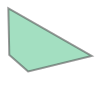

[Segment2D(Point2D(6.44813344772824, 8.81575507108863), Point2D(6.45467693838406, 8.50098895058835)), Segment2D(Point2D(6.45467693838406, 8.50098895058835), Point2D(6.58161873273345, 8.38928437310411)), Segment2D(Point2D(6.58161873273345, 8.38928437310411), Point2D(7.01114471318553, 8.49417533662021)), Segment2D(Point2D(6.44813344772824, 8.81575507108863), Point2D(7.01114471318553, 8.49417533662021))] 

{Point2D(6.34975416610223, 3.76627455899123), Point2D(6.54023023825480, 3.31994665953007), Point2D(6.42739232455750, 3.72673650070458), Point2D(5.97057527066005, 3.20093401111702), Point2D(6.00340646808454, 3.65772328842083), Point2D(6.45635856031169, 3.18634159960293)}
------------
Point2D(6.23529686577623, 3.44039268187894)
6 {Point2D(6.34975416610223, 3.76627455899123), Point2D(6.54023023825480, 3.31994665953007), Point2D(6.42739232455750, 3.72673650070458), Point2D(5.97057527066005, 3.20093401111702), Point2D(6.00340646808454, 3.65772328842083), Point2D(6.45635856031169, 3.186341599

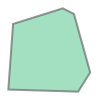

[Segment2D(Point2D(5.97057527066005, 3.20093401111702), Point2D(6.45635856031169, 3.18634159960293)), Segment2D(Point2D(6.45635856031169, 3.18634159960293), Point2D(6.54023023825480, 3.31994665953007)), Segment2D(Point2D(6.42739232455750, 3.72673650070458), Point2D(6.54023023825480, 3.31994665953007)), Segment2D(Point2D(6.34975416610223, 3.76627455899123), Point2D(6.42739232455750, 3.72673650070458)), Segment2D(Point2D(6.00340646808454, 3.65772328842083), Point2D(6.34975416610223, 3.76627455899123)), Segment2D(Point2D(5.97057527066005, 3.20093401111702), Point2D(6.00340646808454, 3.65772328842083))] 

{Point2D(6.36303138345301, 2.64484861528881), Point2D(6.53514909880813, 2.89498760026843), Point2D(5.94433613342218, 2.78257288153722), Point2D(5.97057527066005, 3.20093401111702), Point2D(5.95350640108354, 3.18554519835800), Point2D(6.45635856031169, 3.18634159960293)}
------------
Point2D(6.22044636374904, 2.94601752525853)
6 {Point2D(6.36303138345301, 2.64484861528881), Point2D(6.53514

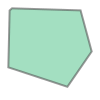

[Segment2D(Point2D(5.94433613342218, 2.78257288153722), Point2D(6.36303138345301, 2.64484861528881)), Segment2D(Point2D(6.36303138345301, 2.64484861528881), Point2D(6.53514909880813, 2.89498760026843)), Segment2D(Point2D(6.45635856031169, 3.18634159960293), Point2D(6.53514909880813, 2.89498760026843)), Segment2D(Point2D(5.97057527066005, 3.20093401111702), Point2D(6.45635856031169, 3.18634159960293)), Segment2D(Point2D(5.95350640108354, 3.18554519835800), Point2D(5.97057527066005, 3.20093401111702)), Segment2D(Point2D(5.94433613342218, 2.78257288153722), Point2D(5.95350640108354, 3.18554519835800))] 

{Point2D(4.04294310913442, 7.77388043378930), Point2D(4.04960025269074, 7.62441621466819), Point2D(4.69249600658036, 7.75273548788700), Point2D(4.43251284346726, 7.40631371137446), Point2D(4.64512665315735, 7.53323663305744), Point2D(4.35786263421321, 8.07285022601454)}
------------
Point2D(4.37093946302221, 7.7195495045106)
6 {Point2D(4.04294310913442, 7.77388043378930), Point2D(4.049600

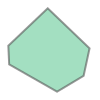

[Segment2D(Point2D(4.04294310913442, 7.77388043378930), Point2D(4.04960025269074, 7.62441621466819)), Segment2D(Point2D(4.04960025269074, 7.62441621466819), Point2D(4.43251284346726, 7.40631371137446)), Segment2D(Point2D(4.43251284346726, 7.40631371137446), Point2D(4.64512665315735, 7.53323663305744)), Segment2D(Point2D(4.64512665315735, 7.53323663305744), Point2D(4.69249600658036, 7.75273548788700)), Segment2D(Point2D(4.35786263421321, 8.07285022601454), Point2D(4.69249600658036, 7.75273548788700)), Segment2D(Point2D(4.04294310913442, 7.77388043378930), Point2D(4.35786263421321, 8.07285022601454))] 

{Point2D(2.43182600049971, 5.51636394445427), Point2D(2.71229575013568, 5.19625830902234), Point2D(2.05248260234590, 5.27935937235911), Point2D(2.20481395187786, 4.93139069306930), Point2D(2.40831419810647, 4.86996904216703), Point2D(2.68163758230074, 5.35957209491750)}
------------
Point2D(2.38567243050474, 5.20072707684067)
6 {Point2D(2.43182600049971, 5.51636394445427), Point2D(2.71229

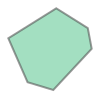

[Segment2D(Point2D(2.05248260234590, 5.27935937235911), Point2D(2.20481395187786, 4.93139069306930)), Segment2D(Point2D(2.20481395187786, 4.93139069306930), Point2D(2.40831419810647, 4.86996904216703)), Segment2D(Point2D(2.40831419810647, 4.86996904216703), Point2D(2.71229575013568, 5.19625830902234)), Segment2D(Point2D(2.68163758230074, 5.35957209491750), Point2D(2.71229575013568, 5.19625830902234)), Segment2D(Point2D(2.43182600049971, 5.51636394445427), Point2D(2.68163758230074, 5.35957209491750)), Segment2D(Point2D(2.05248260234590, 5.27935937235911), Point2D(2.43182600049971, 5.51636394445427))] 

{Point2D(4.15737986212263, 3.07513395545633), Point2D(3.92063670885090, 3.59942644041575), Point2D(4.09888570797582, 3.08510915234404), Point2D(4.51116767928395, 3.57115103870189), Point2D(3.87858863533811, 3.49156710365318), Point2D(4.52036106284734, 3.33210894212919), Point2D(4.36194220079038, 3.70095163277824)}
------------
Point2D(4.21009018069188, 3.41853154398811)
7 {Point2D(4.15737

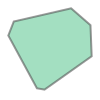

[Segment2D(Point2D(3.87858863533811, 3.49156710365318), Point2D(4.09888570797582, 3.08510915234404)), Segment2D(Point2D(4.09888570797582, 3.08510915234404), Point2D(4.15737986212263, 3.07513395545633)), Segment2D(Point2D(4.15737986212263, 3.07513395545633), Point2D(4.52036106284734, 3.33210894212919)), Segment2D(Point2D(4.51116767928395, 3.57115103870189), Point2D(4.52036106284734, 3.33210894212919)), Segment2D(Point2D(4.36194220079038, 3.70095163277824), Point2D(4.51116767928395, 3.57115103870189)), Segment2D(Point2D(3.92063670885090, 3.59942644041575), Point2D(4.36194220079038, 3.70095163277824)), Segment2D(Point2D(3.87858863533811, 3.49156710365318), Point2D(3.92063670885090, 3.59942644041575))] 

{Point2D(4.25622015437161, 2.45887106273853), Point2D(4.60549700870579, 2.70424383185488), Point2D(4.82454361551226, 2.18359005411626), Point2D(4.42413114085660, 2.68476035376795), Point2D(4.89789315799470, 2.37048594782207), Point2D(4.45595979052028, 2.05608996299693)}
------------
Point2

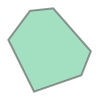

[Segment2D(Point2D(4.25622015437161, 2.45887106273853), Point2D(4.45595979052028, 2.05608996299693)), Segment2D(Point2D(4.45595979052028, 2.05608996299693), Point2D(4.82454361551226, 2.18359005411626)), Segment2D(Point2D(4.82454361551226, 2.18359005411626), Point2D(4.89789315799470, 2.37048594782207)), Segment2D(Point2D(4.60549700870579, 2.70424383185488), Point2D(4.89789315799470, 2.37048594782207)), Segment2D(Point2D(4.42413114085660, 2.68476035376795), Point2D(4.60549700870579, 2.70424383185488)), Segment2D(Point2D(4.25622015437161, 2.45887106273853), Point2D(4.42413114085660, 2.68476035376795))] 

{Point2D(6.36303138345301, 2.64484861528881), Point2D(5.94433613342218, 2.78257288153722), Point2D(5.77544632937219, 2.64153510281717), Point2D(5.76242597455272, 2.39269678756895), Point2D(6.39857666252515, 2.47655228073248), Point2D(6.14696804653558, 2.14671163864652)}
------------
Point2D(6.06950256005258, 2.48713358743957)
6 {Point2D(6.36303138345301, 2.64484861528881), Point2D(5.94433

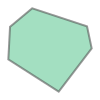

[Segment2D(Point2D(5.76242597455272, 2.39269678756895), Point2D(6.14696804653558, 2.14671163864652)), Segment2D(Point2D(6.14696804653558, 2.14671163864652), Point2D(6.39857666252515, 2.47655228073248)), Segment2D(Point2D(6.36303138345301, 2.64484861528881), Point2D(6.39857666252515, 2.47655228073248)), Segment2D(Point2D(5.94433613342218, 2.78257288153722), Point2D(6.36303138345301, 2.64484861528881)), Segment2D(Point2D(5.77544632937219, 2.64153510281717), Point2D(5.94433613342218, 2.78257288153722)), Segment2D(Point2D(5.76242597455272, 2.39269678756895), Point2D(5.77544632937219, 2.64153510281717))] 

{Point2D(6.44813344772824, 8.81575507108863), Point2D(6.24696859209566, 8.98370246637243)}
{Point2D(2.43182600049971, 5.51636394445427), Point2D(2.38768338453953, 5.82264925581135), Point2D(2.05248260234590, 5.27935937235911), Point2D(1.80403346544819, 5.76751620906806), Point2D(1.96349810637318, 5.31366456702517), Point2D(1.79777689538719, 5.75526375217516), Point2D(2.25209809385145, 5.9

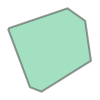

[Segment2D(Point2D(1.79777689538719, 5.75526375217516), Point2D(1.96349810637318, 5.31366456702517)), Segment2D(Point2D(1.96349810637318, 5.31366456702517), Point2D(2.05248260234590, 5.27935937235911)), Segment2D(Point2D(2.05248260234590, 5.27935937235911), Point2D(2.43182600049971, 5.51636394445427)), Segment2D(Point2D(2.38768338453953, 5.82264925581135), Point2D(2.43182600049971, 5.51636394445427)), Segment2D(Point2D(2.25209809385145, 5.91905211714947), Point2D(2.38768338453953, 5.82264925581135)), Segment2D(Point2D(1.80403346544819, 5.76751620906806), Point2D(2.25209809385145, 5.91905211714947)), Segment2D(Point2D(1.79777689538719, 5.75526375217516), Point2D(1.80403346544819, 5.76751620906806))] 


site_edges
{Point2D(7.29456066668857, 7.12759441942123): [Segment2D(Point2D(7.02330674694674, 6.94849969756102), Point2D(7.37595950159276, 6.79415414529816)),
                                               Segment2D(Point2D(7.37595950159276, 6.79415414529816), Point2D(7.45971962685374, 6.

In [13]:
### create shapes and edges

from sympy.geometry import Polygon, Segment2D

tiles      = dict()
site_edges = dict()
edges      = set()

for site in sites:
    vs = site_vertices[site]
    print(vs)
    
    if vs is None:
        continue
    
    if len(vs) < 3:
        continue
        
    shape = convex_hull(*vs)
    shape:Polygon
    tiles[site] = shape
    
    print('------------')
    print(site)
    print(len(vs), vs)
    print(shape)
    display(shape)
    if isinstance(shape, Segment2D):
        continue
    #print(shape.area)
    
    print(shape.sides, '\n')
    site_edges[site] = shape.sides
    edges.update(shape.sides)
    
print('\nsite_edges')
pprint(site_edges)

print('\nedges')
pprint(edges)
print(f'len {len(edges)}')

In [14]:
### draw to image

from PIL import Image, ImageDraw, ImageColor

### colors
red    = ImageColor.getrgb("rgb(100%,0%,0%)")
green  = ImageColor.getrgb("rgb(0%,1000%,0%)")
blue   = ImageColor.getrgb("rgb(0%,0%,100%)")

white  = ImageColor.getrgb("rgb(100%,100%,100%)")
black  = ImageColor.getrgb("rgb(0%,0%,0%)")

### scaling
scale  = 100
margin = 50

iscale = lambda q: (scale*q + 2*margin)
pscale = lambda q: (scale*q + margin)

dot    = lambda p, r: (p.x-r, p.y-r, p.x+r, p.y+r)

### create image
img    = Image.new(mode='RGB', size=(iscale(x_size), iscale(y_size)), color=white)
draw   = ImageDraw.Draw(img)

#################
print('edges')
for edge in edges:
    line = [(pscale(point.x), pscale(y_size-point.y)) for point in edge.points]
    print(*line)
    draw.line(line, fill=black)

#################
print('\nsites:')
for site in sites:
    point = Point(pscale(site.x), pscale(y_size-site.y))
    print(point)
    draw.ellipse(dot(point, 5), fill=red)
    
###
img.save('voromap.jpg', 'JPEG')

edges
(744.695713678753, 582.826535876432) (746.431640469173, 582.704601866579)
(880.836875468951, 414.891105654737) (881.883276593181, 425.630405387925)
(166.958752202575, 330.075559248800) (192.630169438336, 311.868658860357)
(50, 800) (131.047517780220, 768.887413514603)
(546.944862364537, 669.817754876834) (579.329274271796, 648.894776233655)
(486.056510088805, 641.274870767549) (486.194220079038, 679.904836722176)
(550.064432107216, 939.584080165627) (583.603738424747, 909.519454345278)
(293.182600049971, 498.363605554573) (318.163758230074, 514.042790508250)
(304.308030969903, 254.350587504389) (311.778216261270, 211.190124683926)
(743.585404427303, 470.080294093498) (781.968982189145, 473.850075613874)
(997.147356050560, 607.836609250369) (1012.97424792362, 604.992813870848)
(338.725199271747, 903.623255909791) (356.092749334847, 924.514174204886)
(514.512665315735, 296.676336694256) (550.291390841594, 323.780620557841)
(931.871784322445, 602.286467975925) (940.398421876079, 583